In [1]:
pip install roboticstoolbox-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.9 MB/s eta 0:00

In [2]:
!pip uninstall numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.12/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.12/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.12/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.12/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.12/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-2.0.2


In [5]:
pip install "numpy<2"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 99.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


Simulating circular trajectory...


AttributeError: 'DifferentialDriveSimulatedRobot' object has no attribute 'Dt'

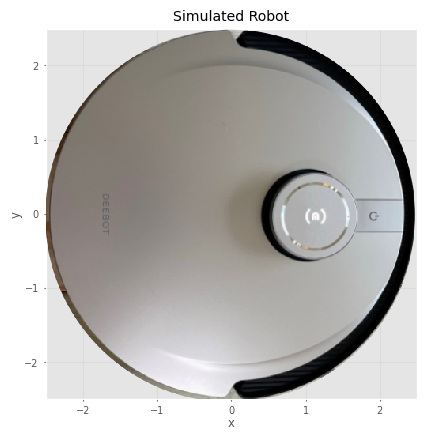

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from DifferentialDriveSimulatedRobot import DifferentialDriveSimulatedRobot

# Initial robot state (6x1) [x, y, theta, vx, vy, omega]
xs0 = np.zeros((6, 1))

# Create robot
robot = DifferentialDriveSimulatedRobot(xs0)

# Simulation parameters
dt = 0.1
steps = 500
robot.dt = dt  # ensure robot uses this dt
robot.visualizationInterval = 10

# --------------- Circular trajectory ---------------
print("Simulating circular trajectory...")
u_circular = 0.5    # forward speed (m/s)
r_circular = 0.2    # angular speed (rad/s) -> controls radius

xsk_1 = xs0.copy()
robot.xTraj, robot.yTraj = [], []

for k in range(steps):
    usk = np.array([u_circular, r_circular])  # [forward, angular]
    xsk = robot.fs(xsk_1, usk)
    xsk_1 = xsk
'''
plt.figure()
plt.title("Circular trajectory")
plt.plot(robot.xTraj, robot.yTraj, 'orange', label='Robot path')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
'''



Simulating figure-eight trajectory...


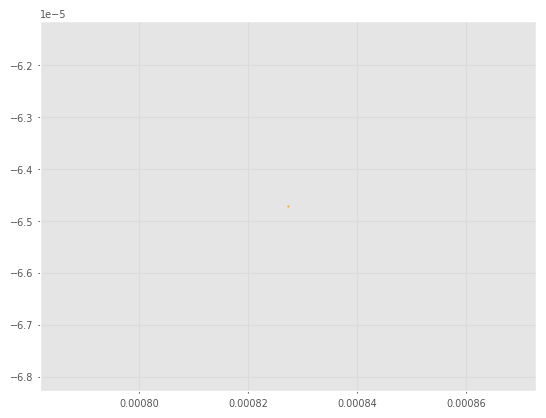

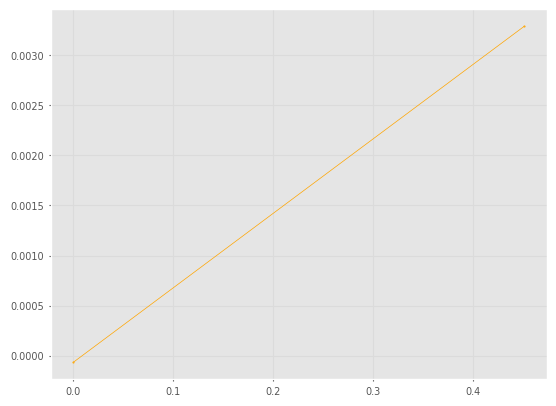

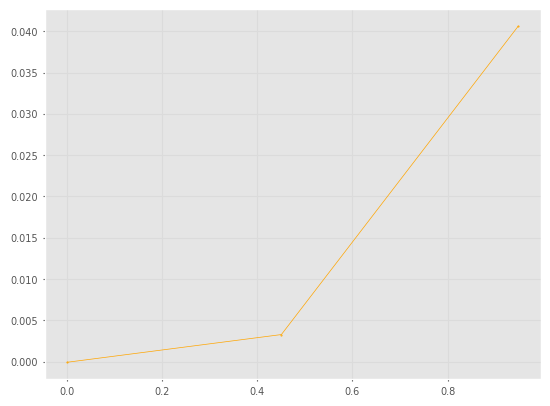

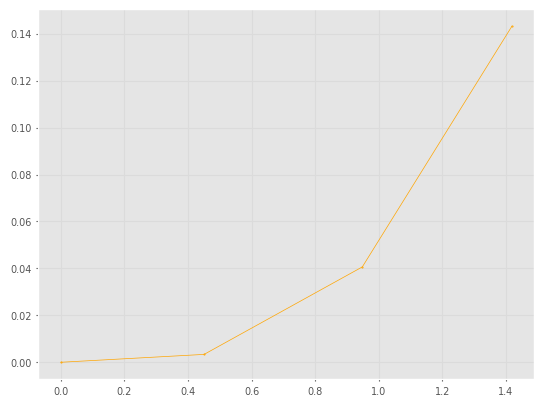

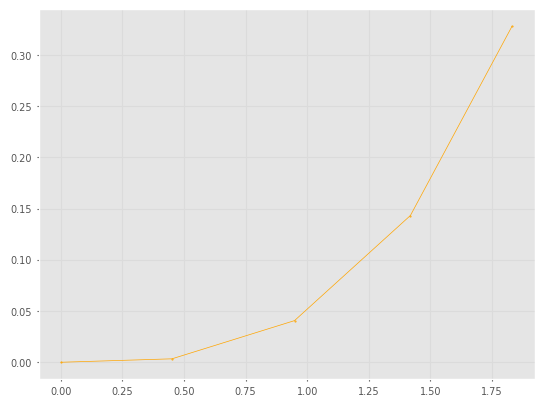

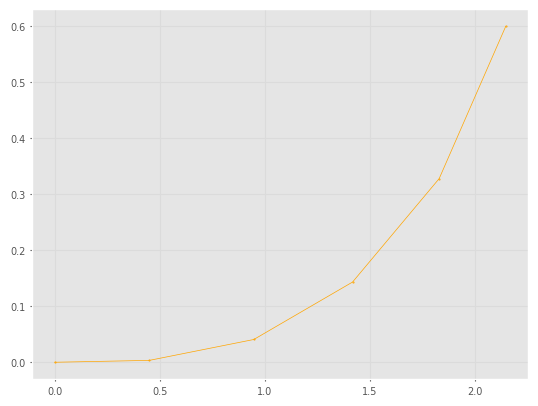

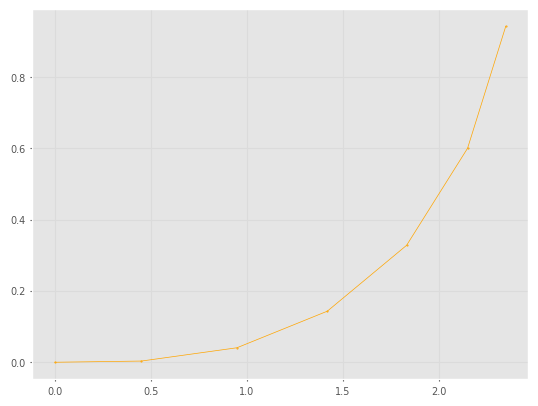

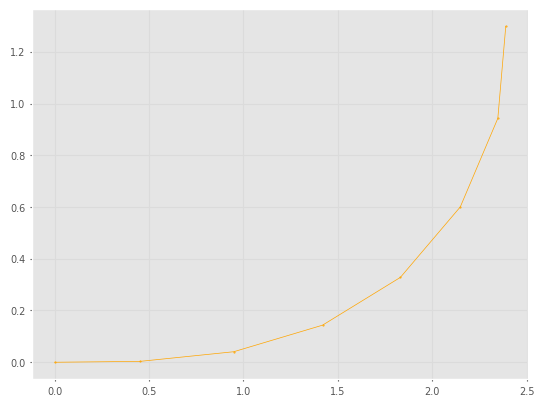

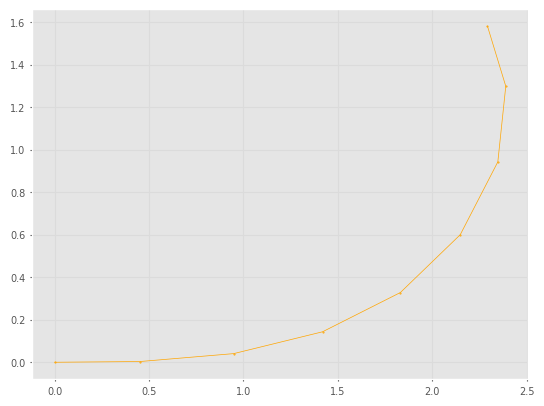

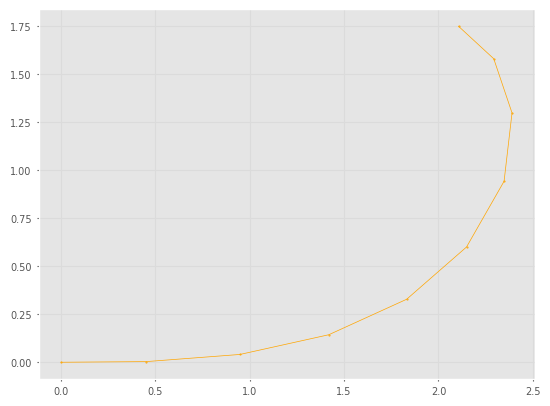

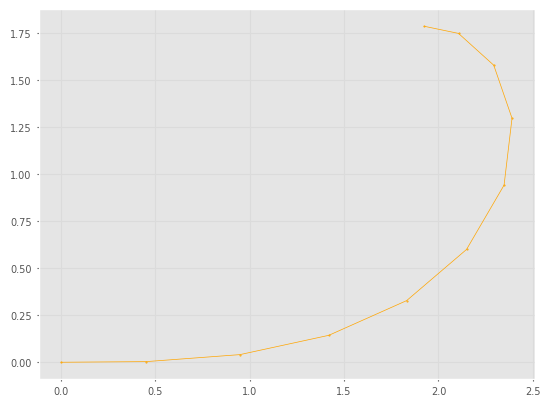

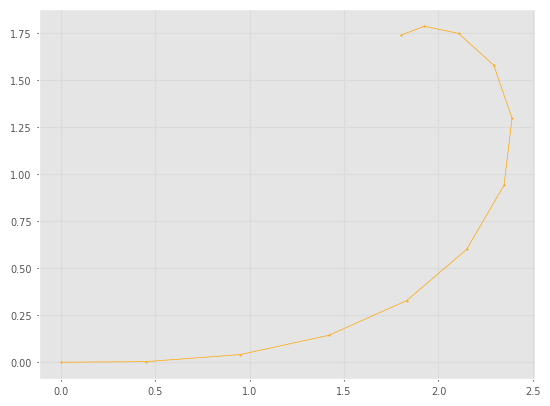

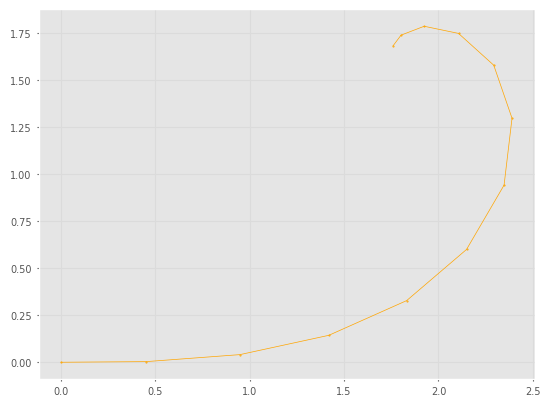

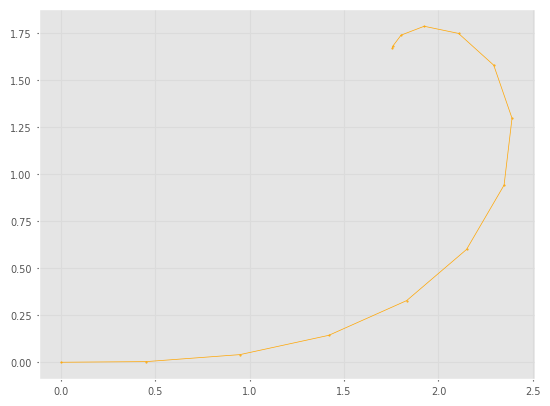

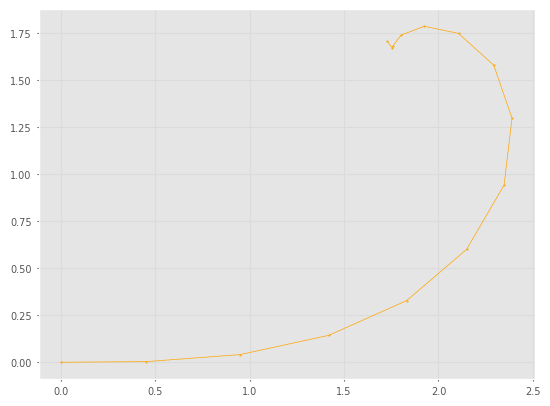

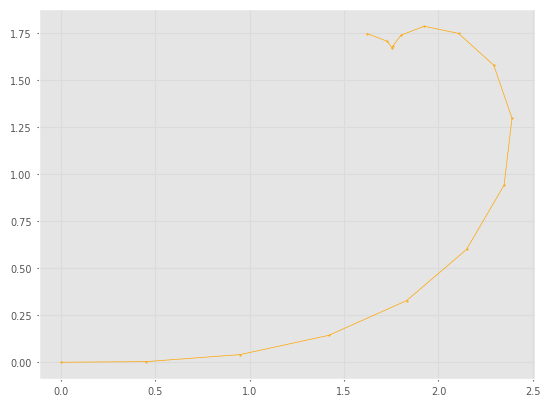

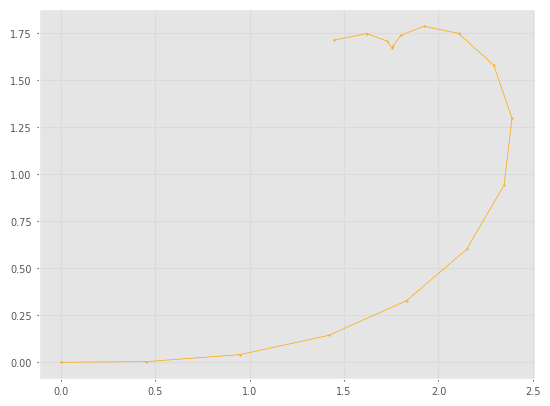

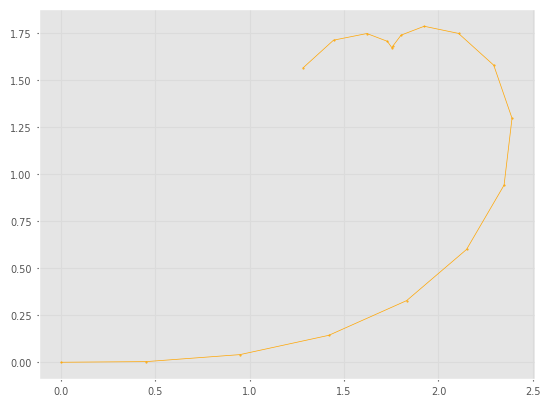

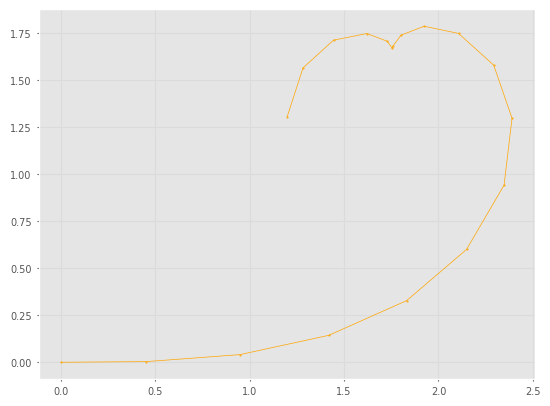

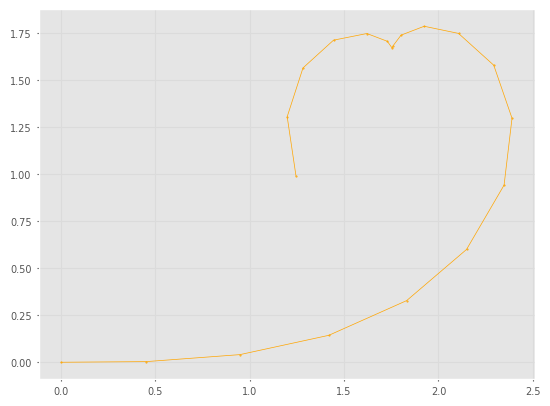

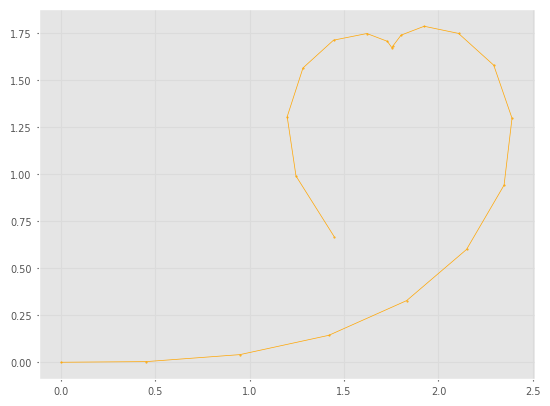

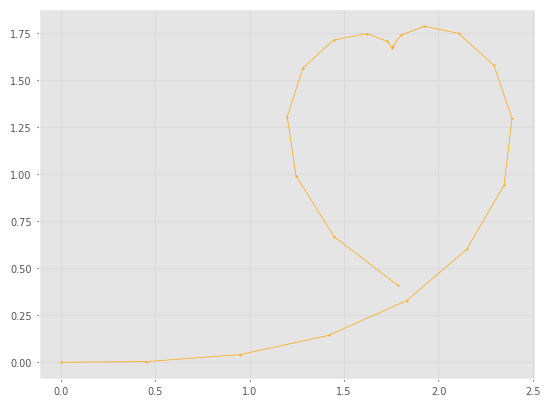

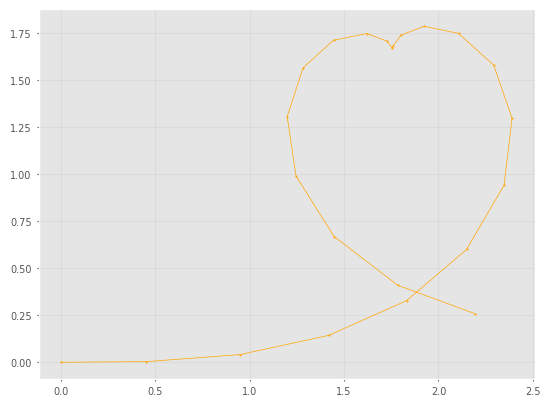

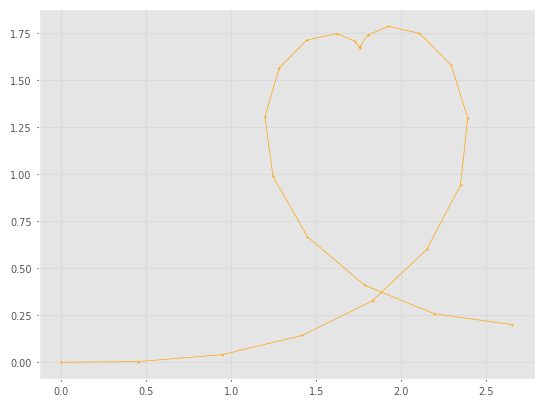

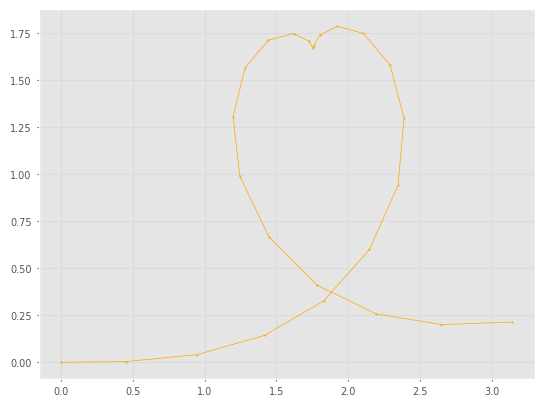

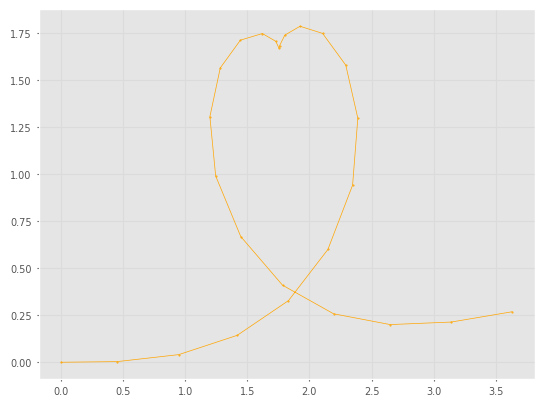

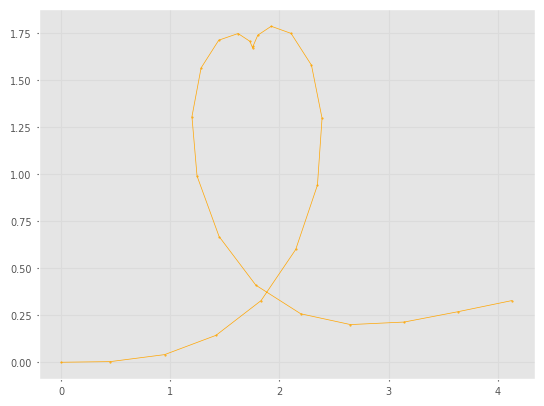

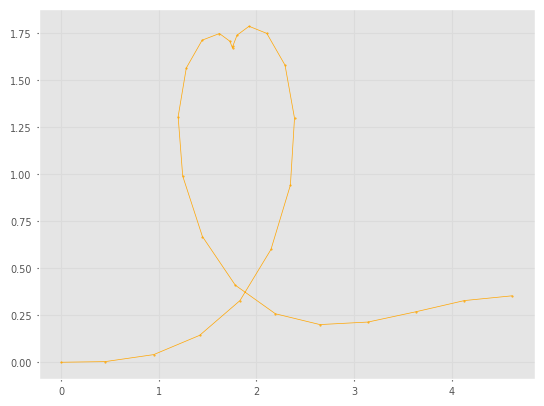

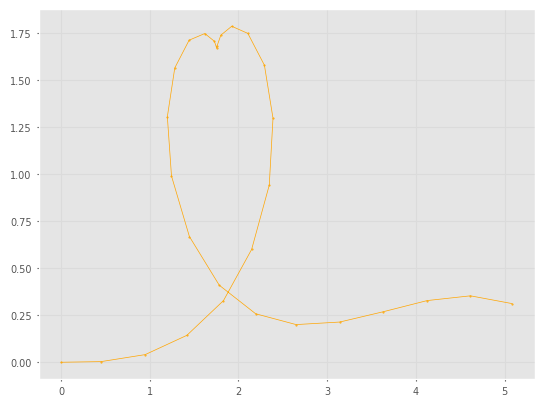

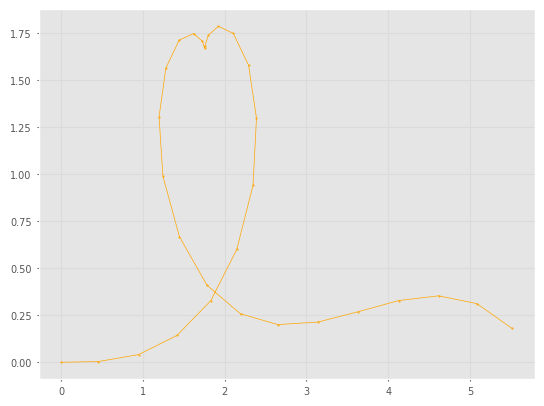

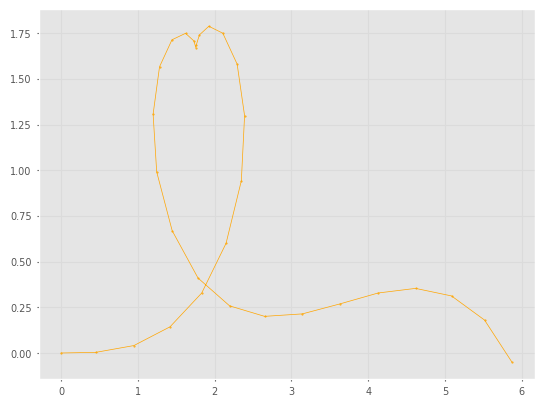

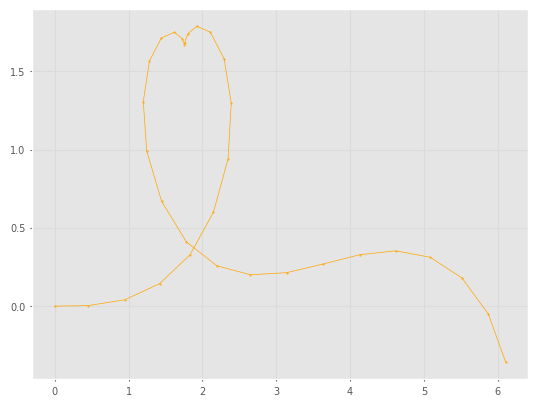

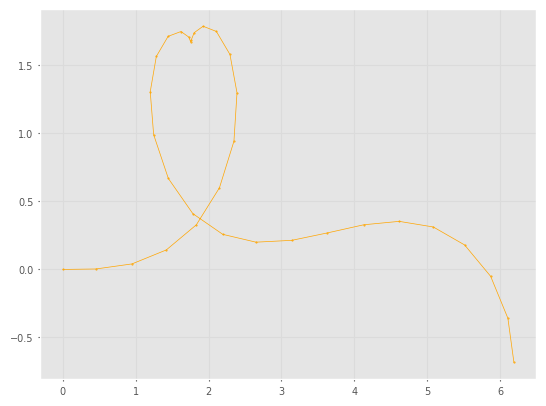

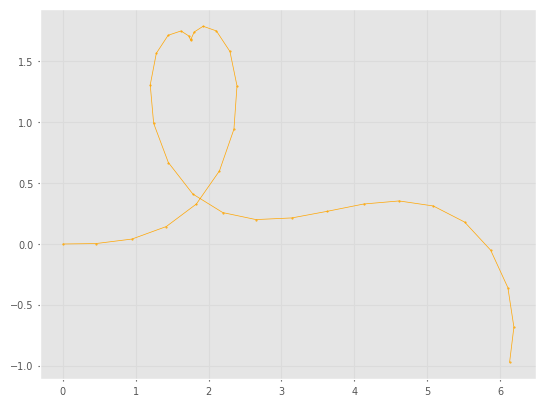

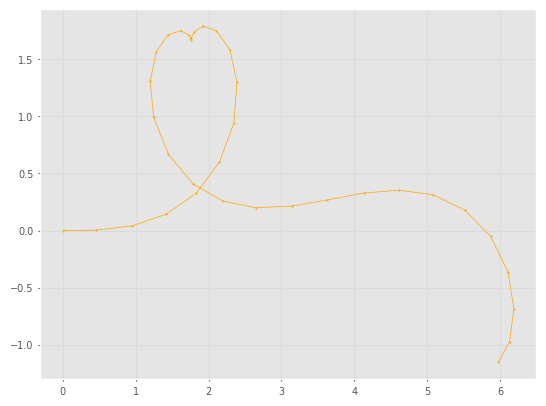

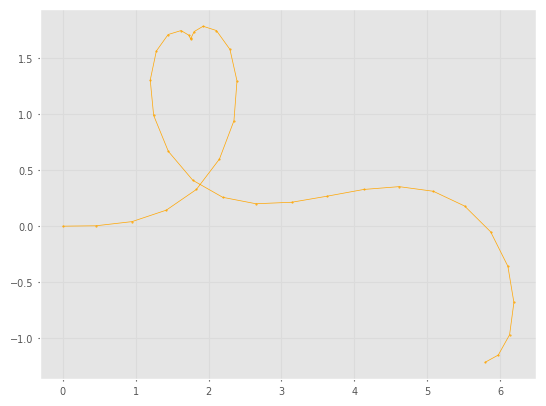

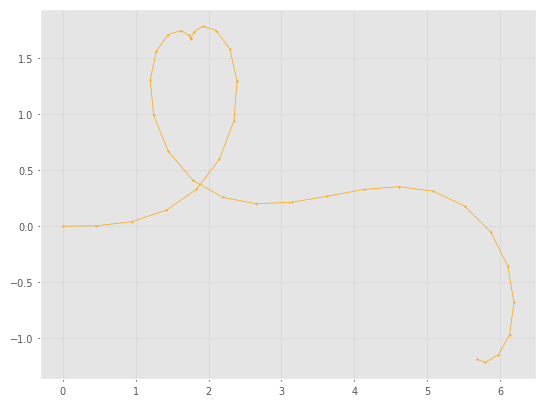

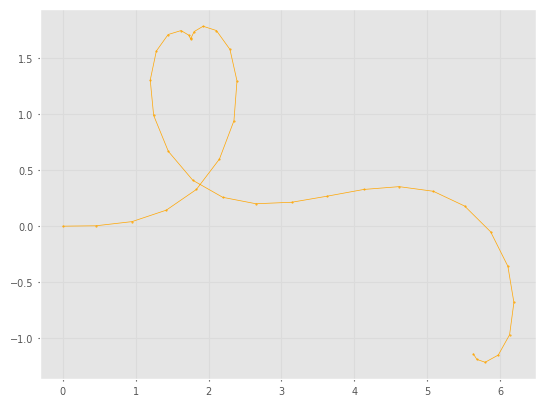

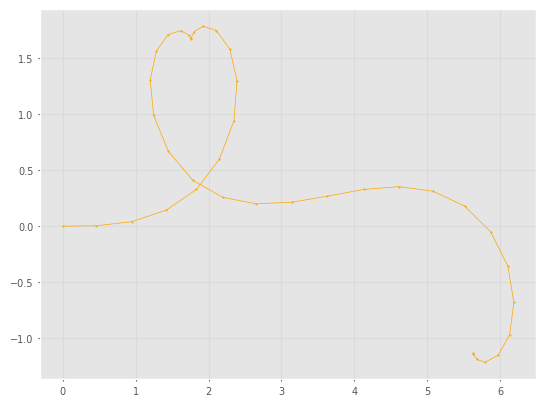

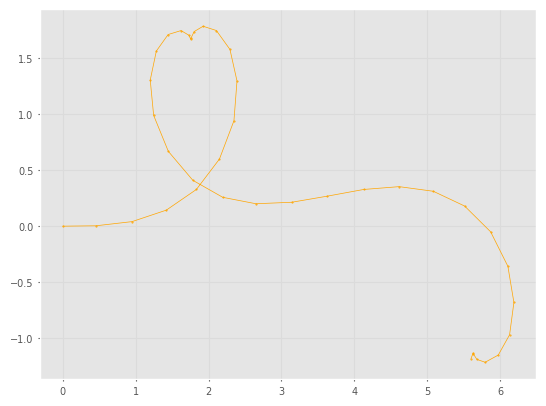

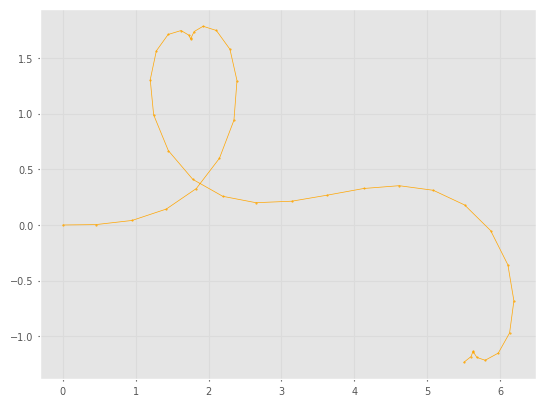

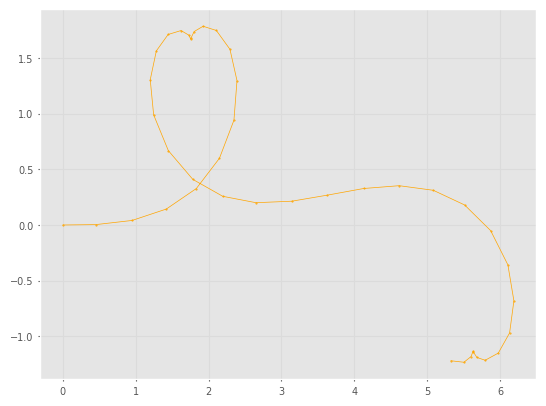

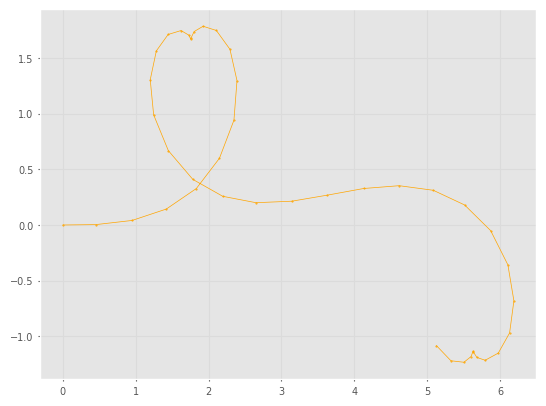

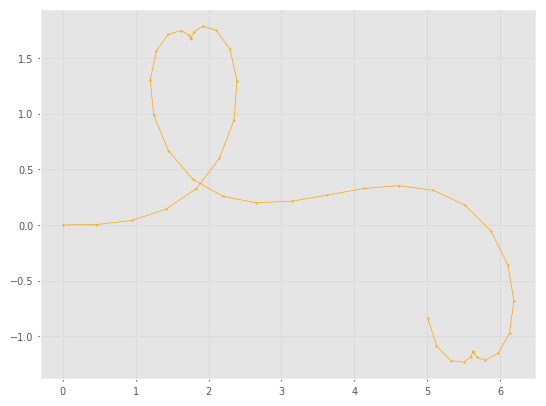

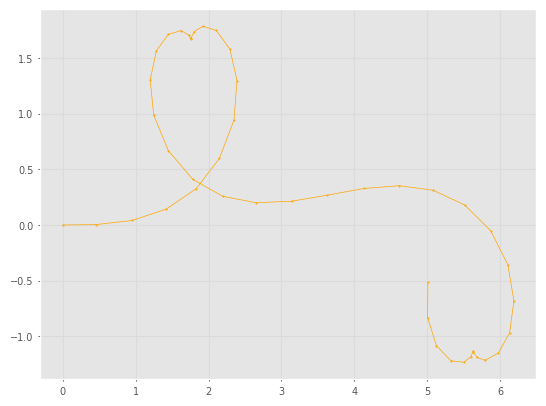

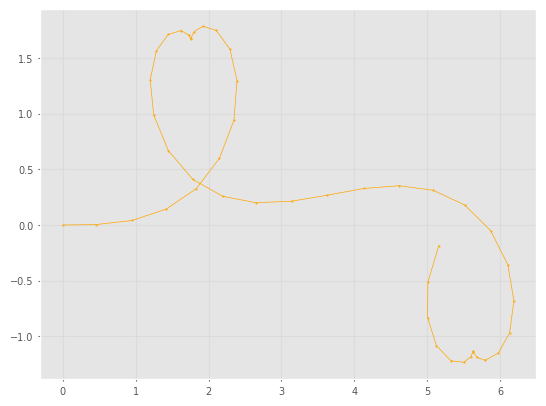

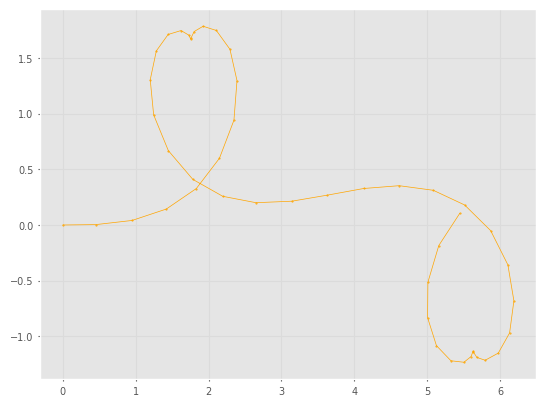

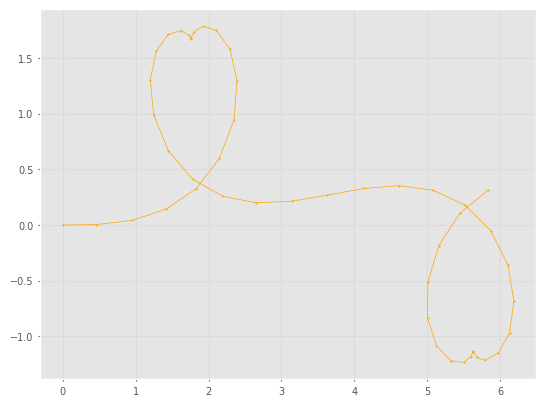

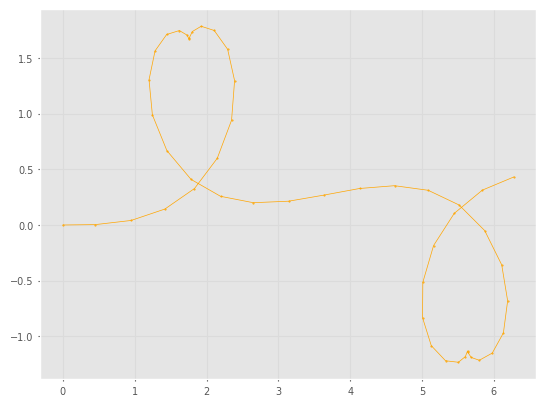

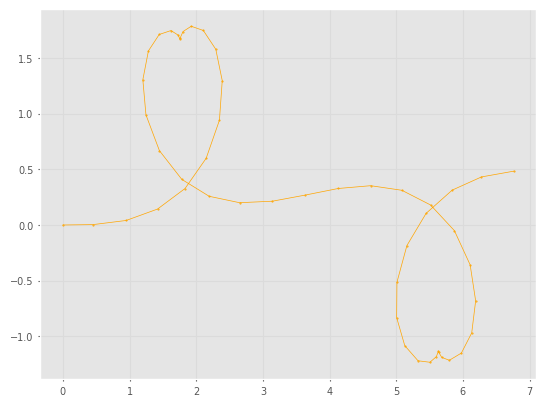

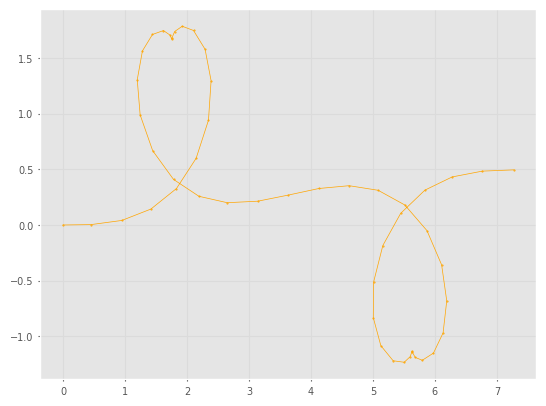

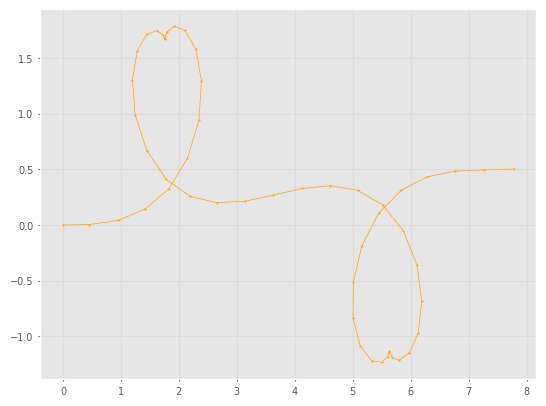

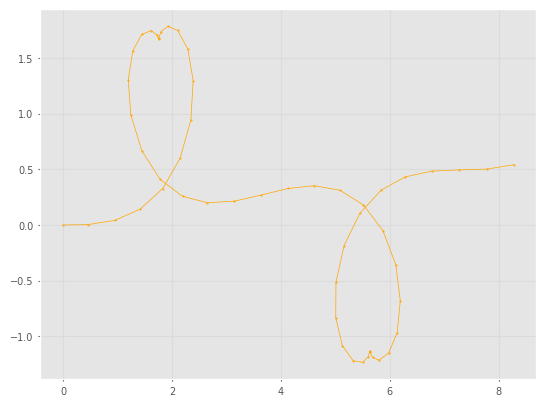

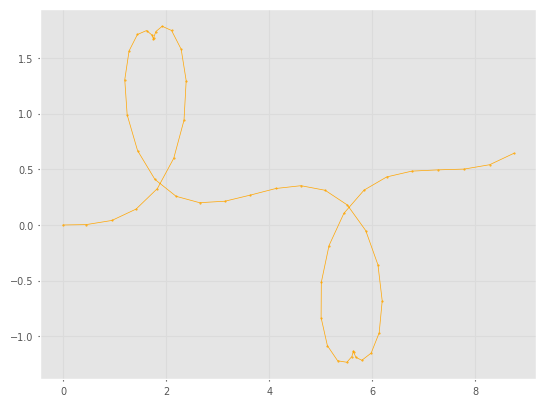

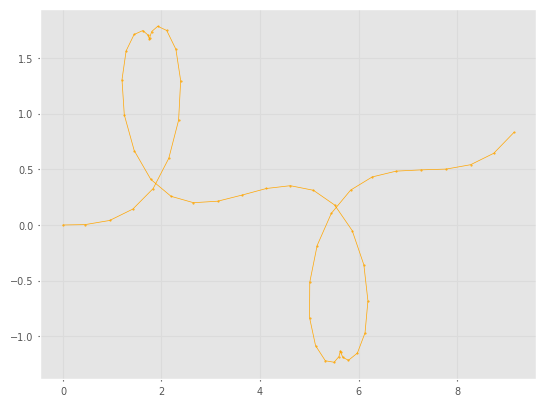

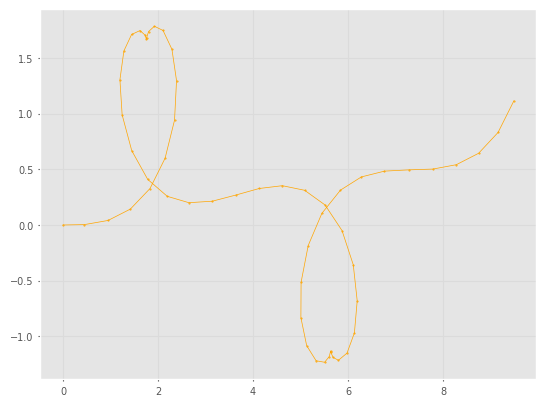

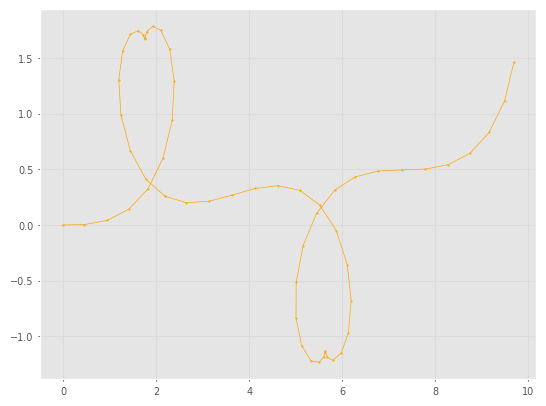

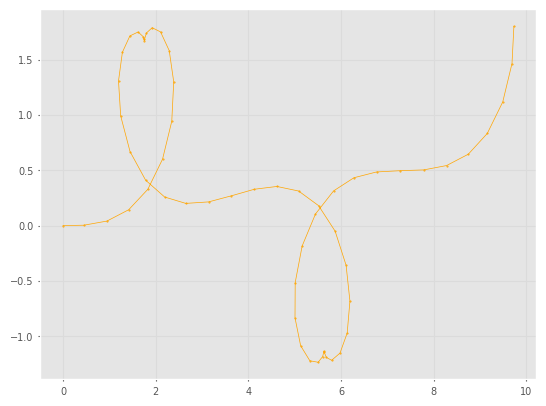

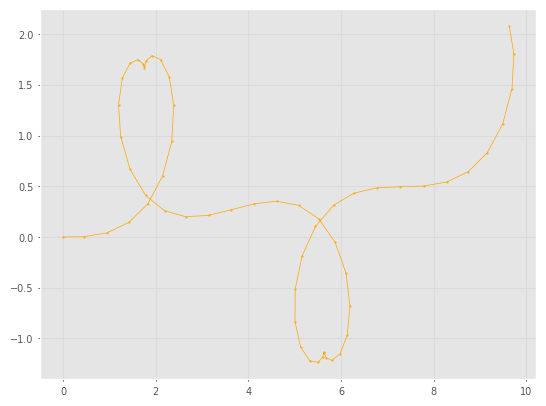

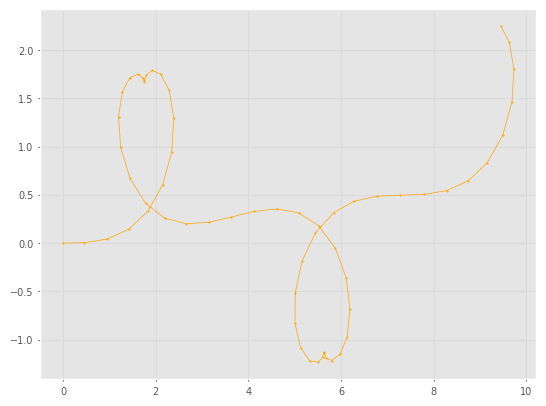

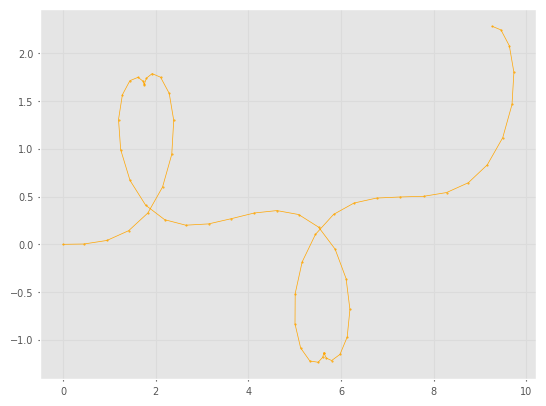

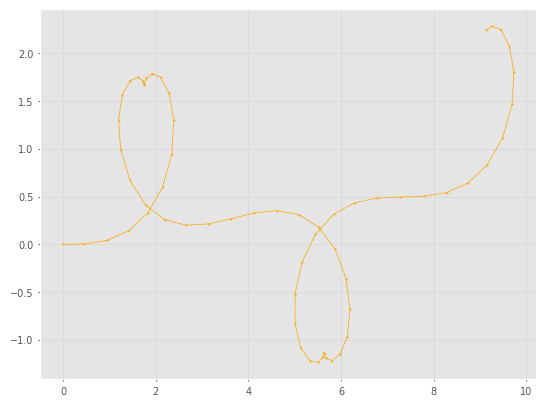

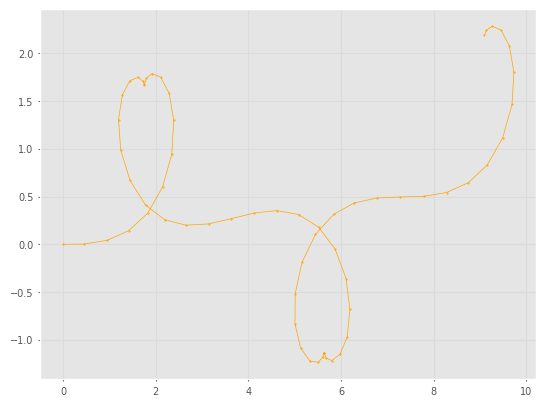

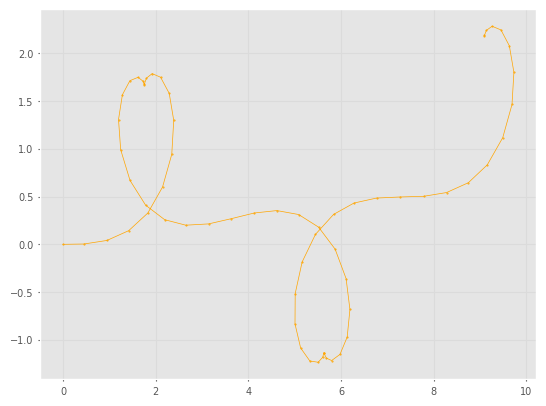

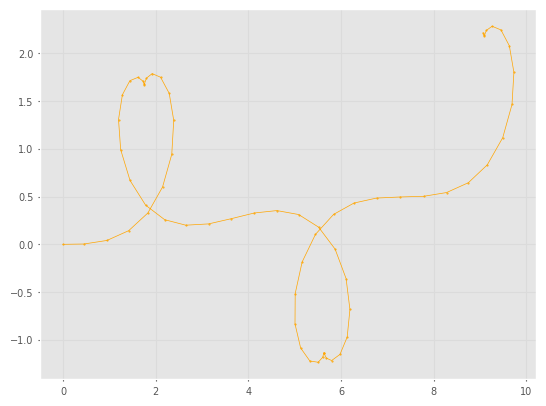

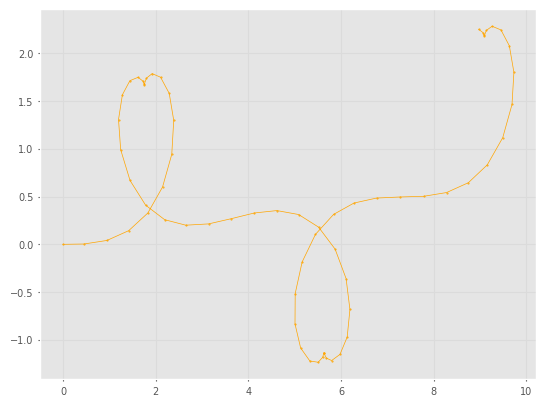

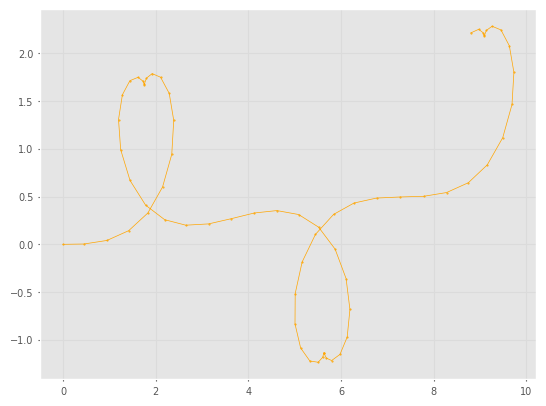

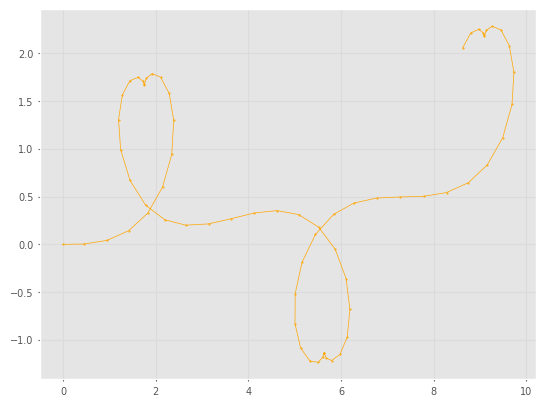

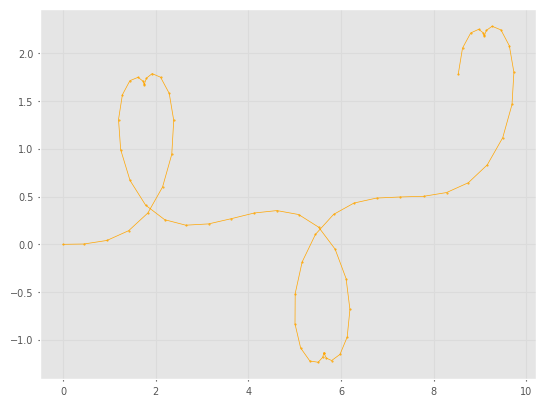

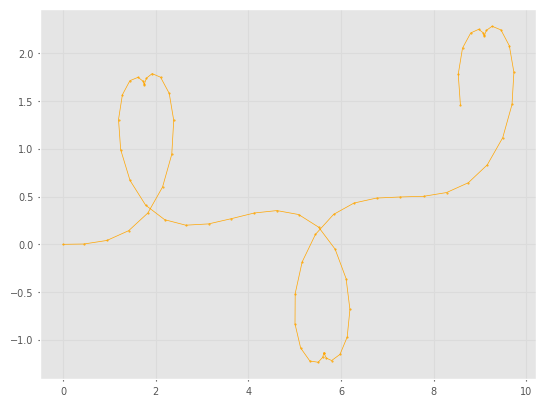

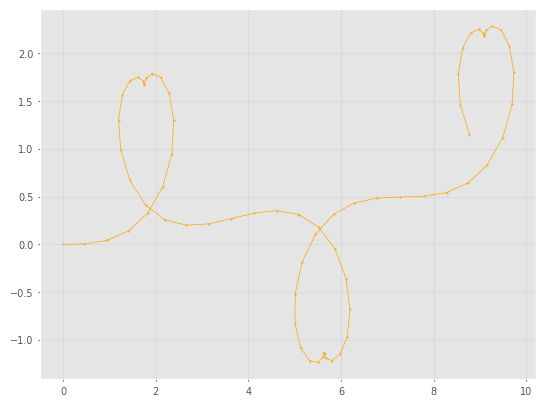

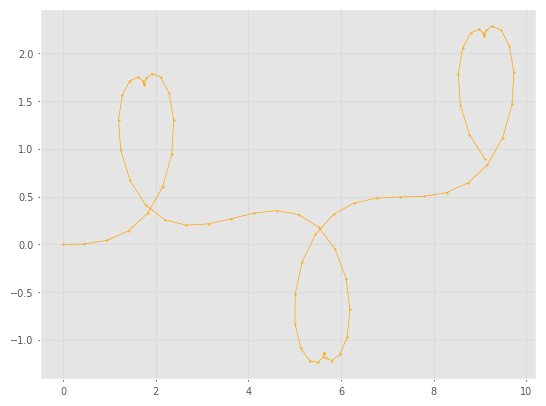

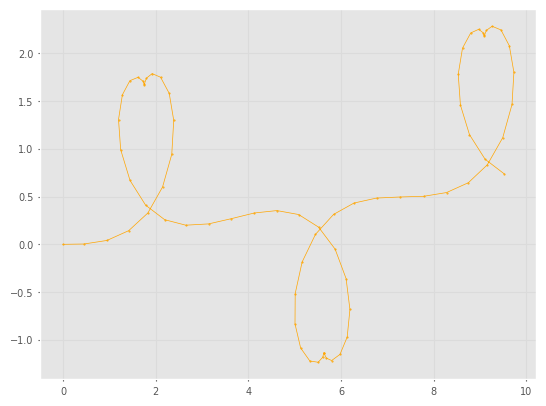

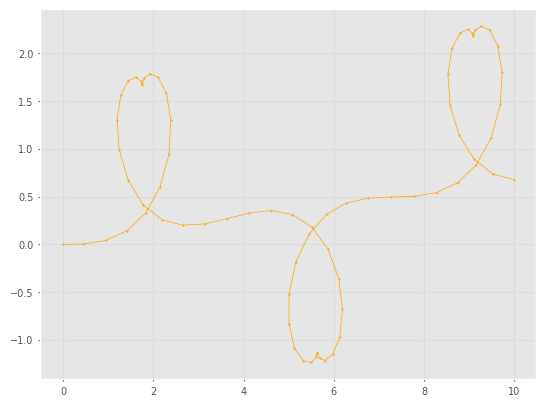

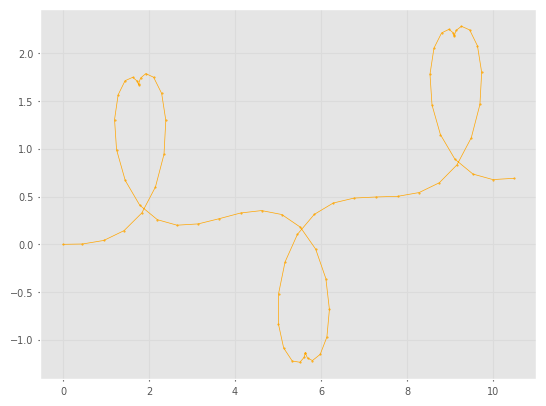

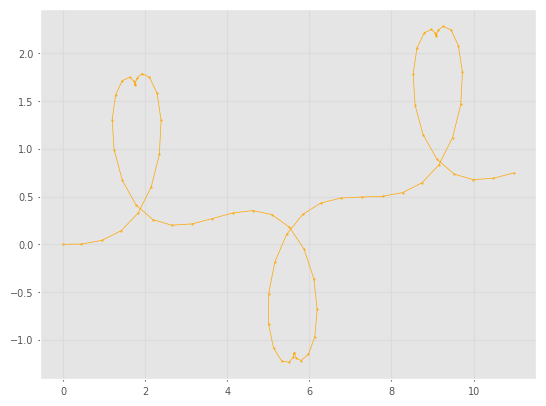

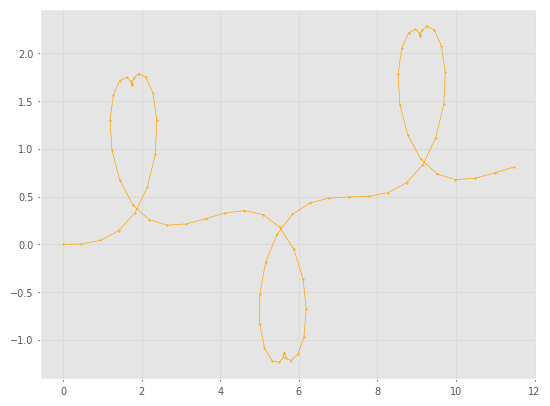

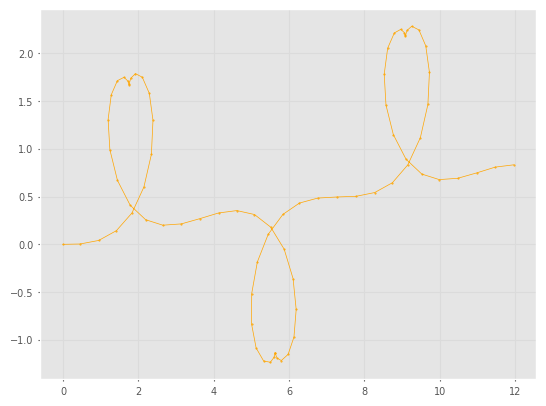

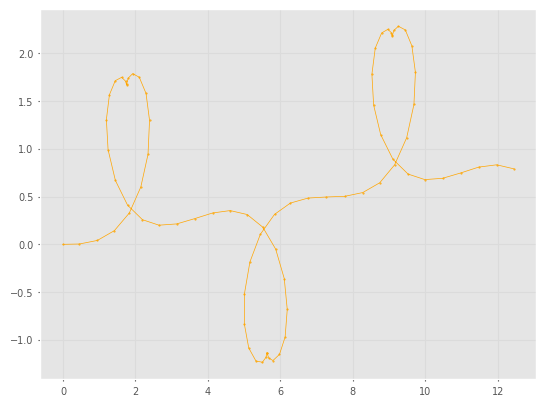

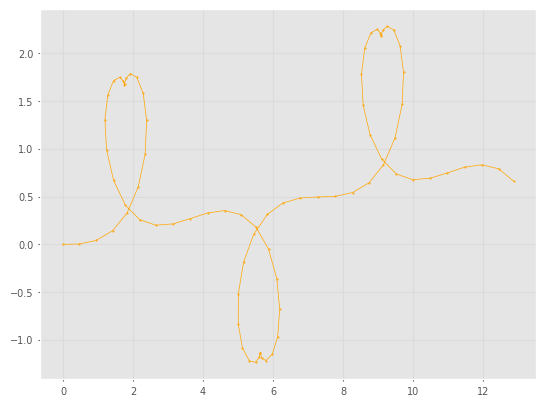

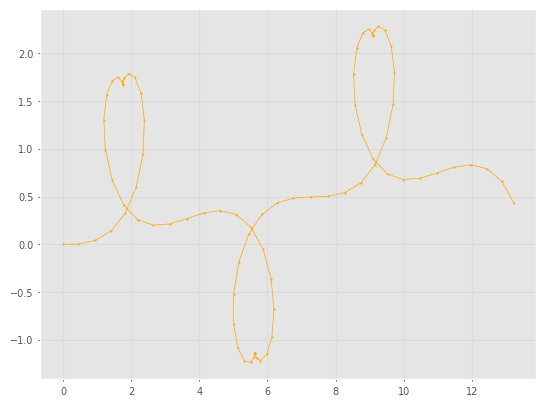

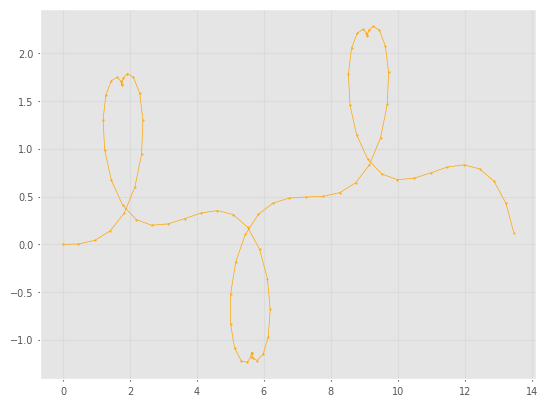

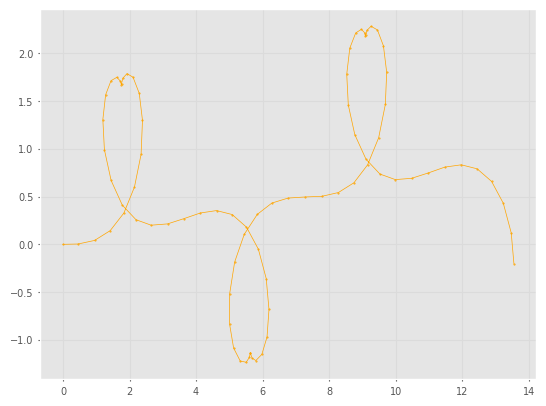

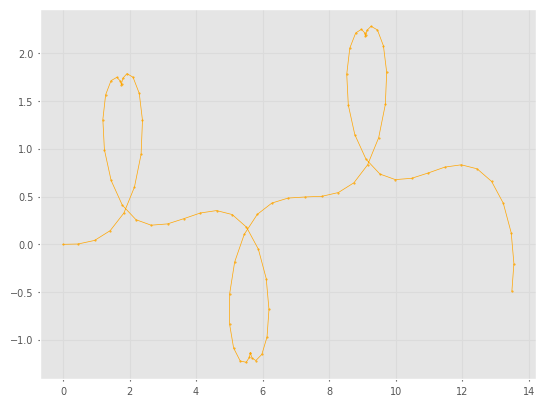

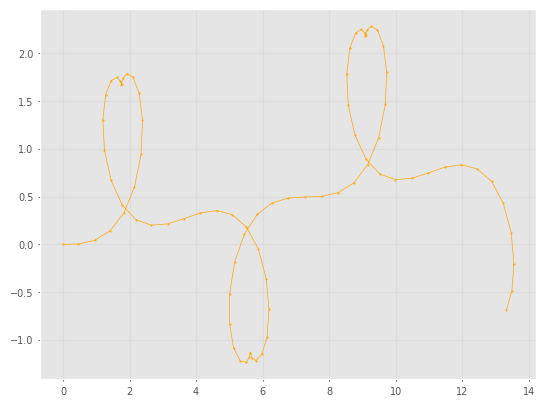

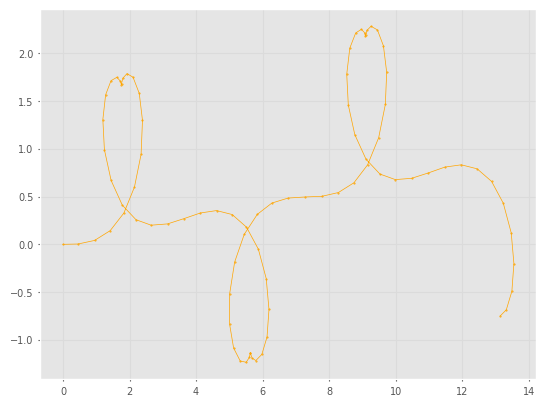

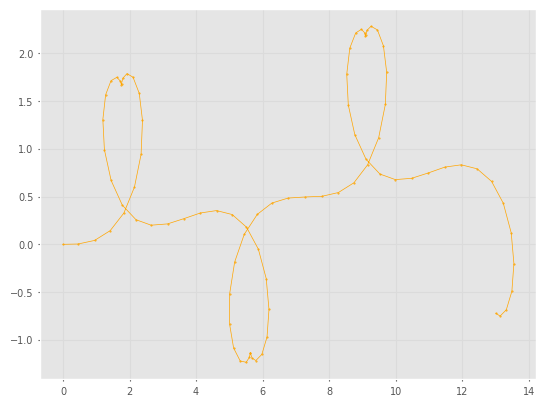

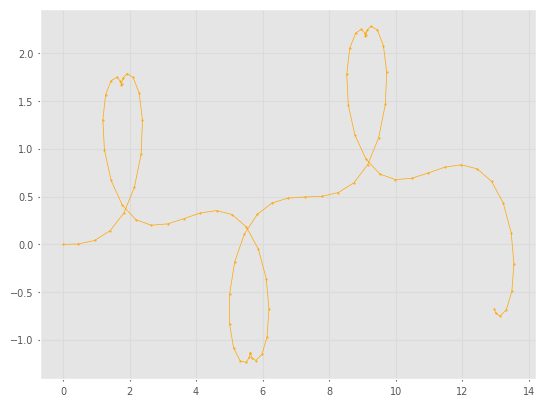

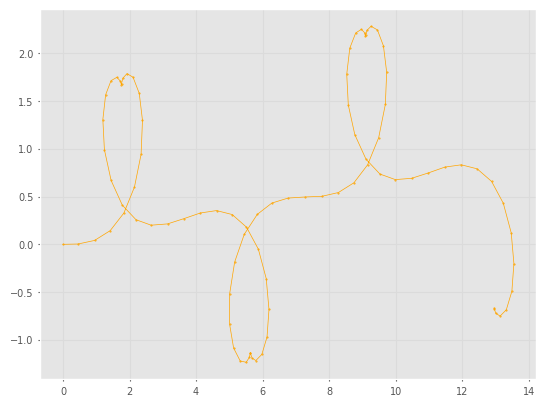

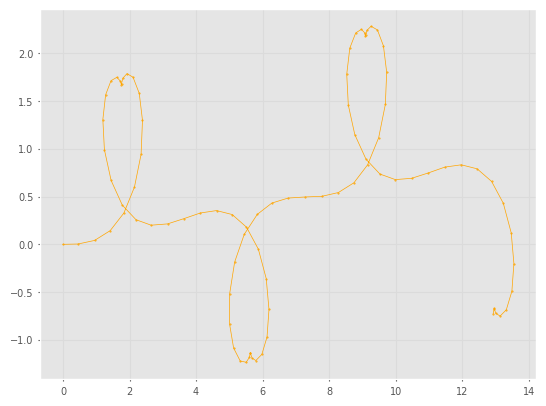

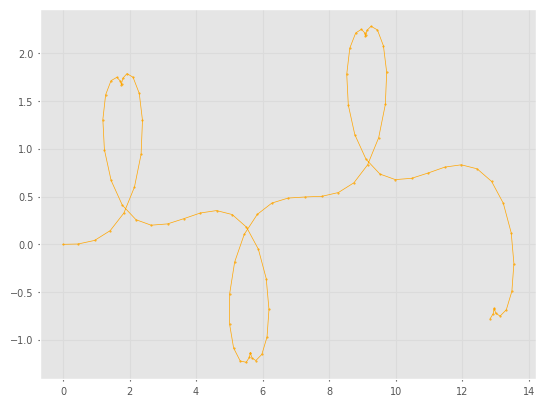

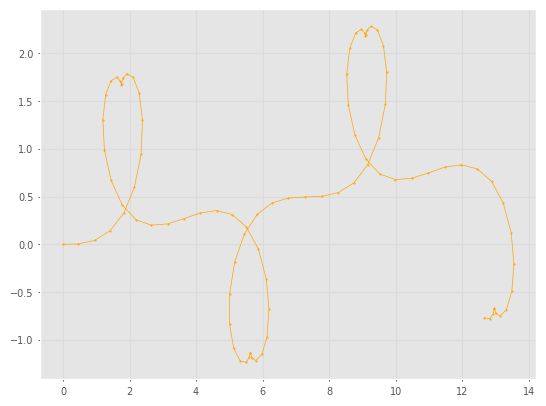

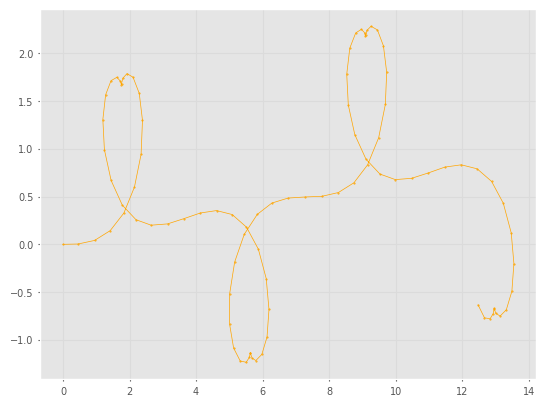

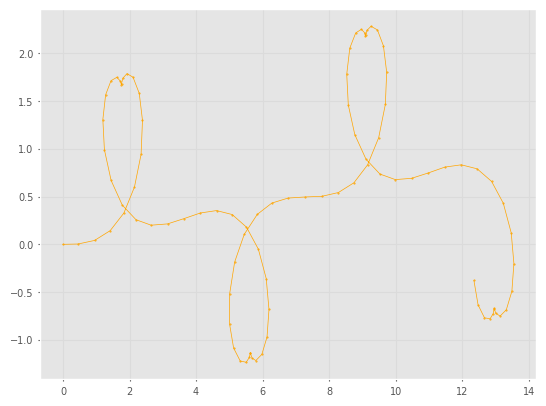

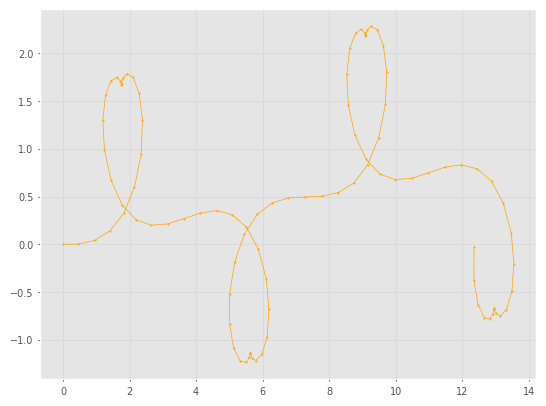

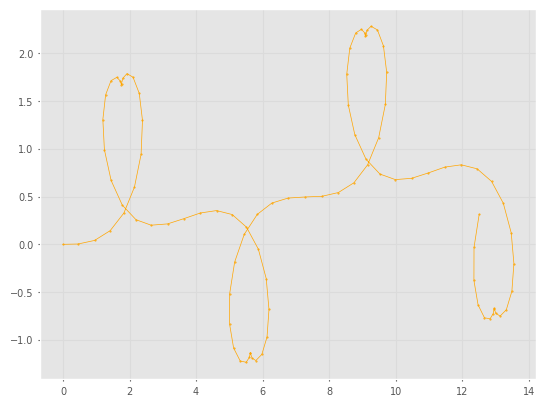

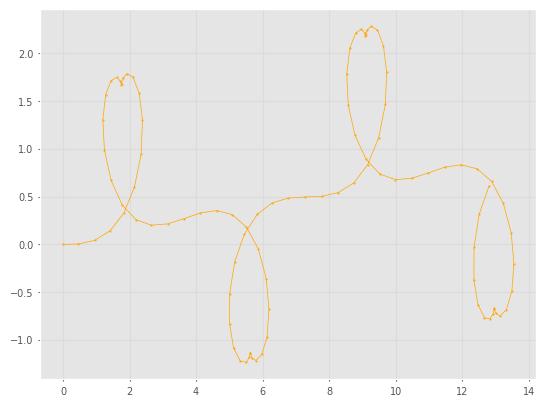

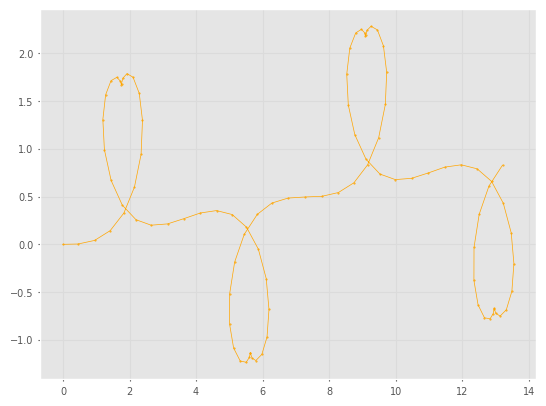

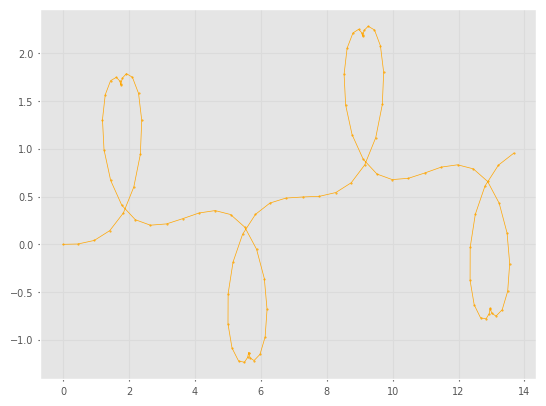

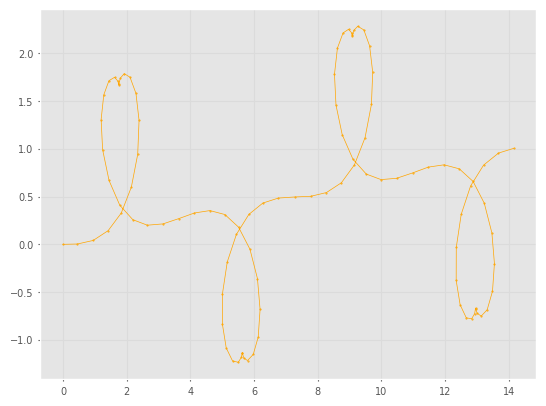

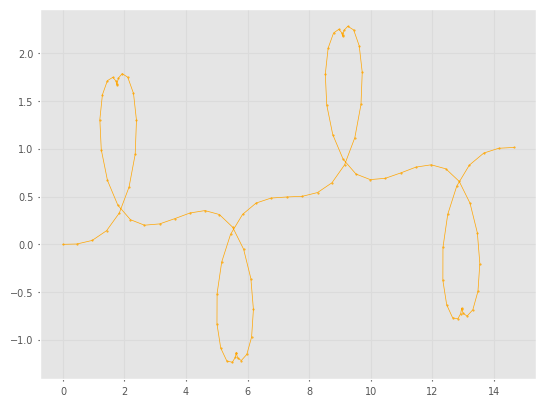

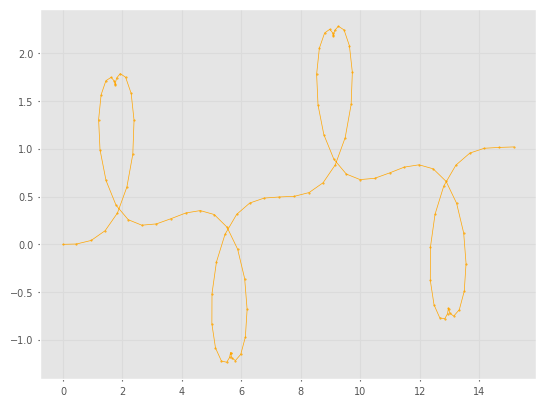

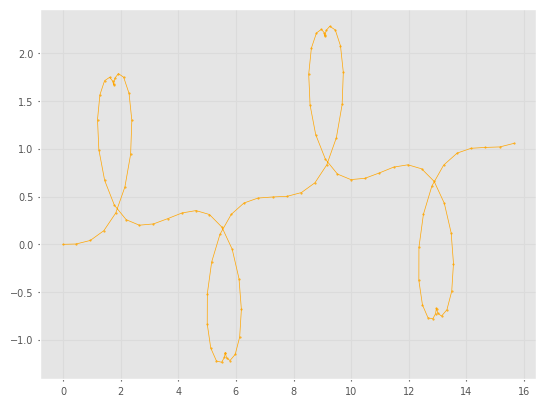

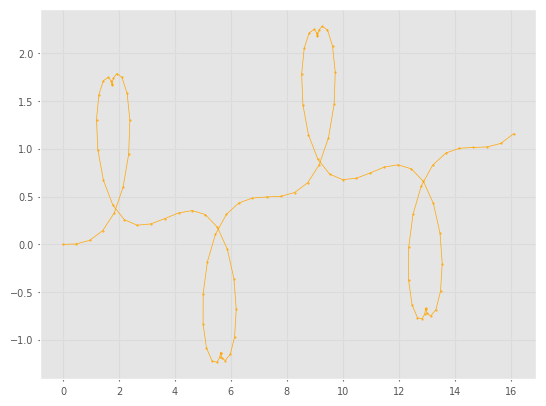

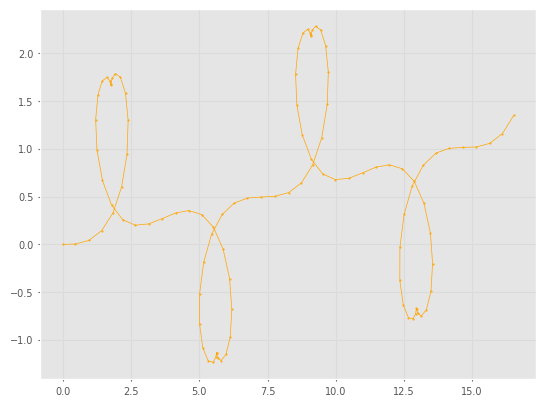

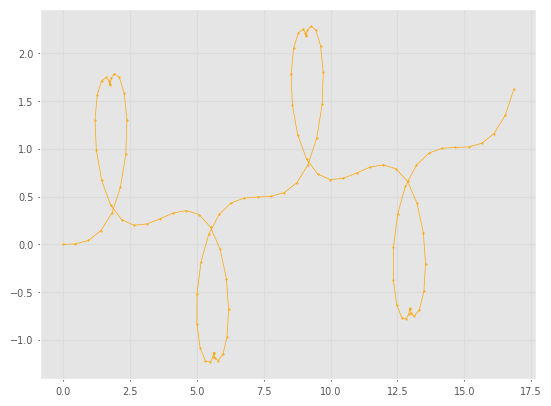

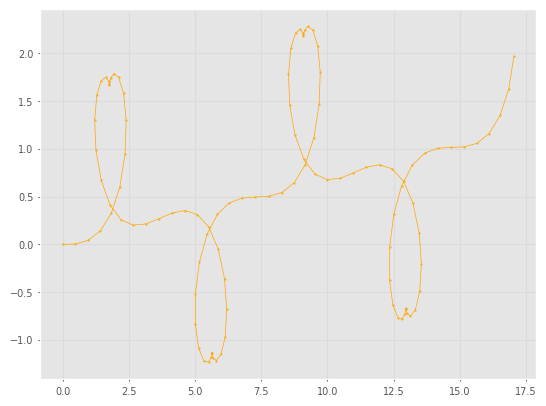

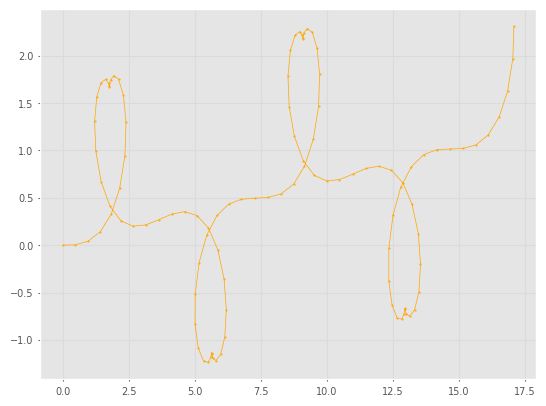

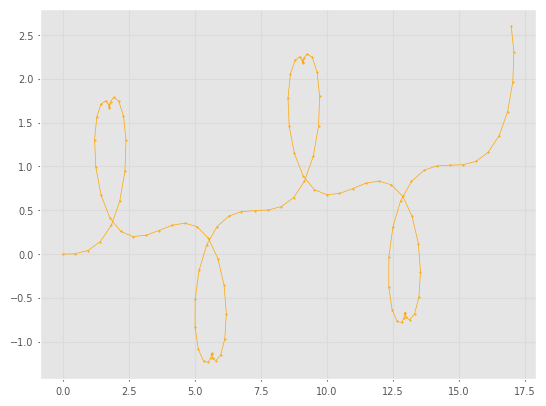

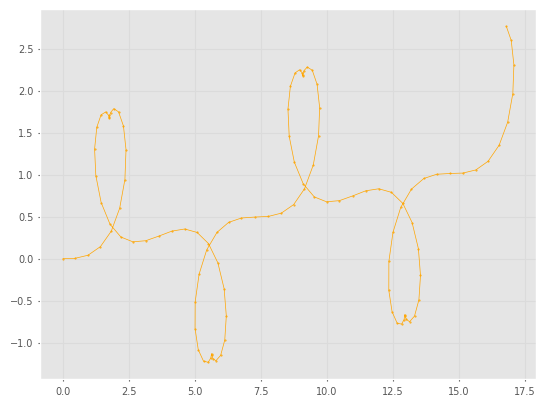

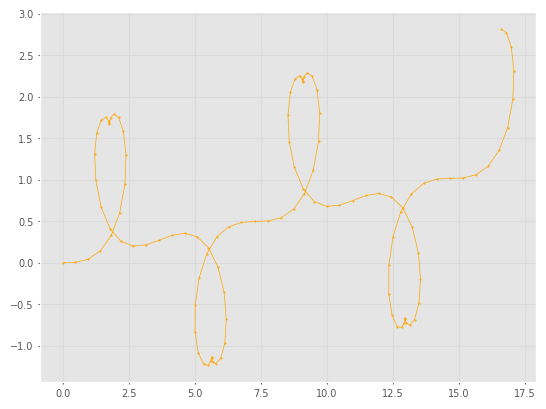

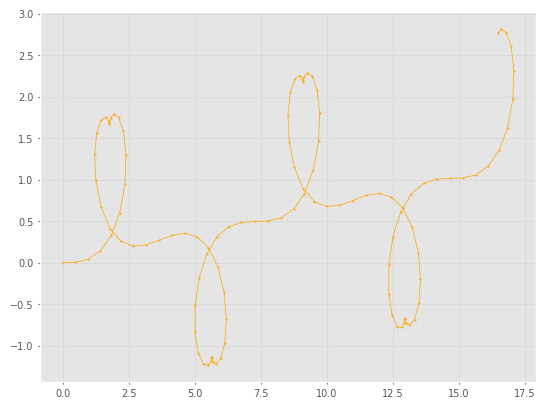

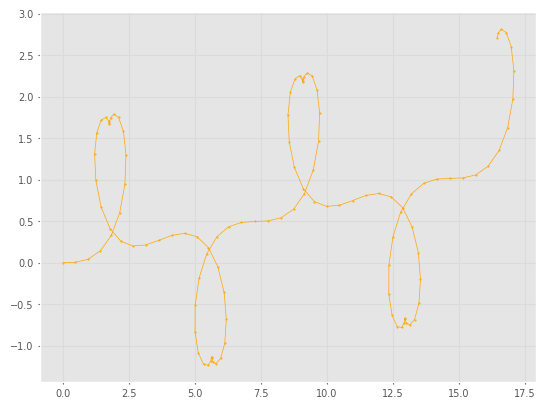

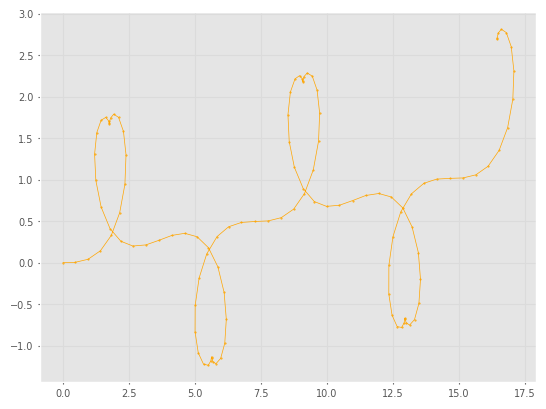

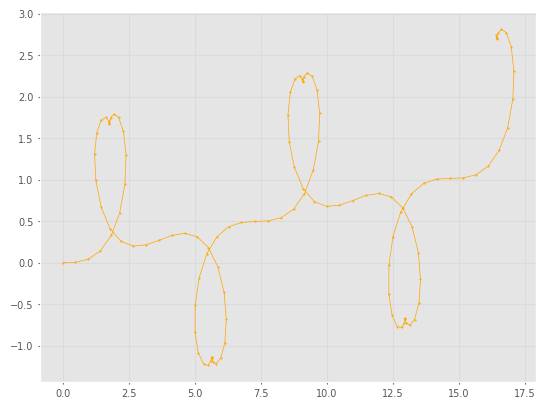

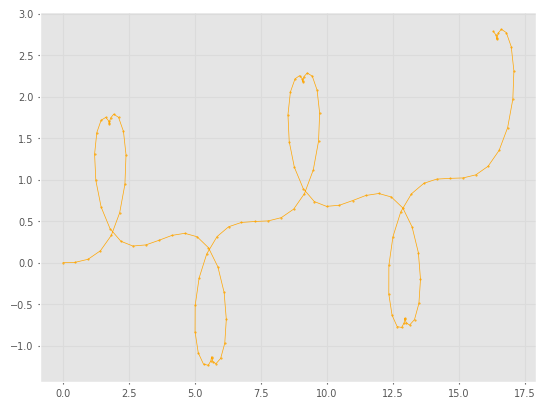

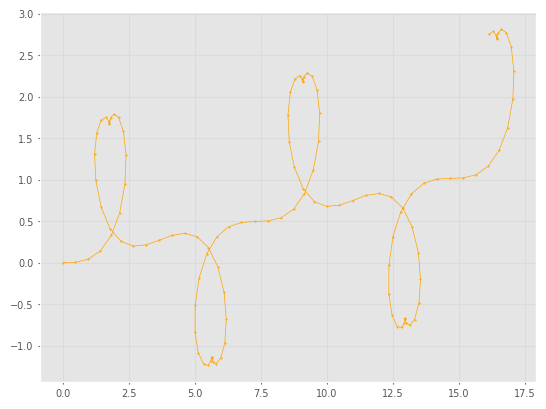

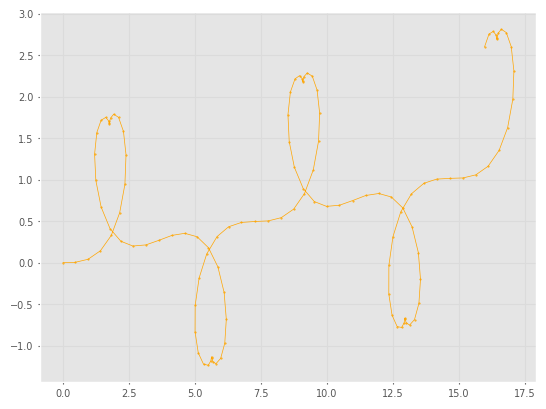

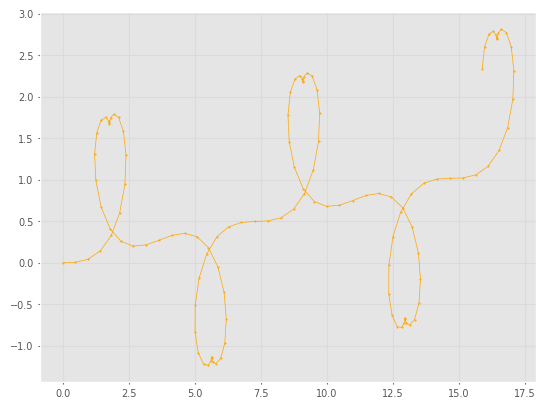

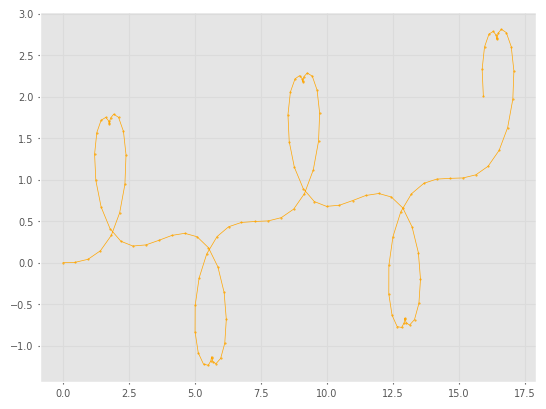

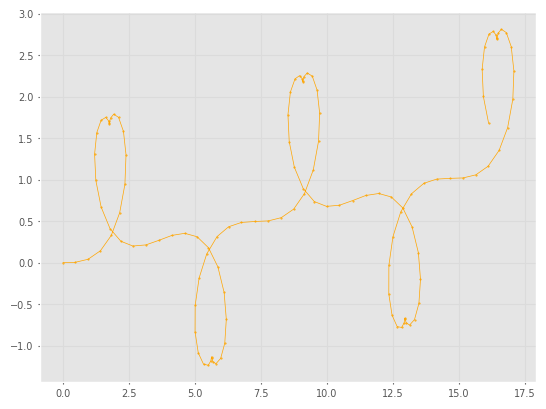

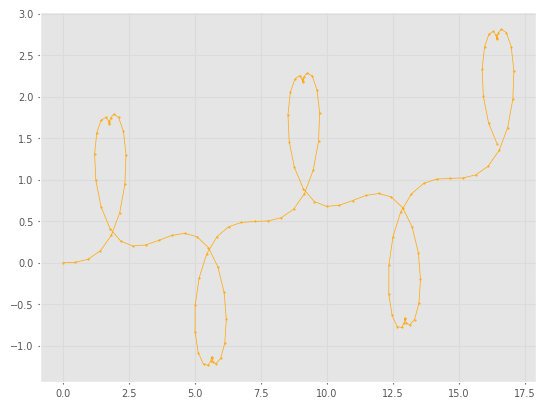

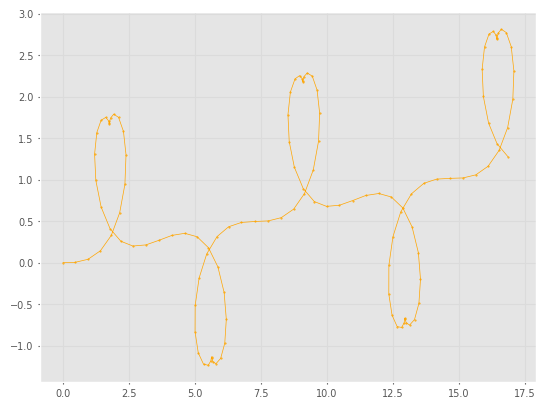

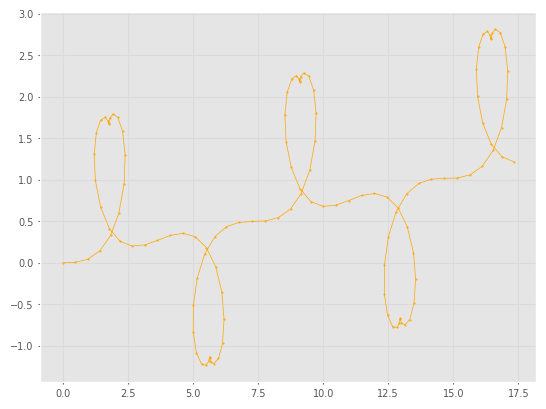

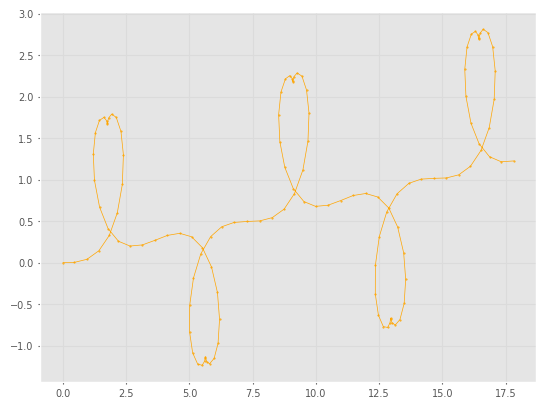

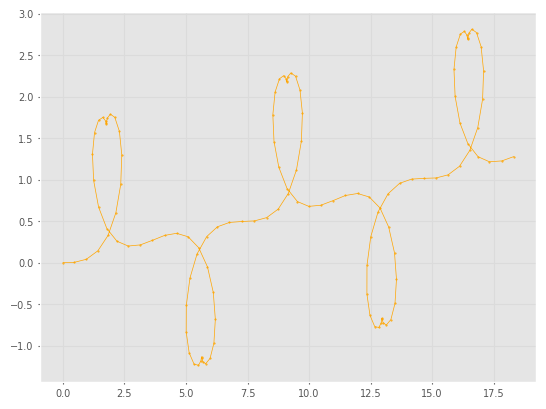

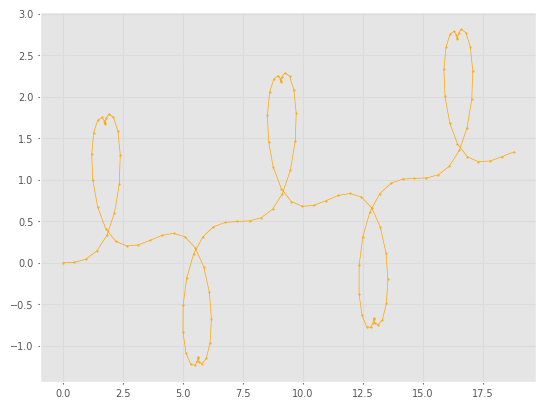

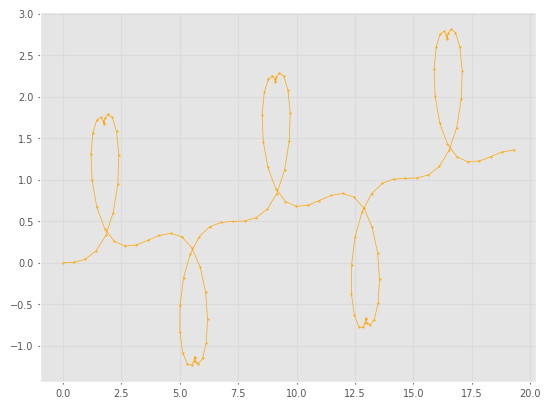

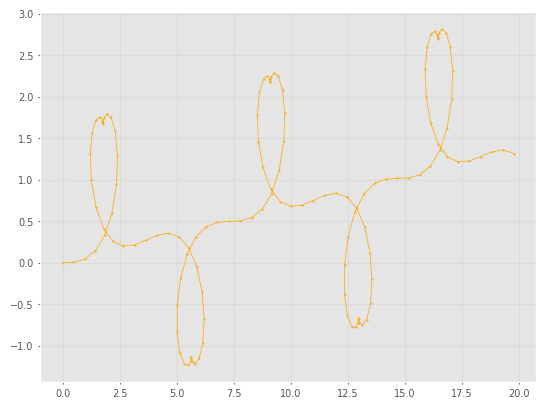

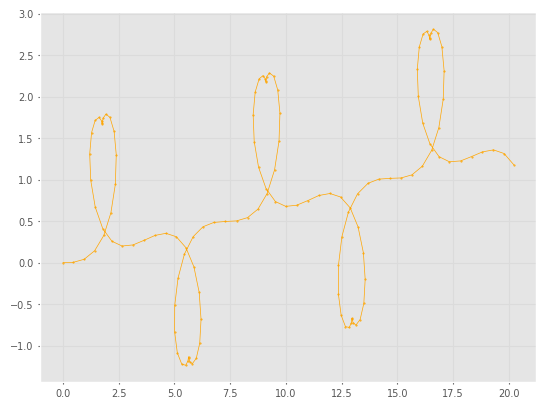

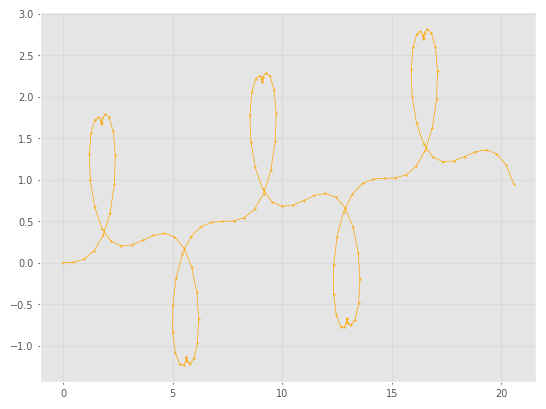

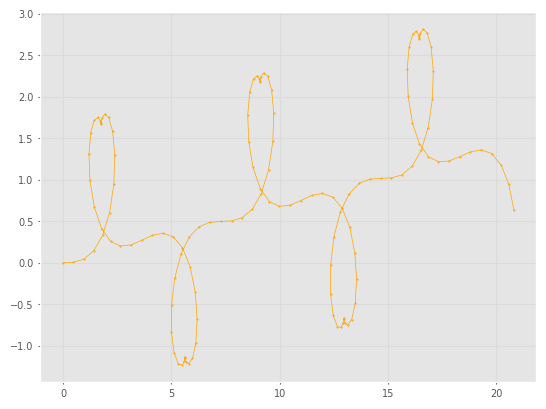

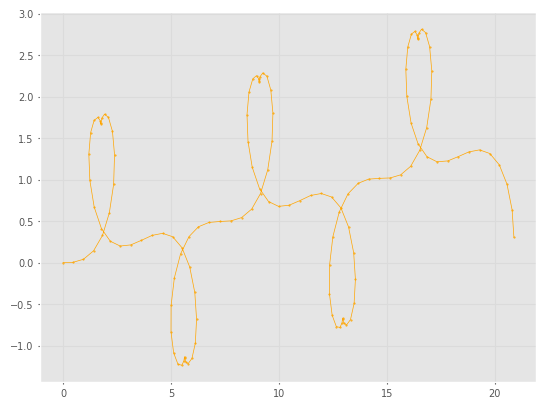

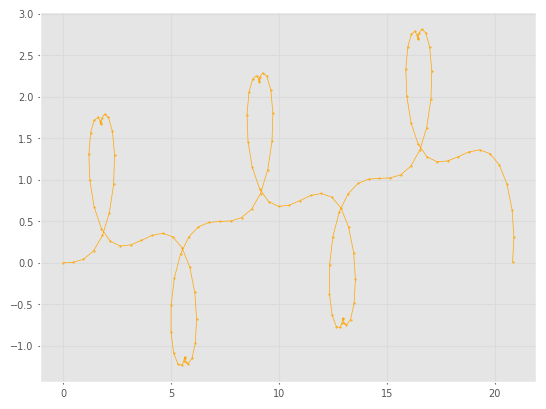

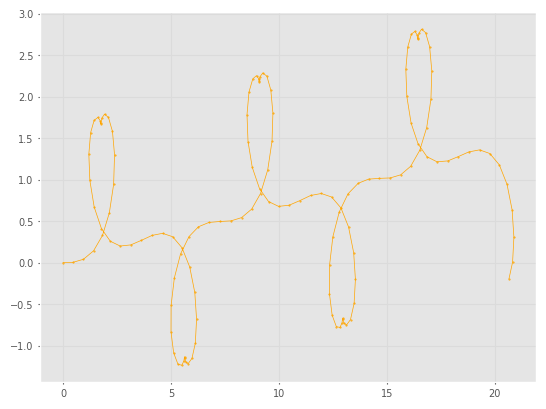

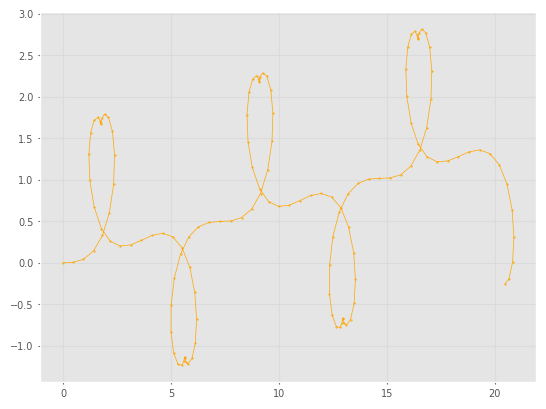

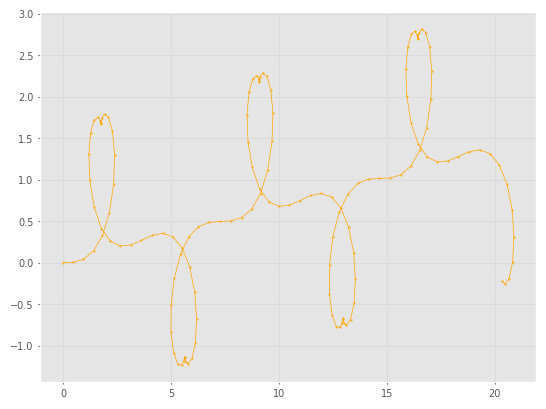

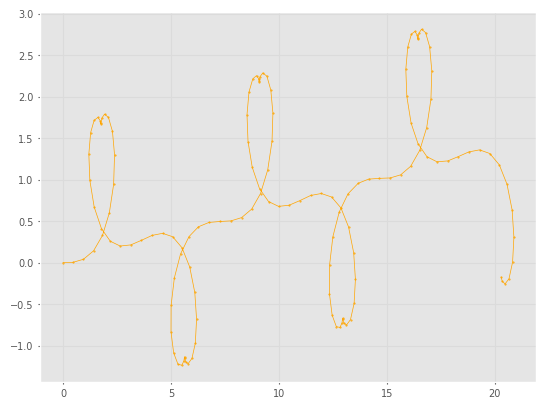

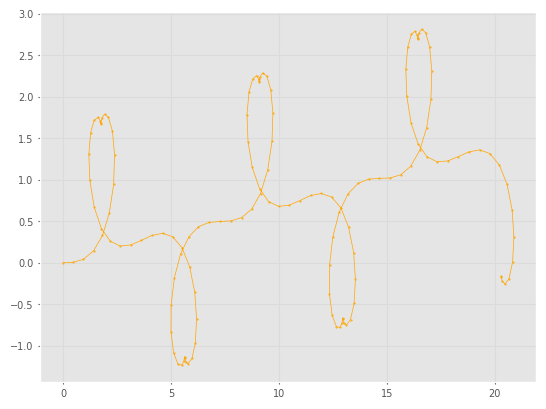

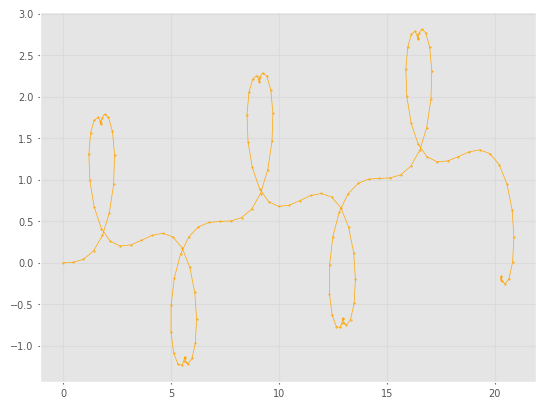

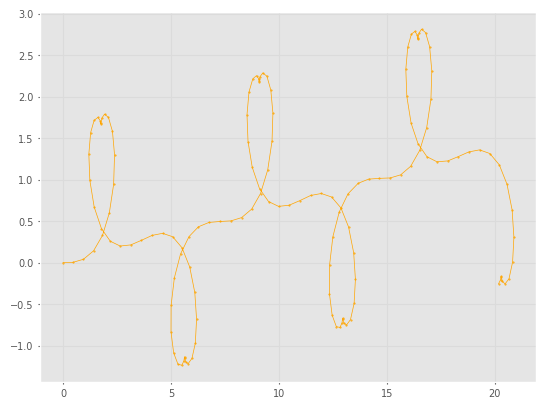

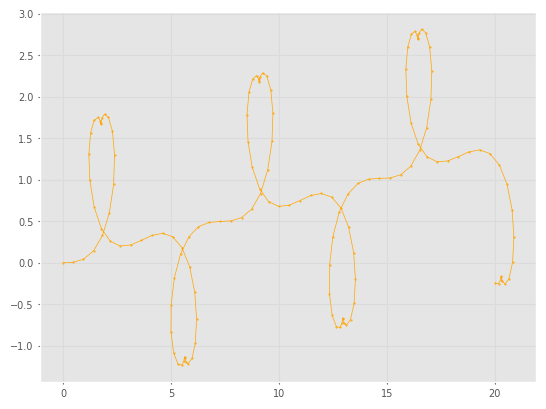

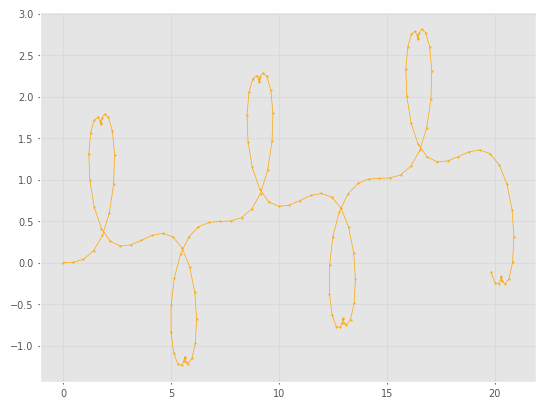

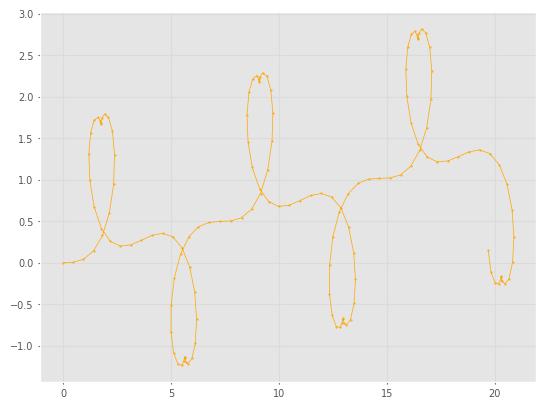

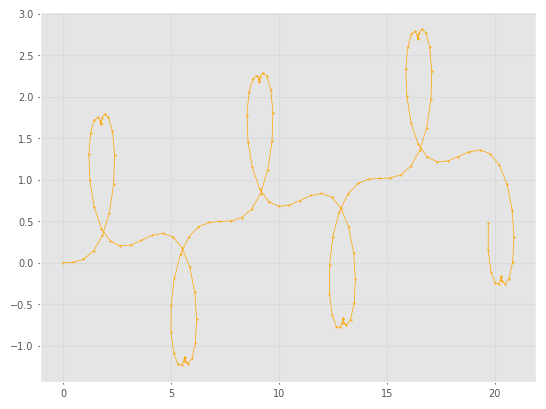

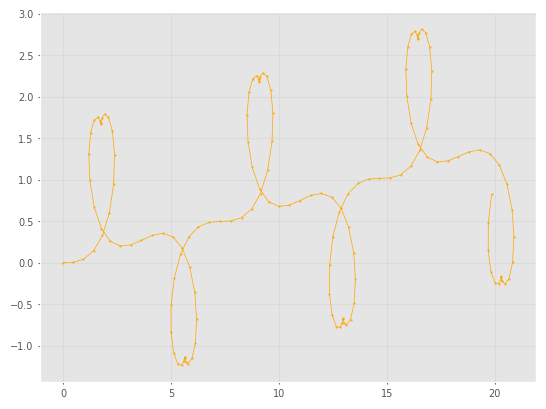

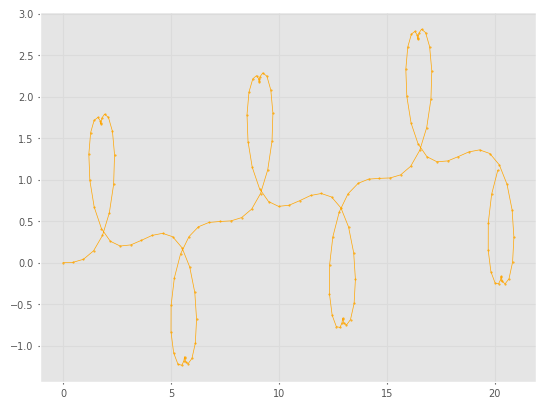

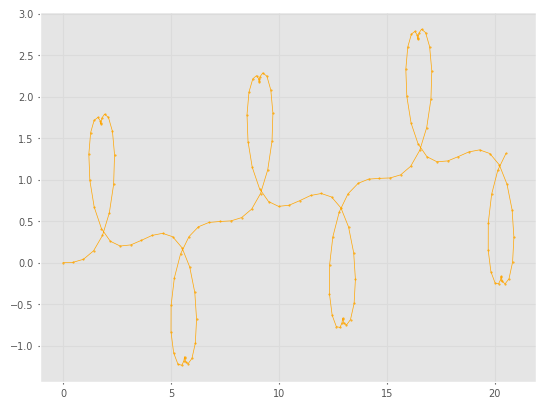

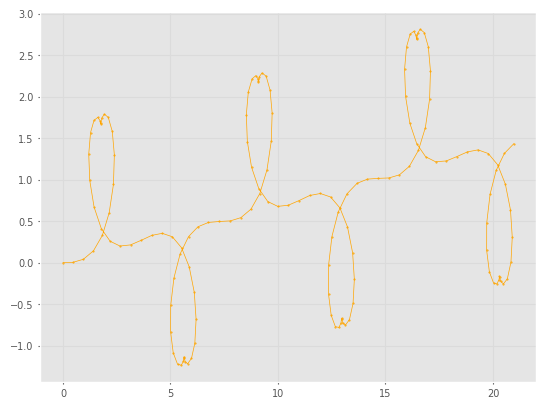

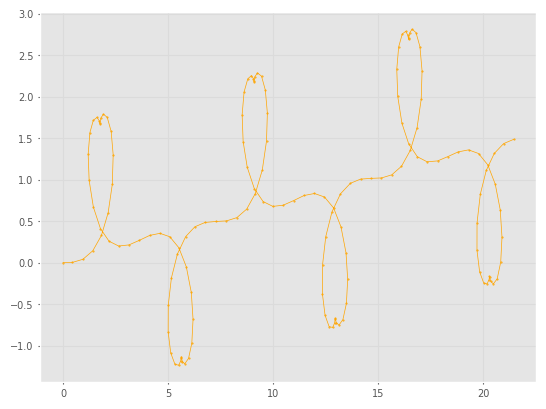

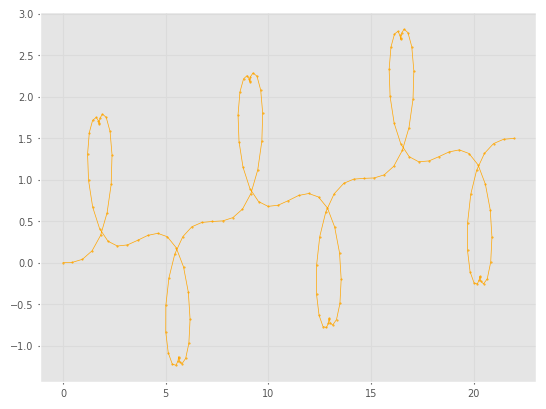

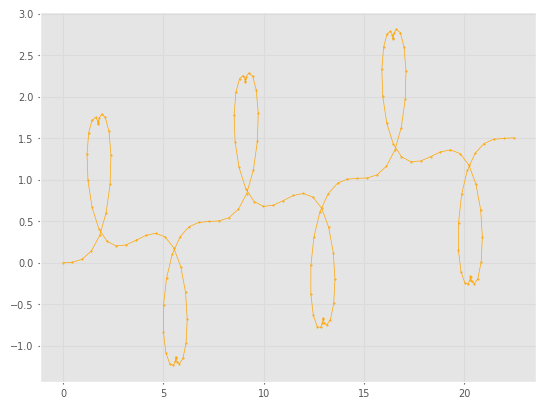

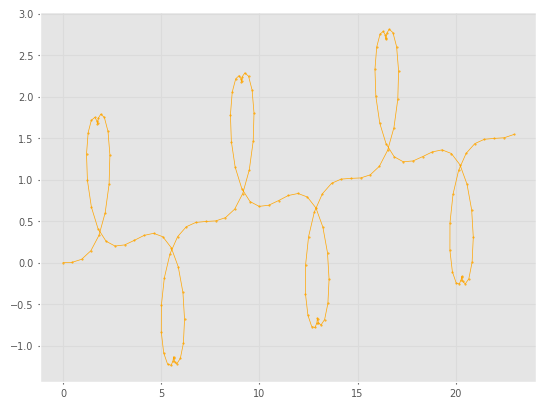

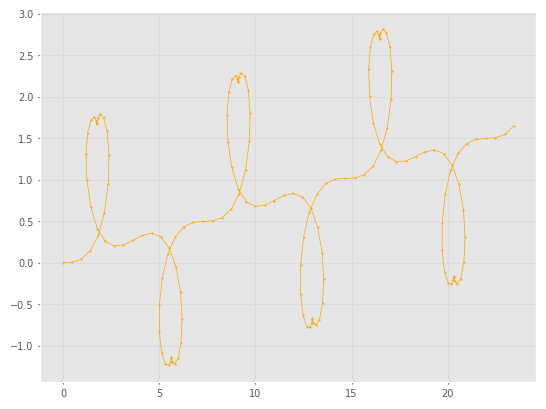

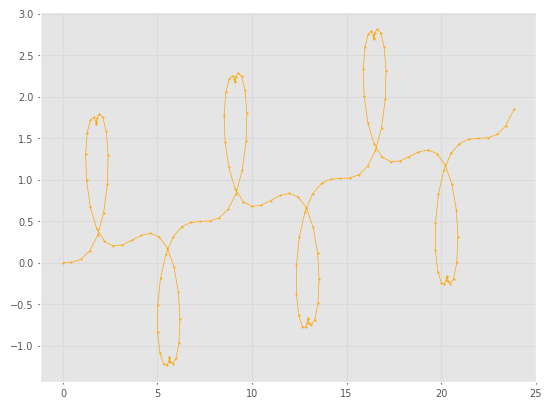

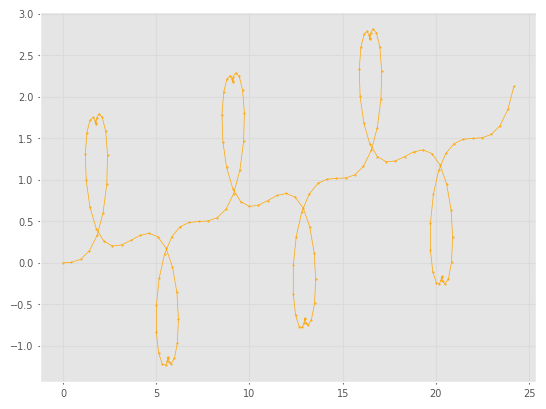

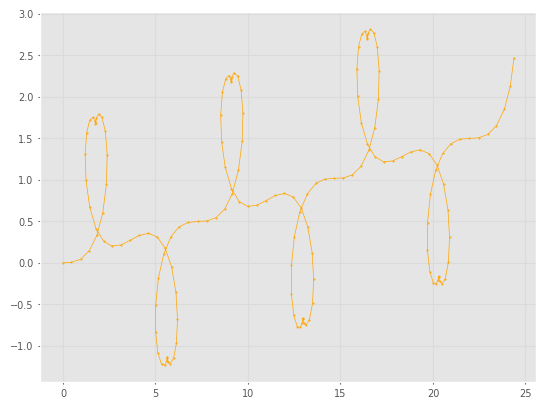

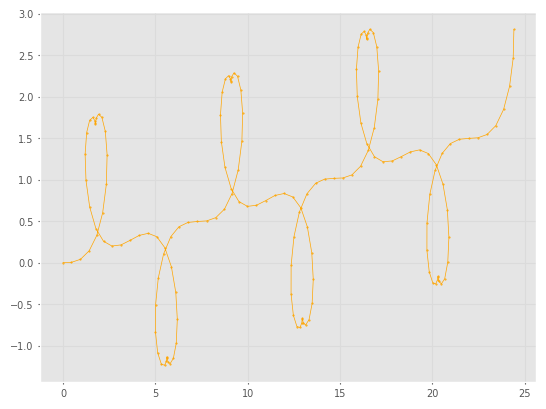

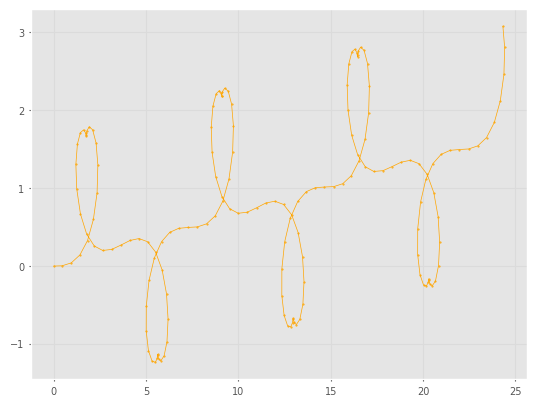

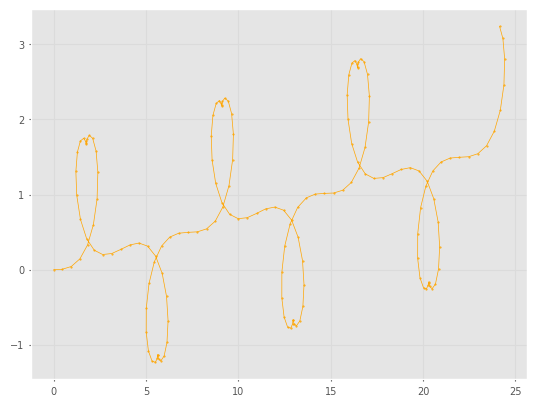

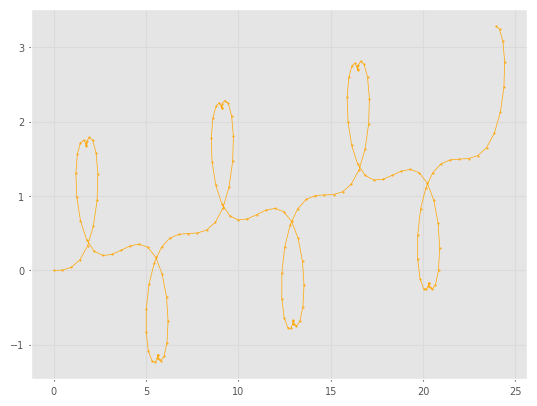

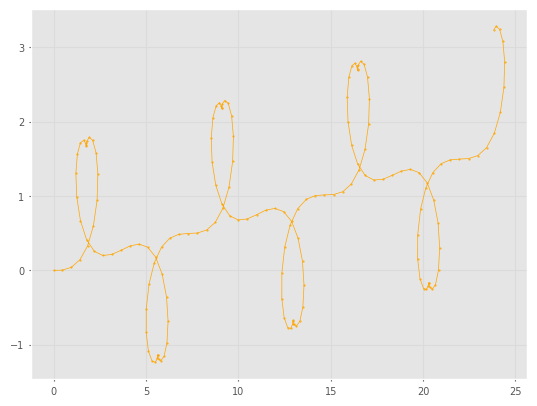

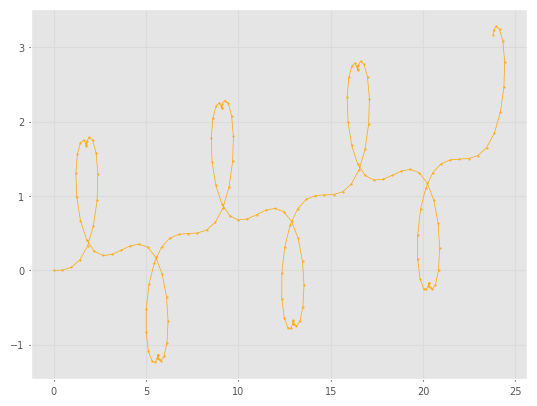

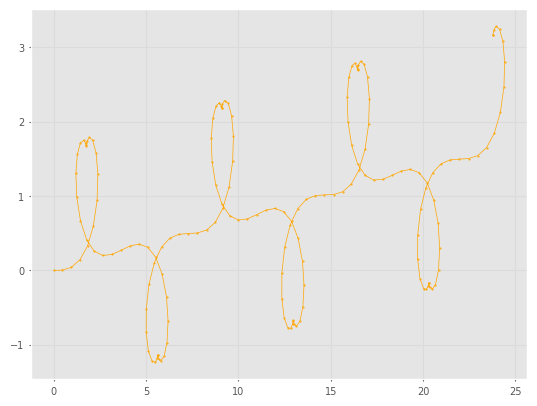

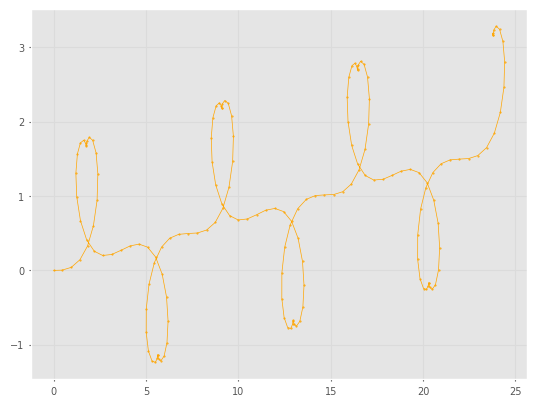

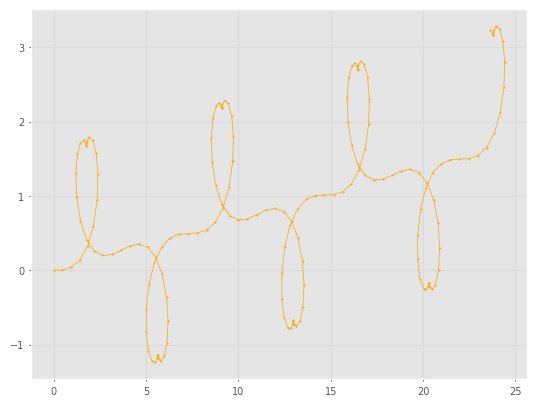

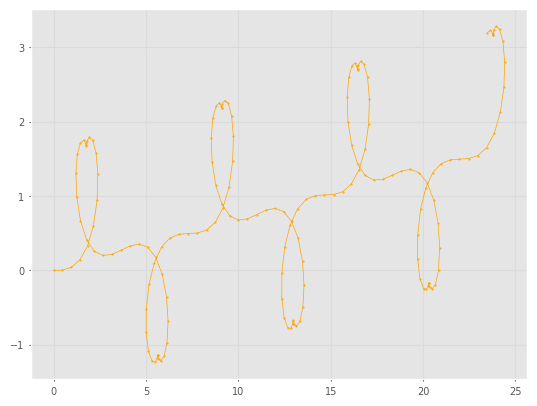

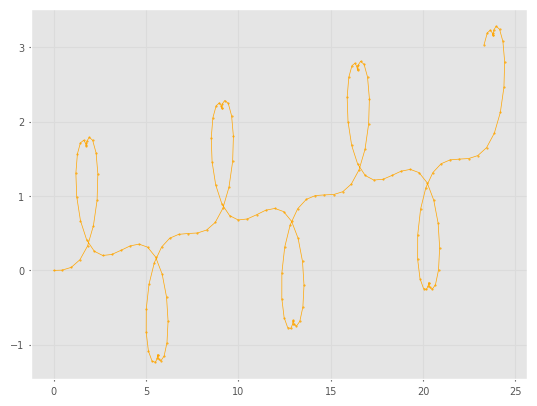

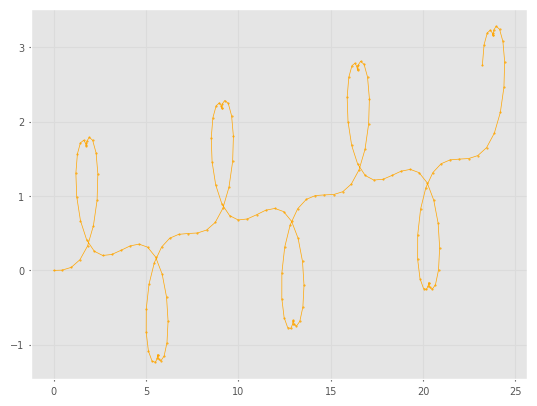

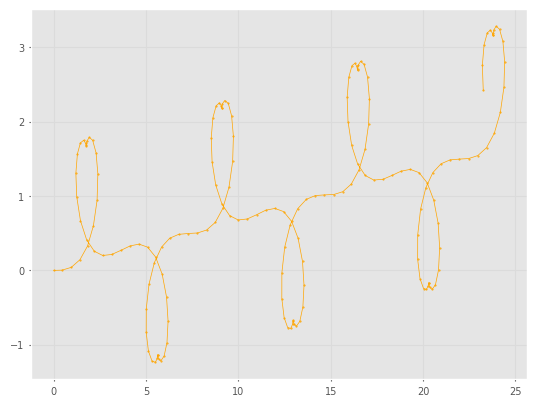

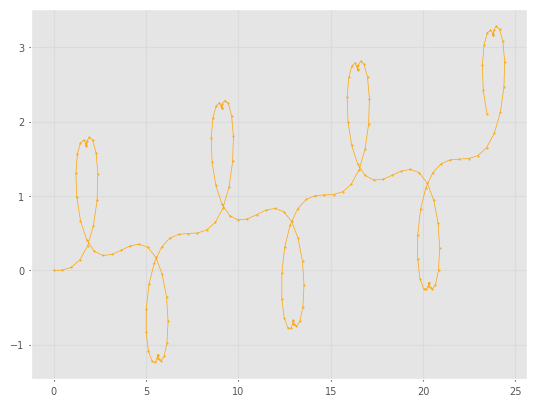

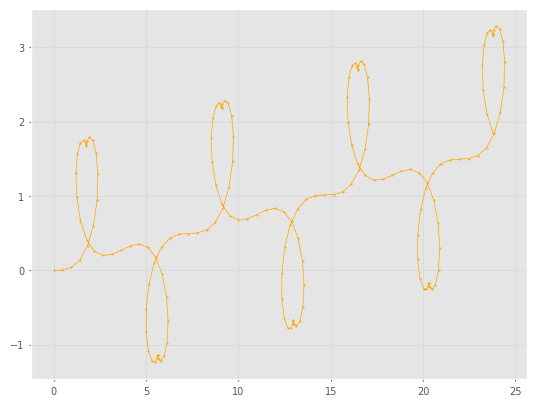

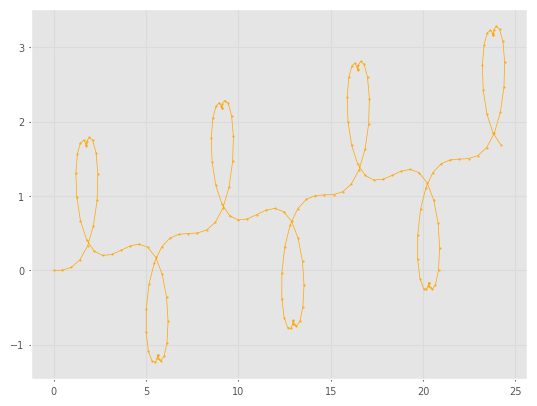

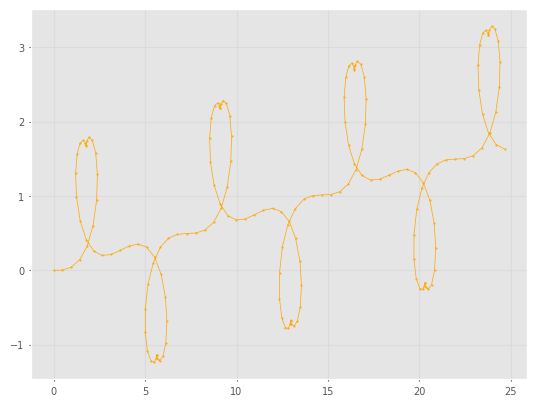

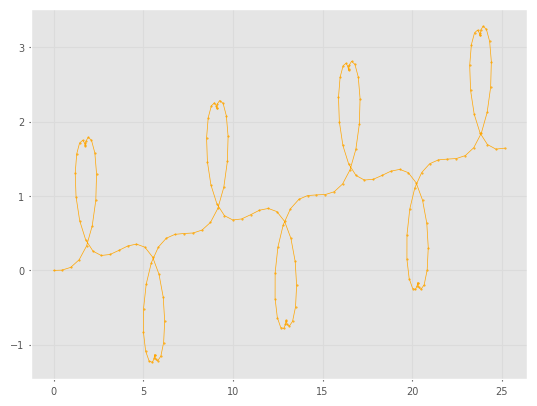

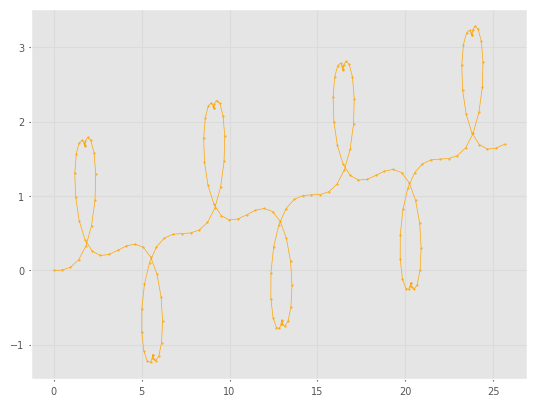

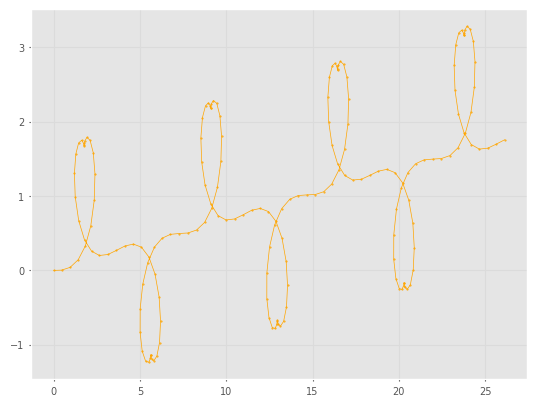

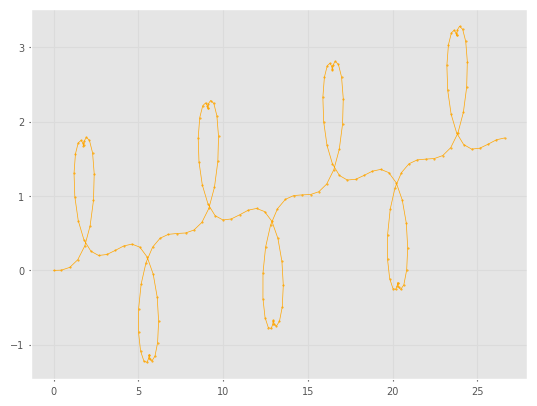

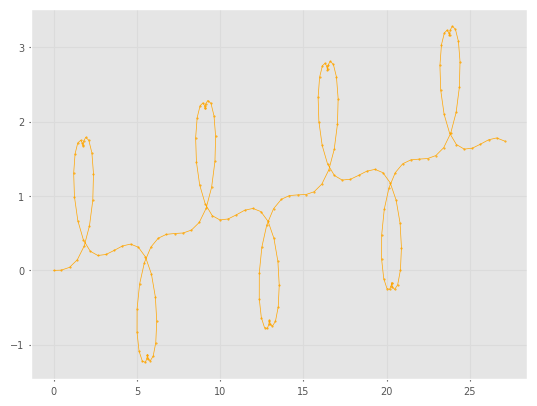

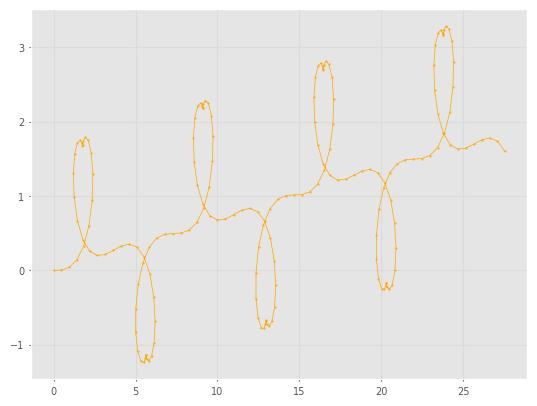

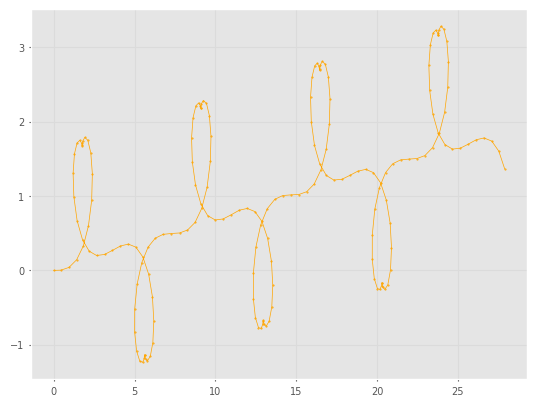

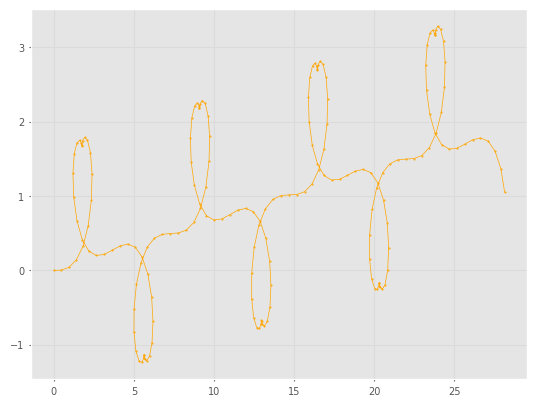

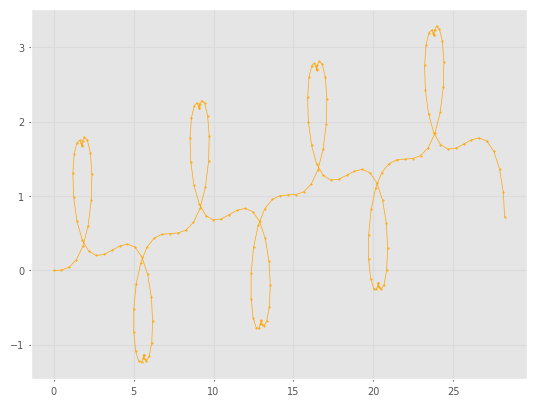

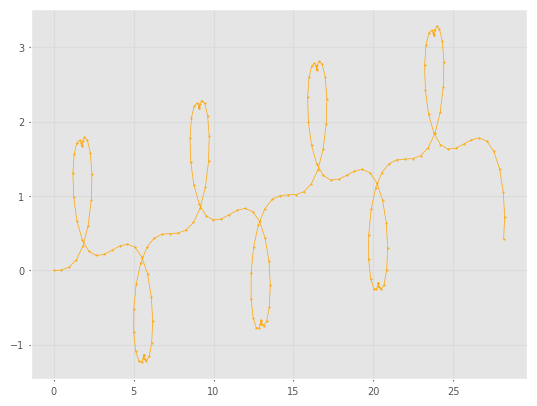

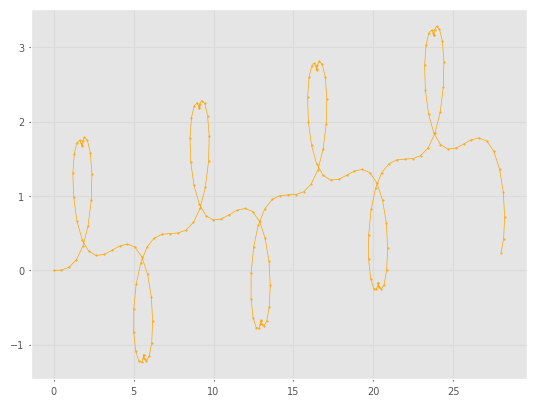

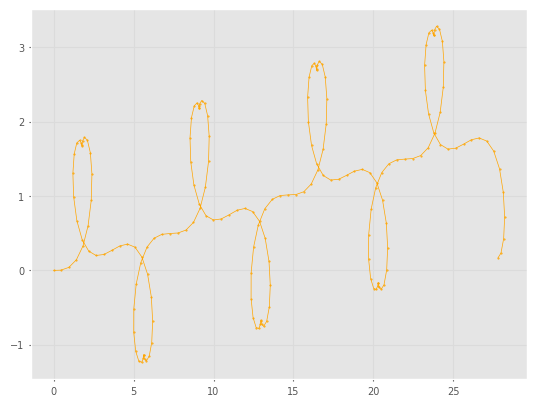

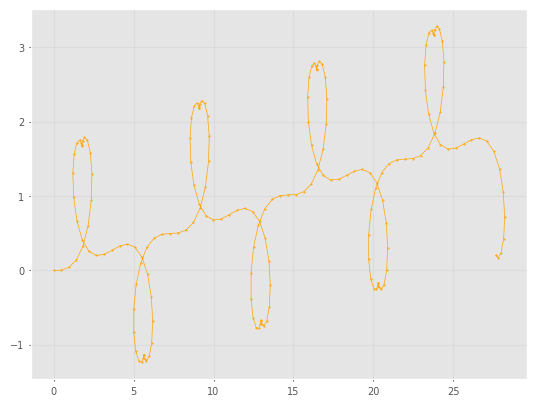

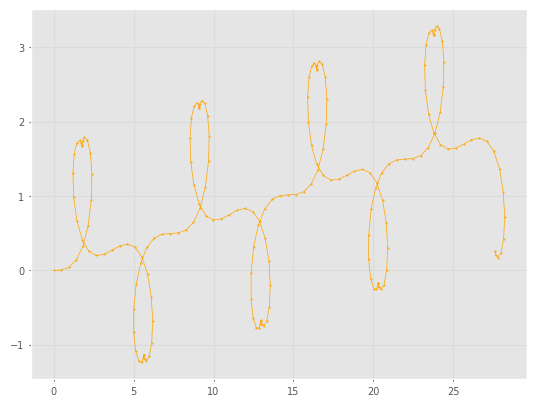

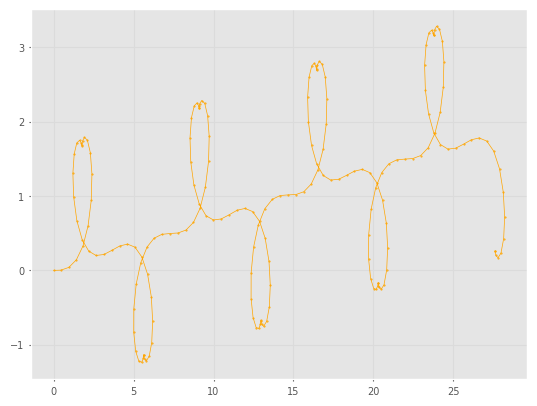

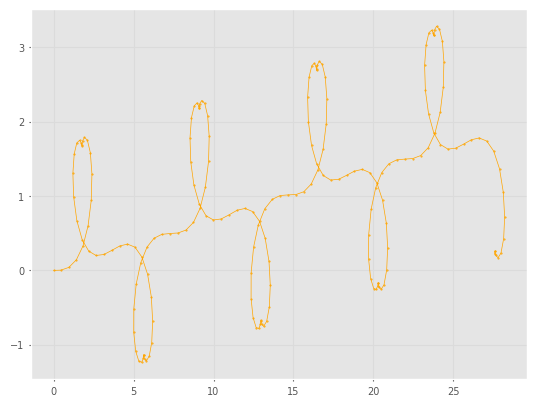

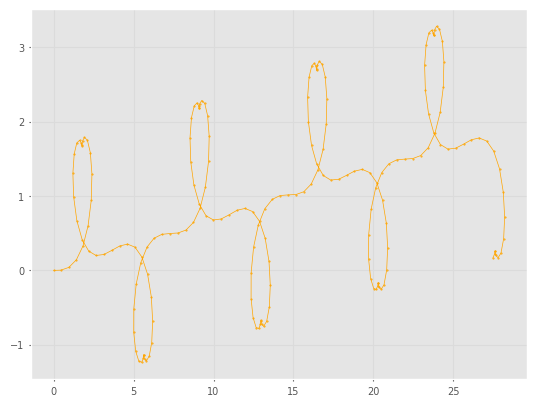

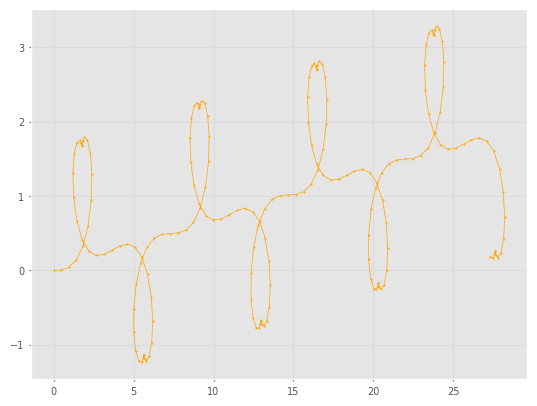

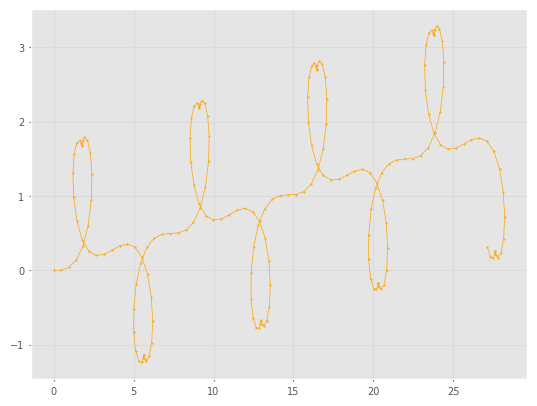

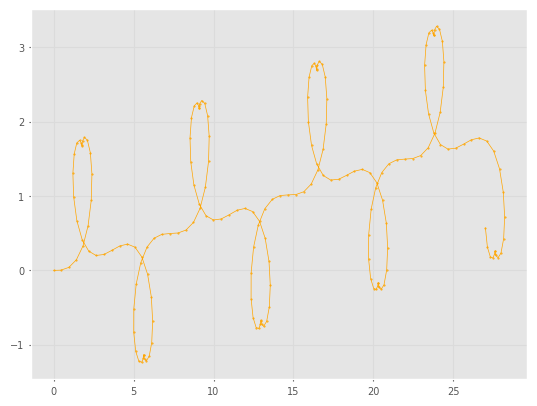

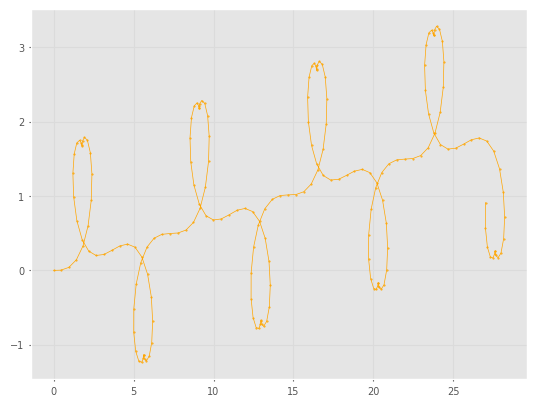

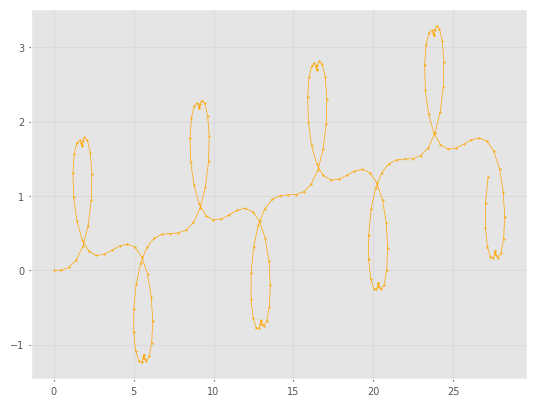

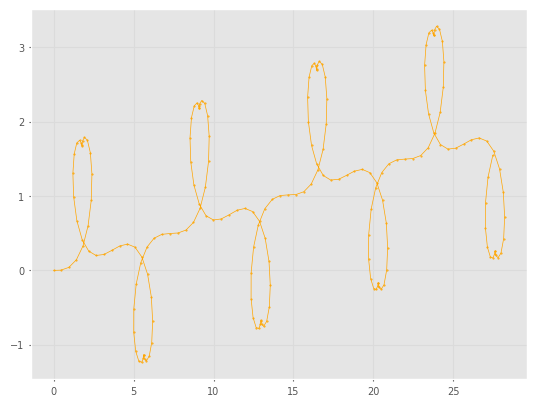

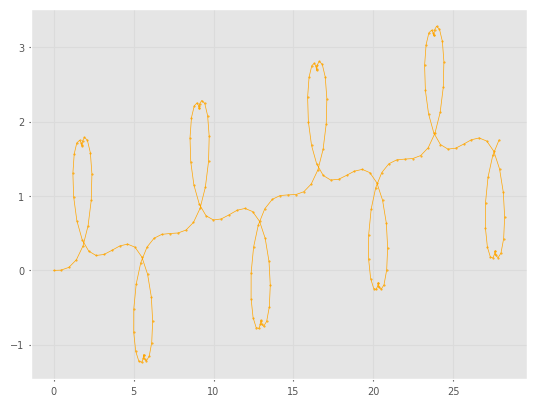

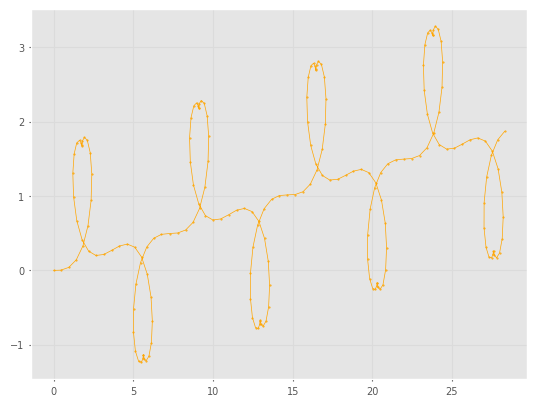

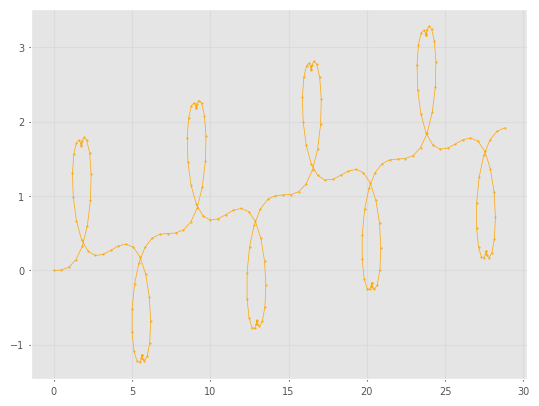

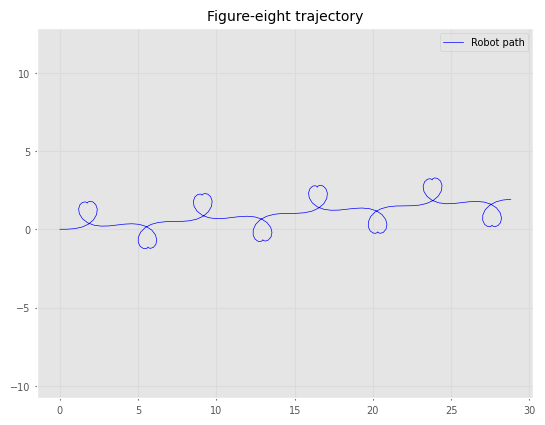

In [7]:
# --------------- Figure-eight trajectory (FINAL REVISION) ---------------
print("Simulating figure-eight trajectory...")
xsk_1 = xs0.copy()
robot.xTraj, robot.yTraj = [], []

# Revised Parameters for a proper figure-eight crossing
steps = 2000 # Run for 200 seconds of simulation time
amp = 0.5    # Linear velocity amplitude (u_d)
r_amp = 0.6  # ANGULAR AMPLITUDE INCREASED
omega_freq = 2 * np.pi / 500 # Period of 500 steps (50 seconds per '8')

for k in range(steps):
    # This combination forces the robot to trace loops.
    u_figure8 = amp * np.cos(omega_freq * k) # Linear velocity (u_d)
    r_figure8 = r_amp * np.sin(omega_freq * k) # Angular velocity (r_d)

    usk = np.array([u_figure8, r_figure8])
    xsk = robot.fs(xsk_1, usk)
    xsk_1 = xsk

plt.figure()
plt.title("Figure-eight trajectory")
plt.plot(robot.xTraj, robot.yTraj, 'blue', label='Robot path')
plt.axis('equal') # Essential to see the true shape
plt.grid(True)
plt.legend()
plt.show()

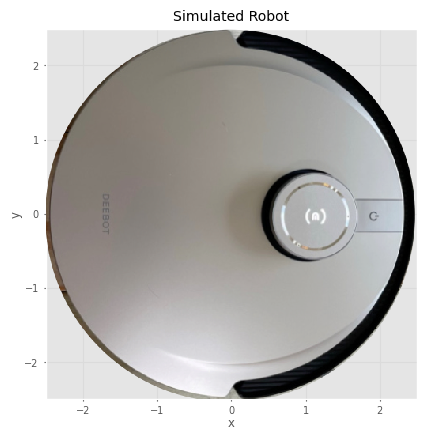

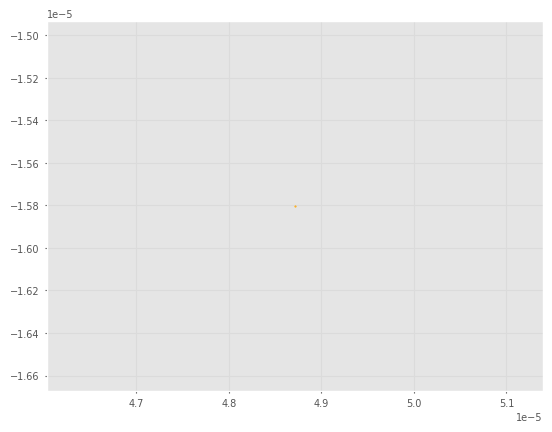

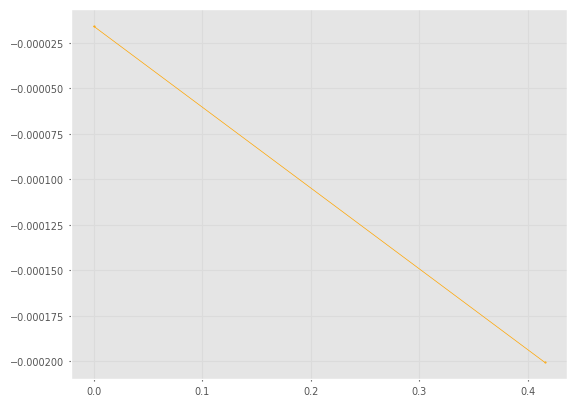

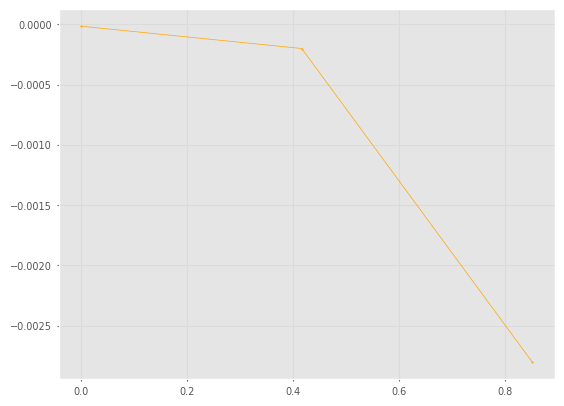

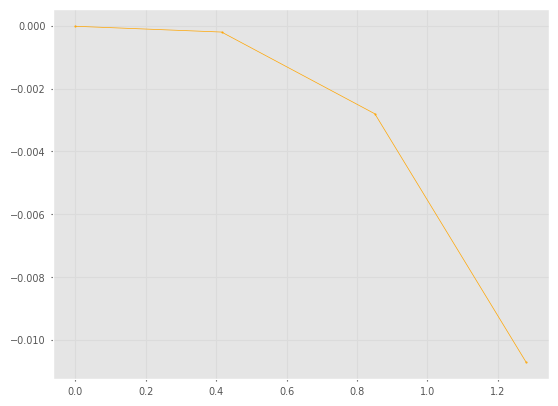

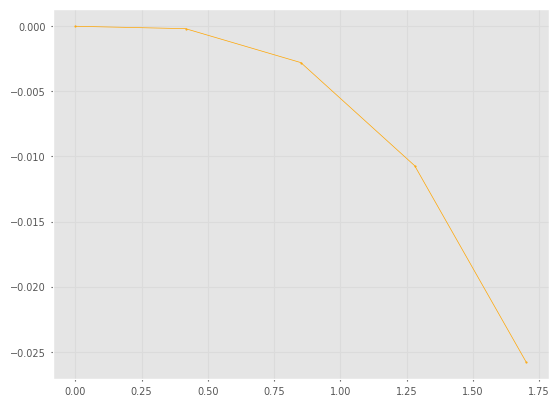

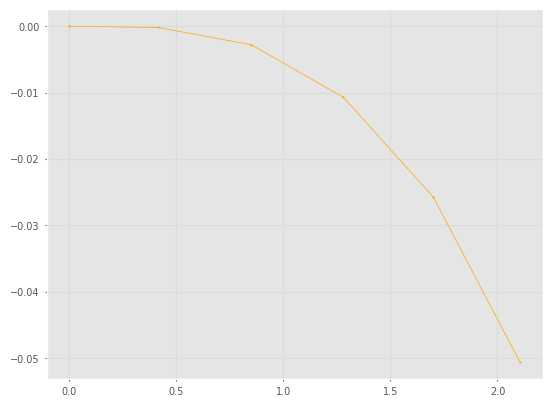

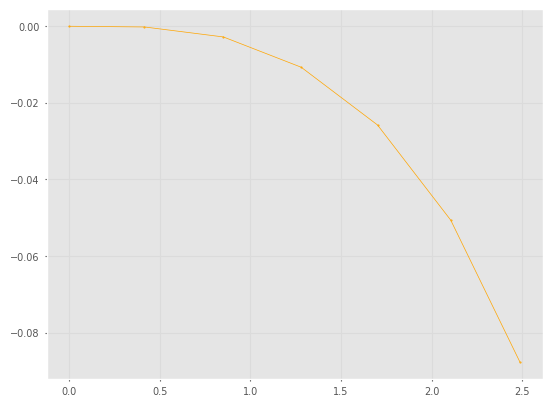

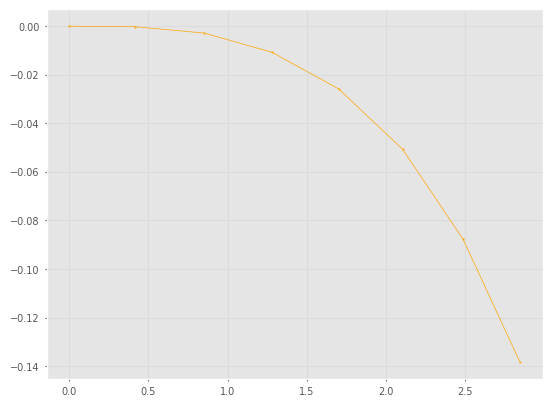

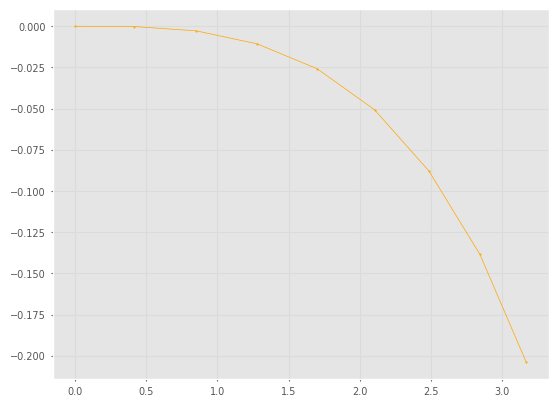

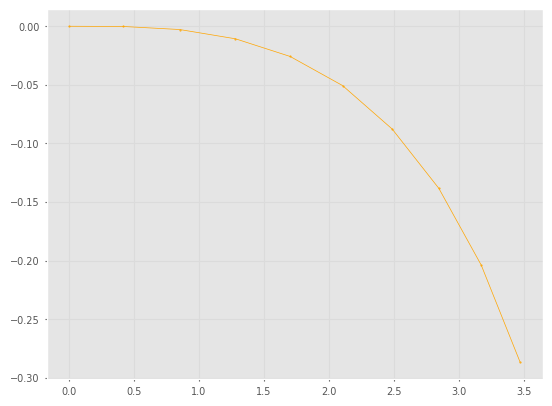

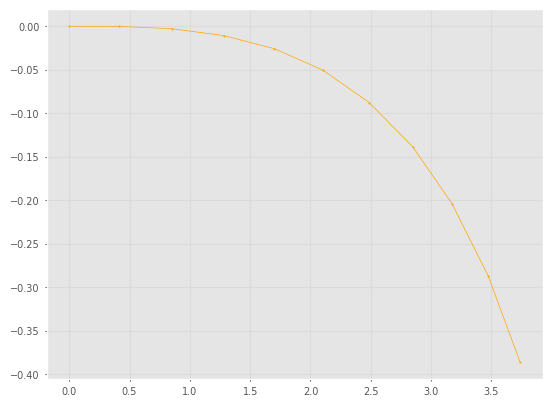

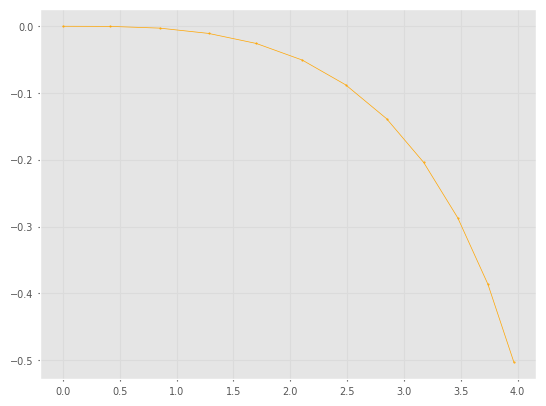

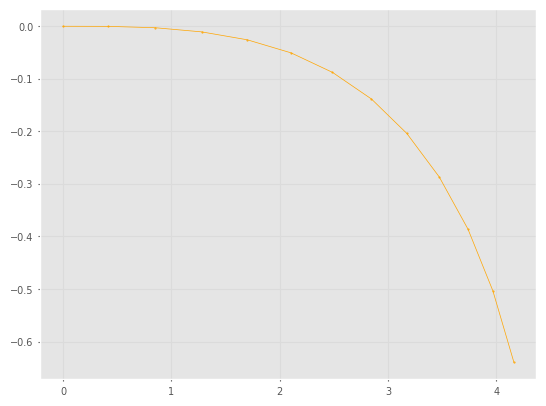

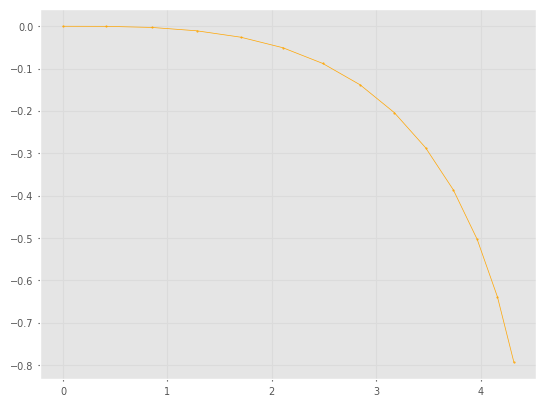

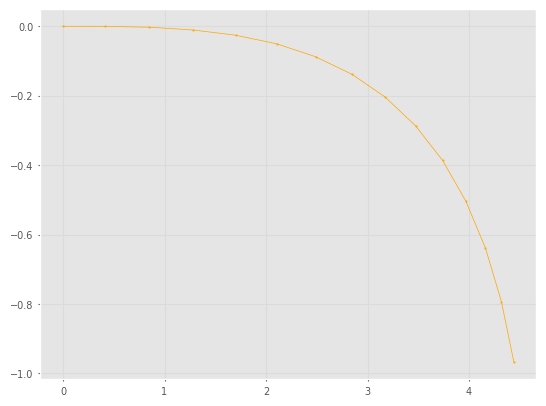

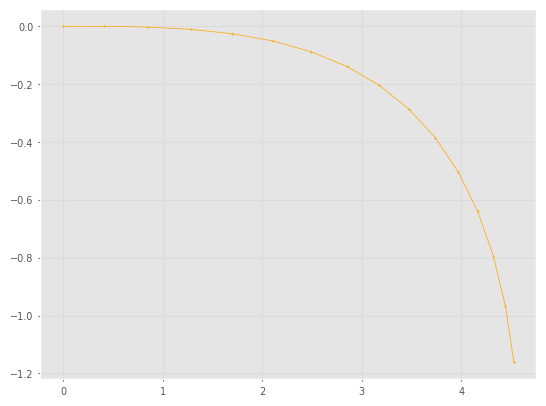

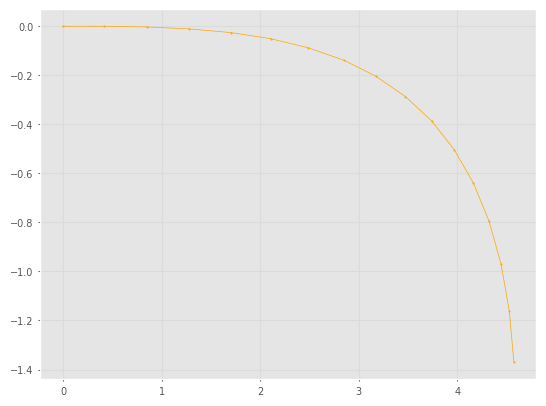

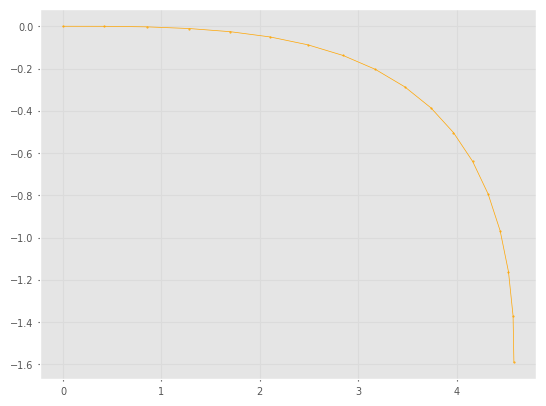

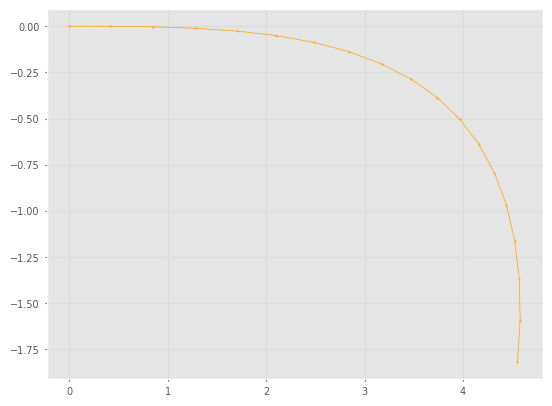

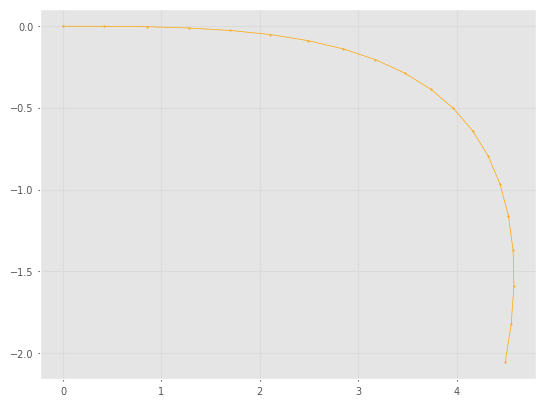

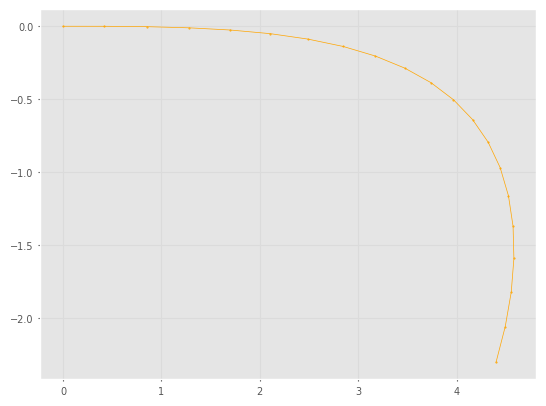

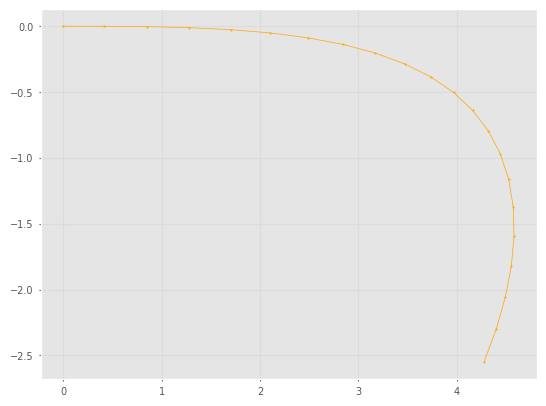

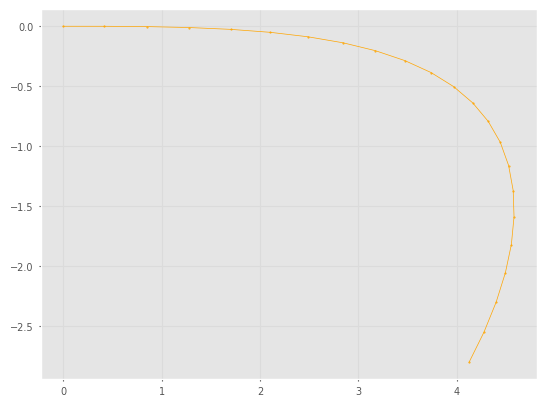

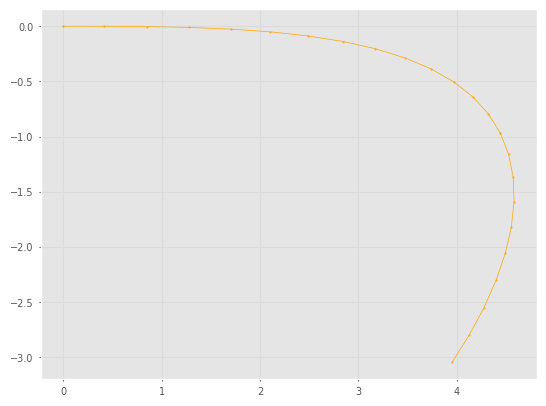

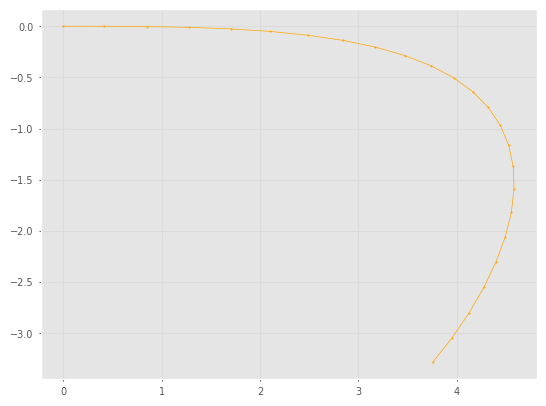

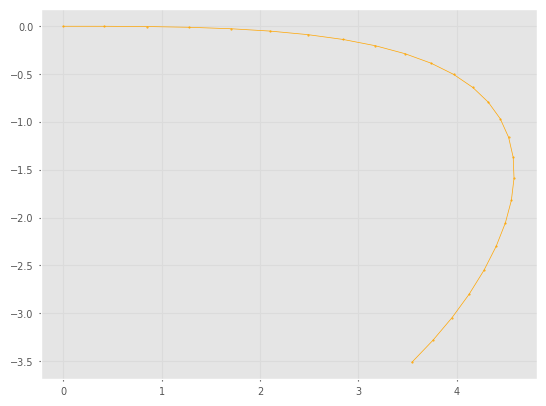

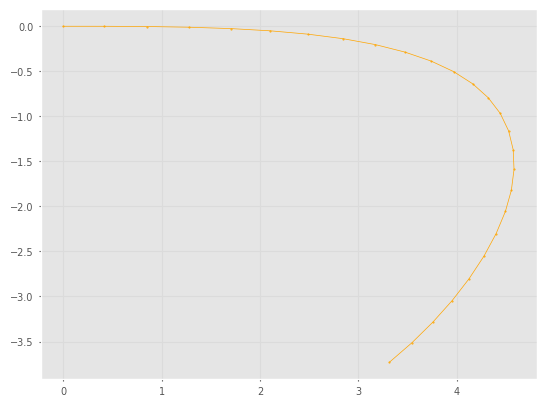

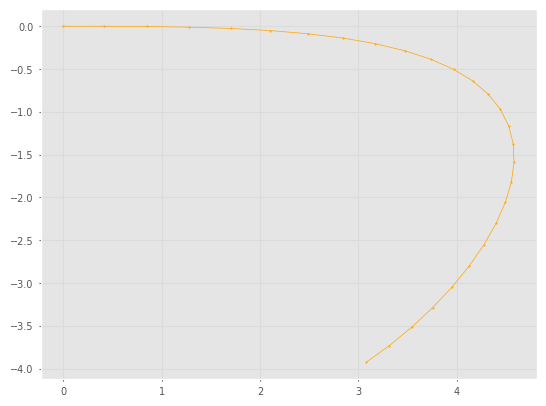

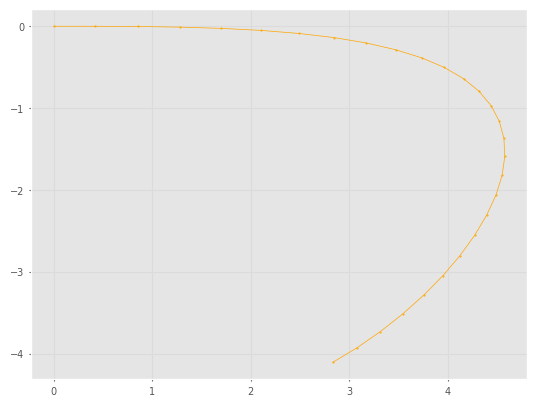

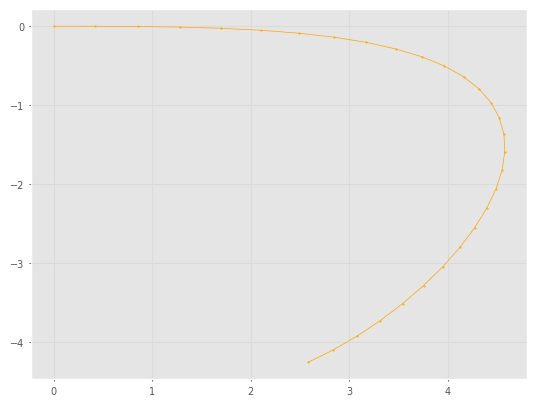

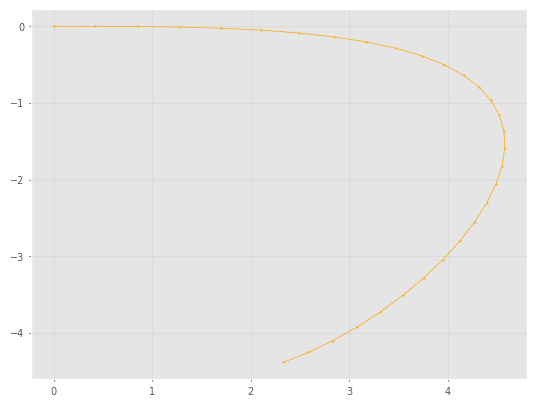

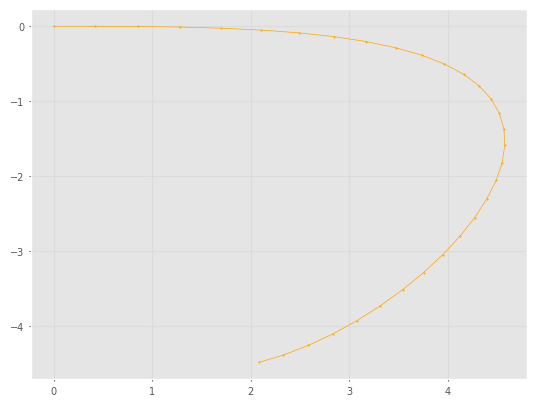

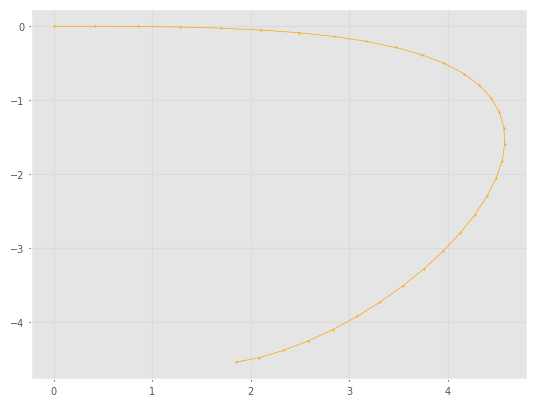

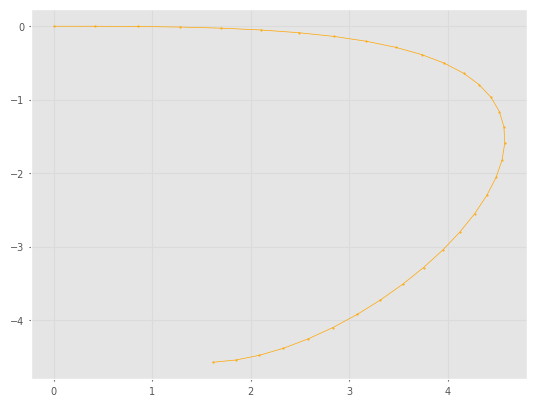

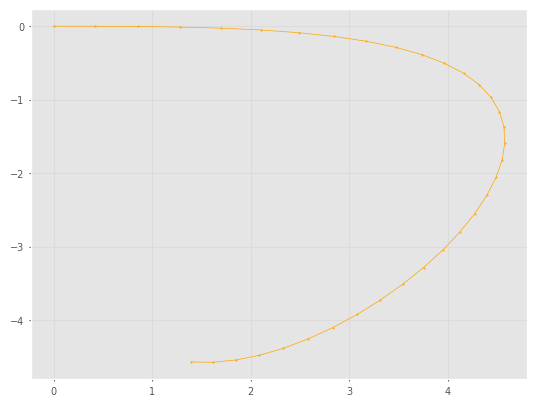

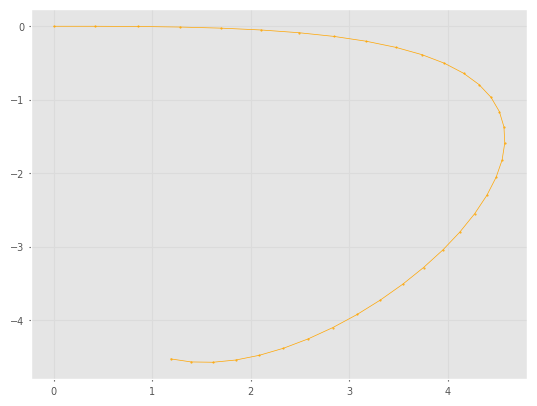

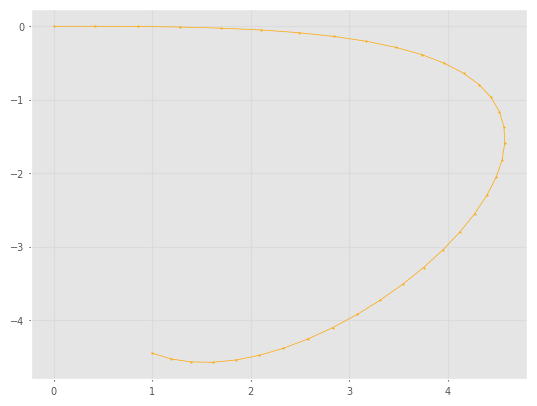

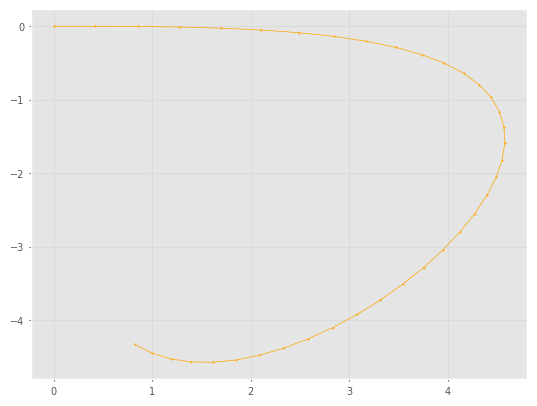

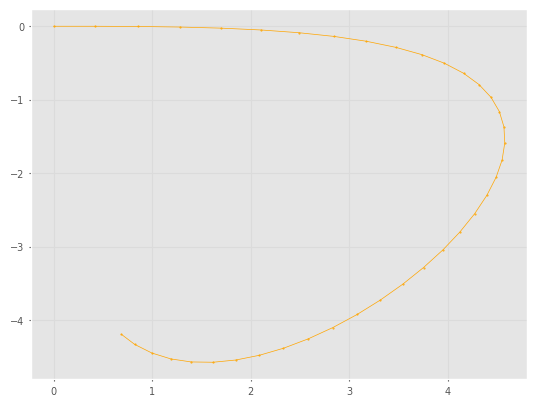

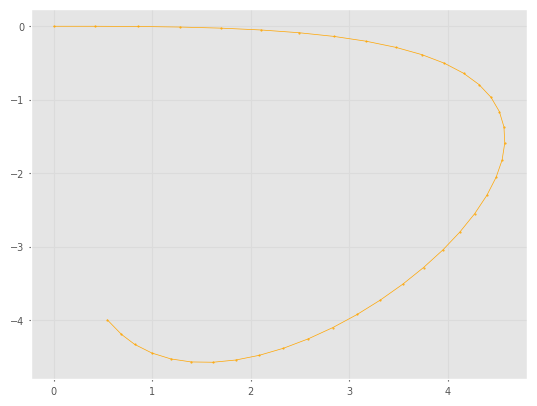

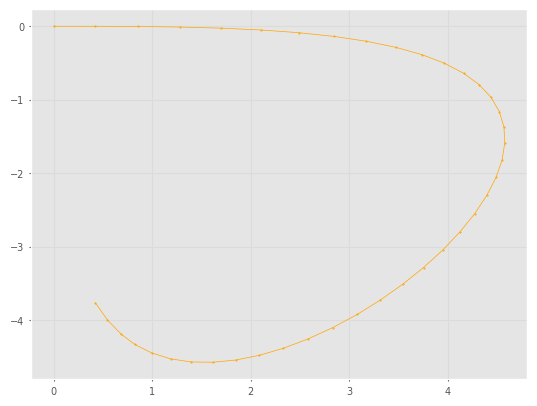

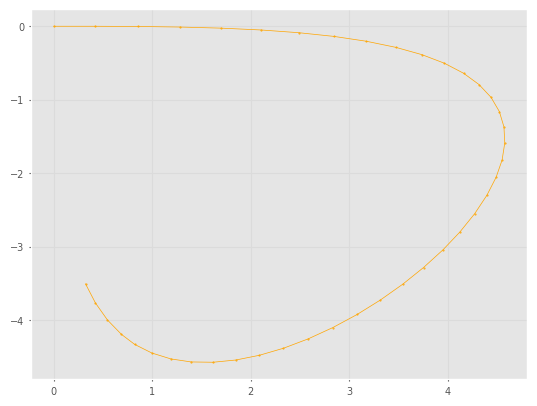

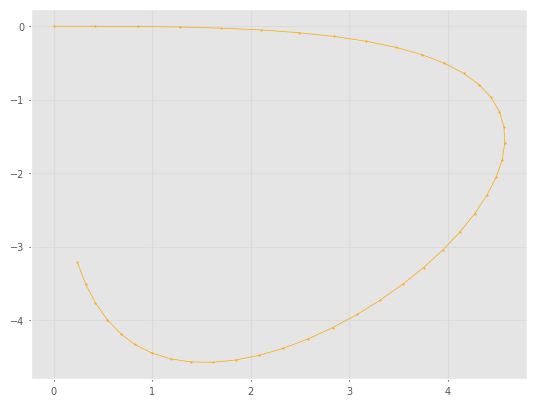

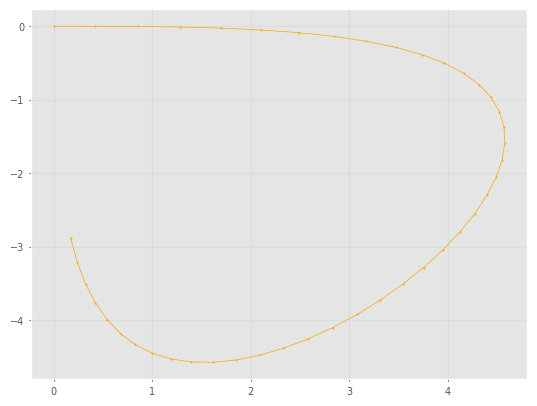

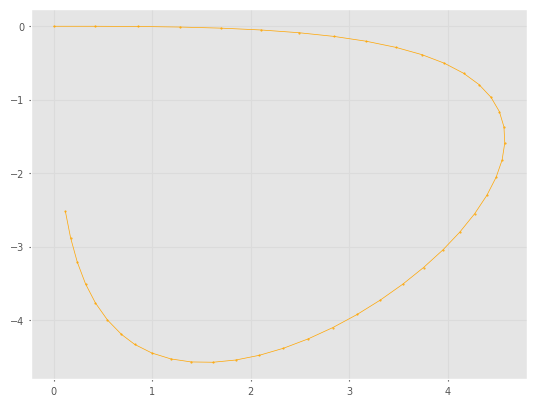

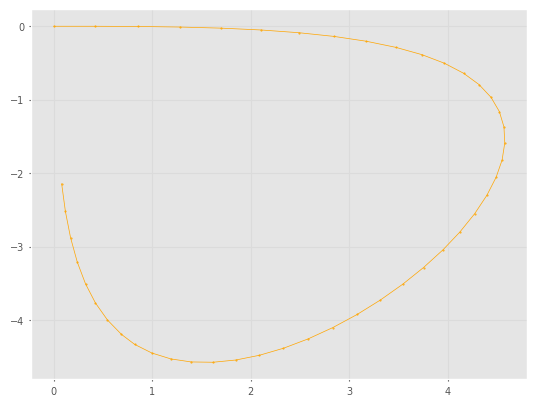

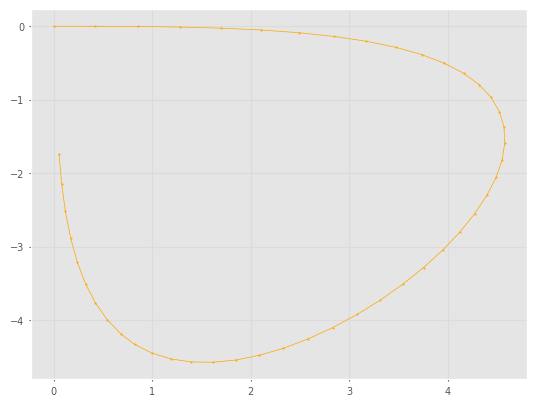

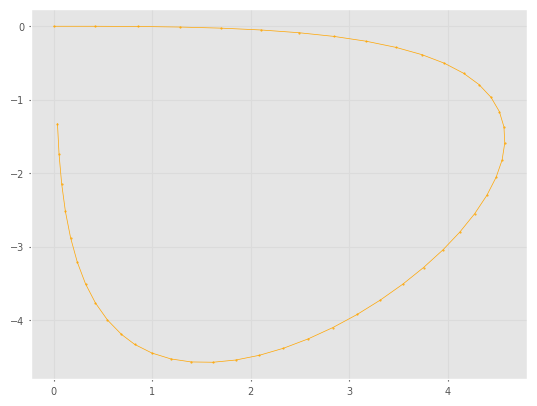

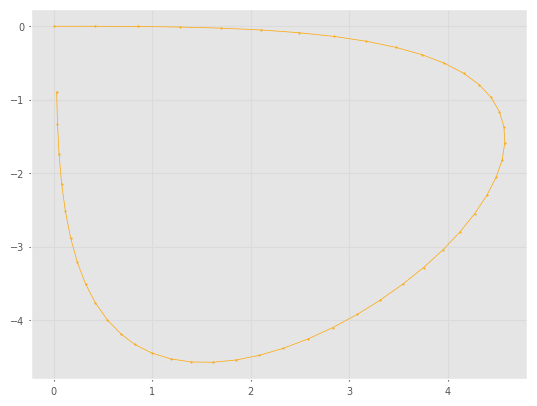

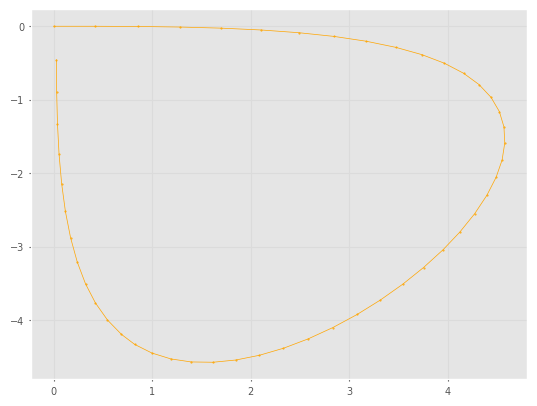

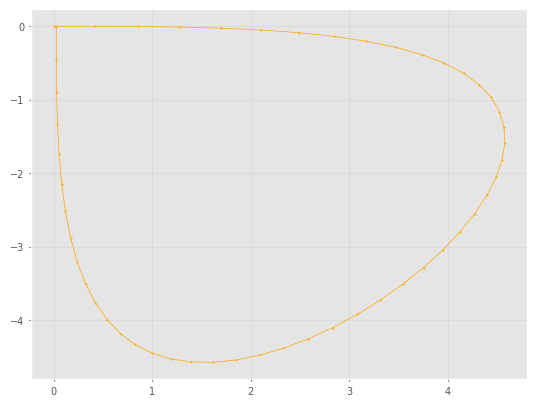

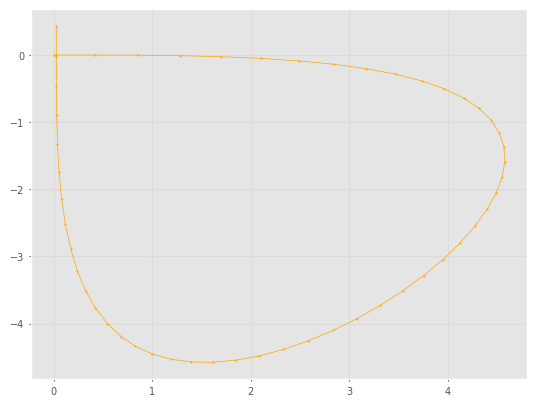

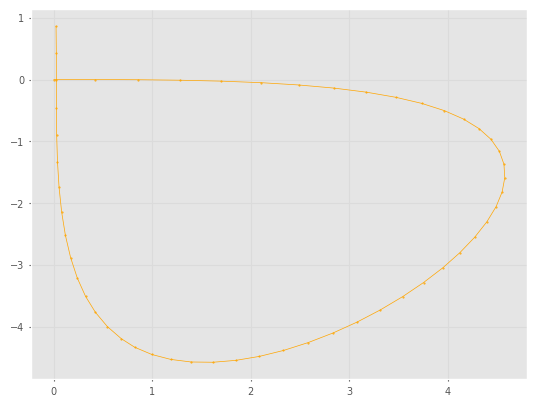

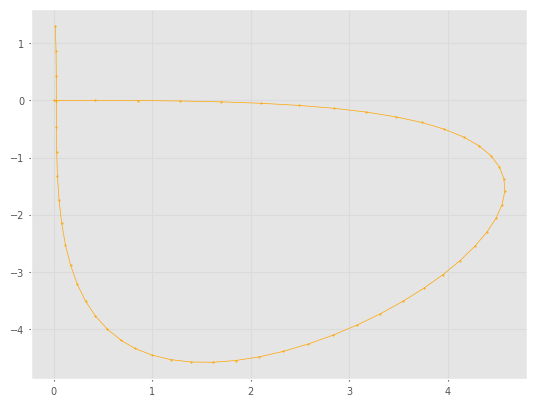

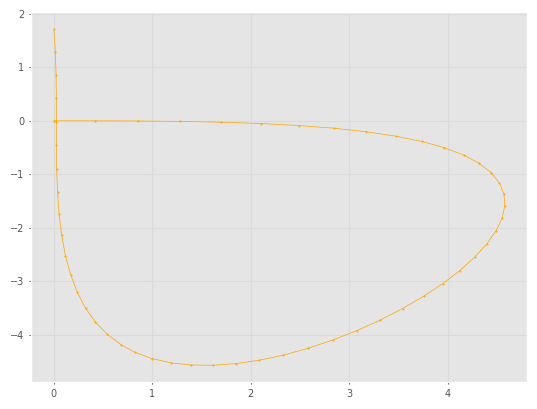

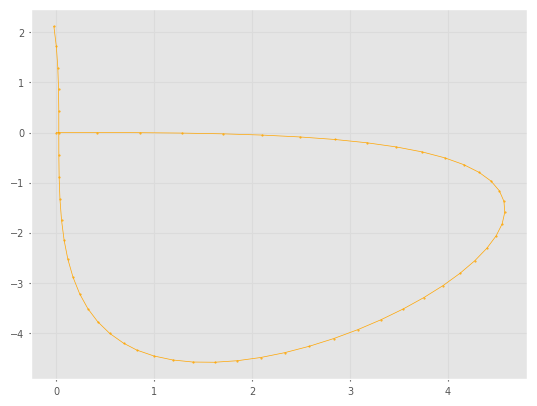

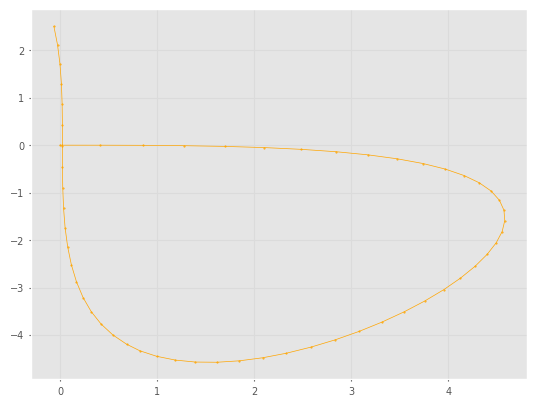

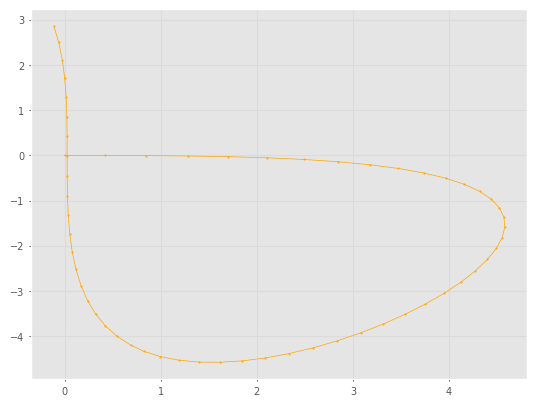

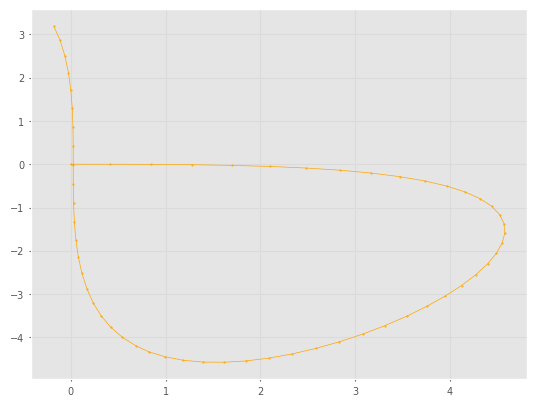

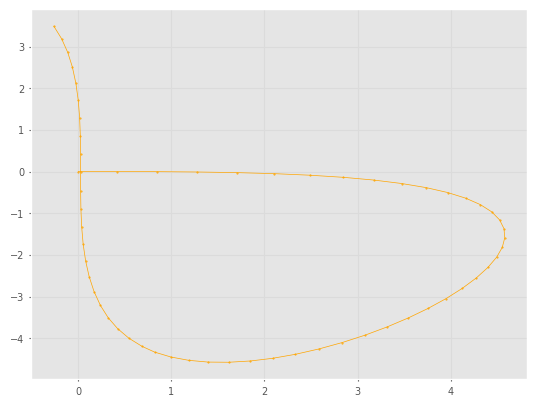

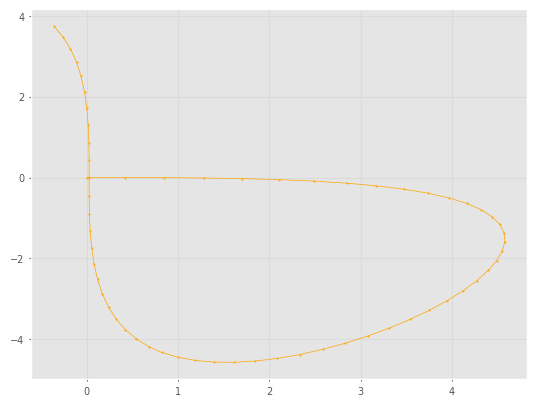

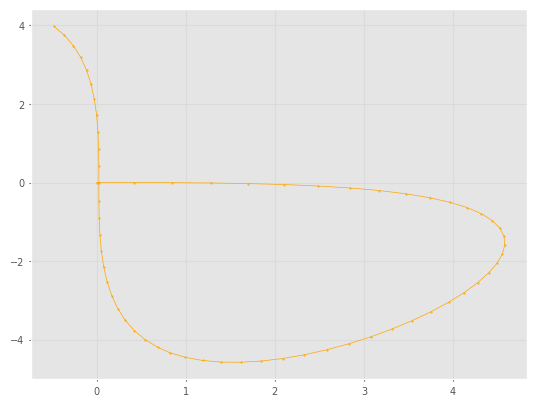

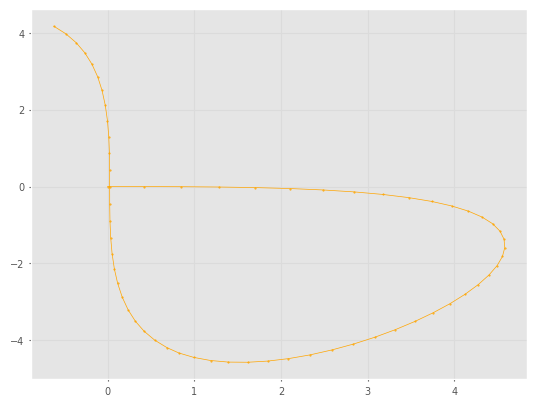

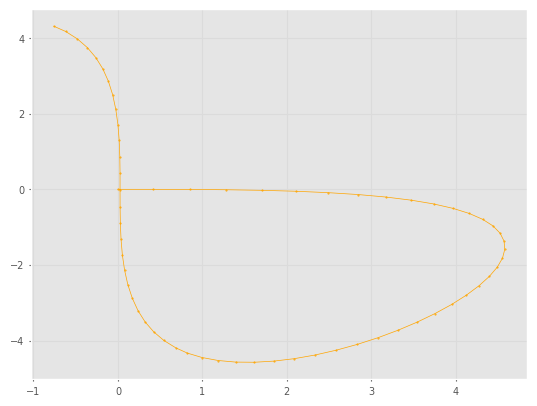

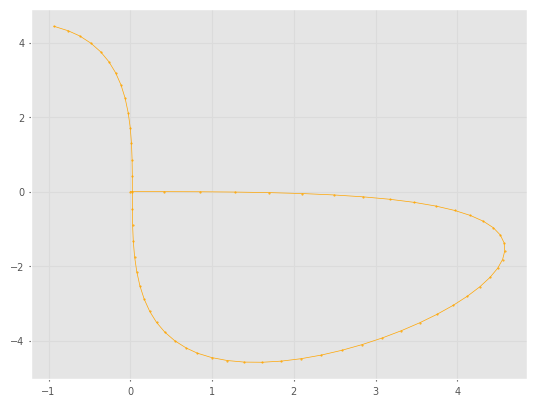

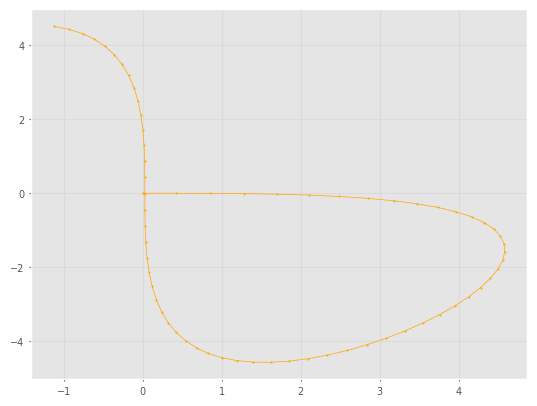

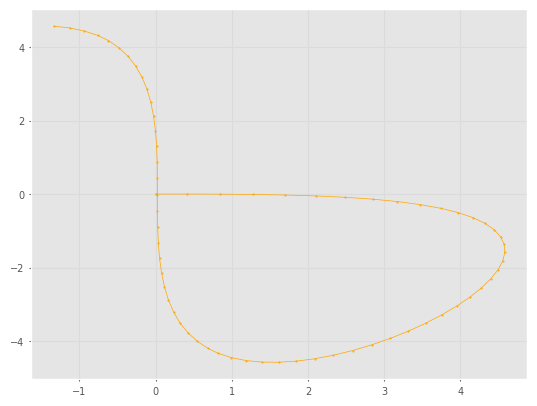

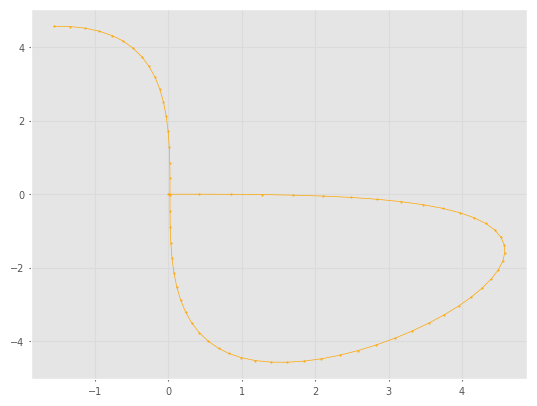

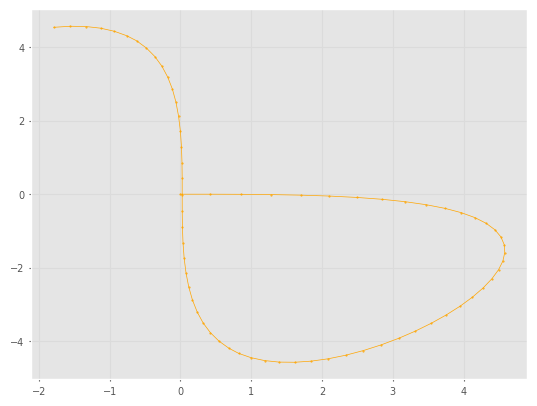

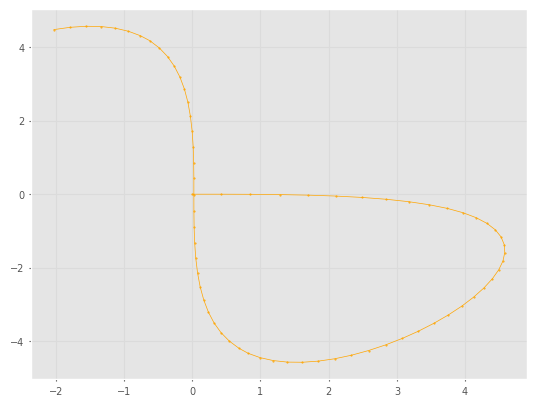

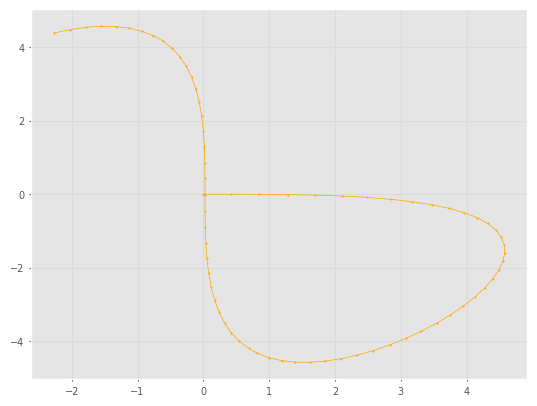

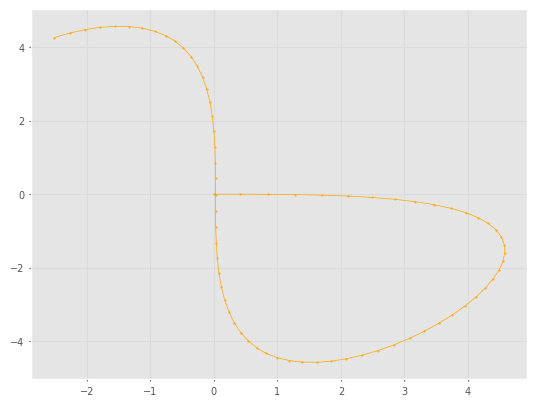

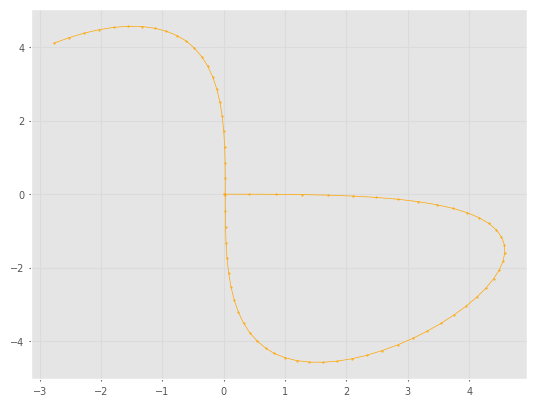

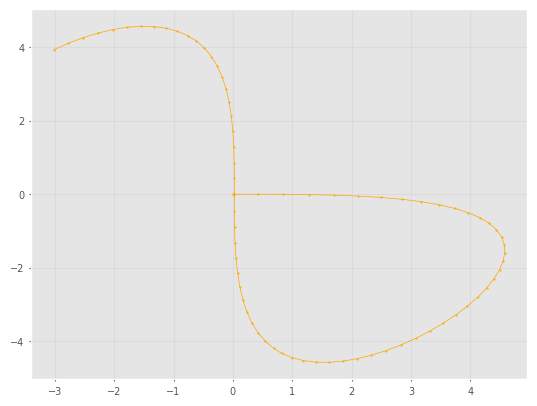

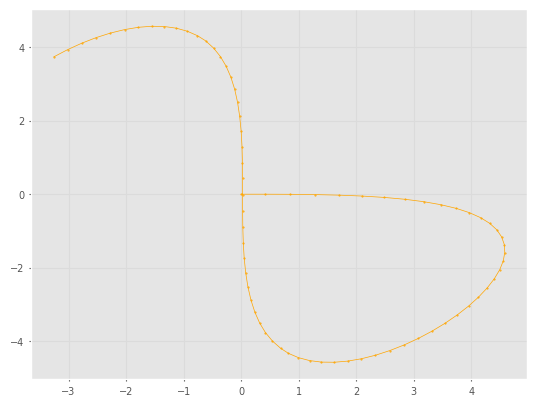

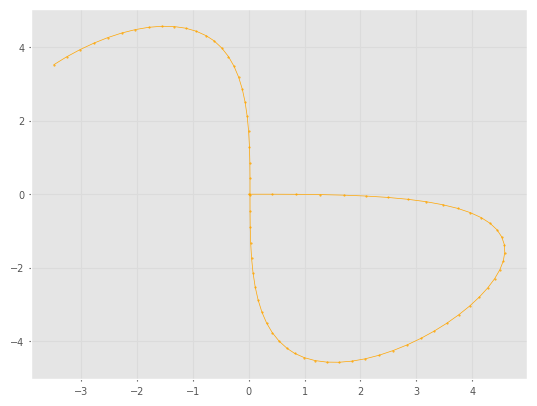

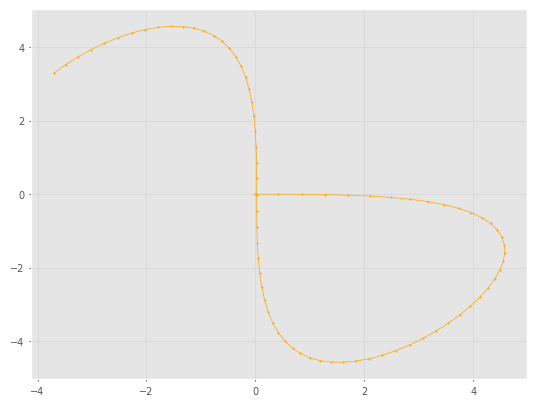

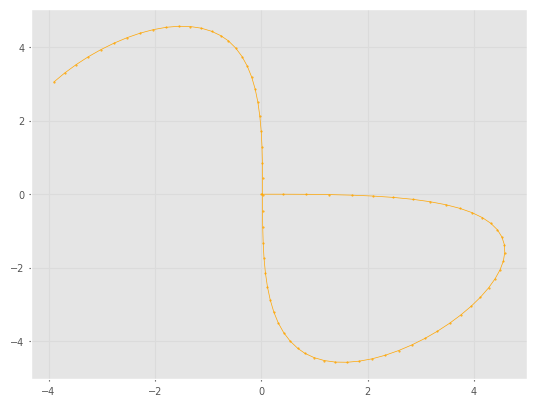

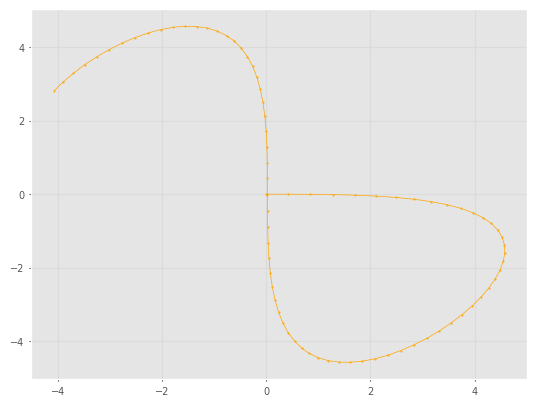

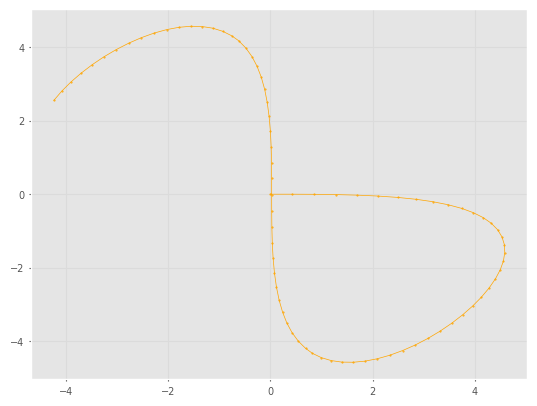

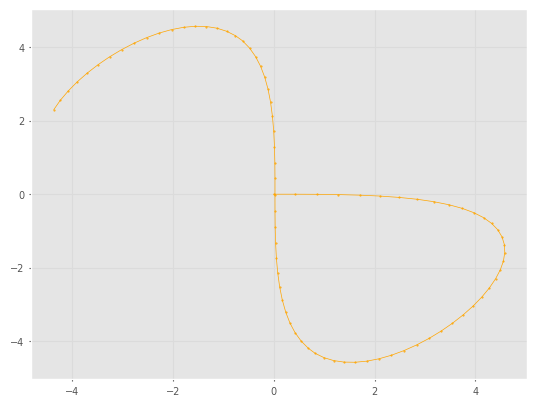

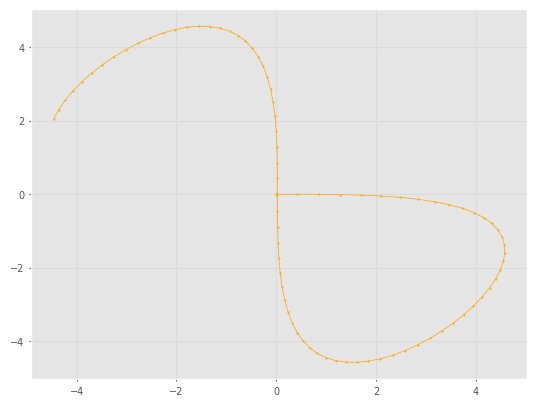

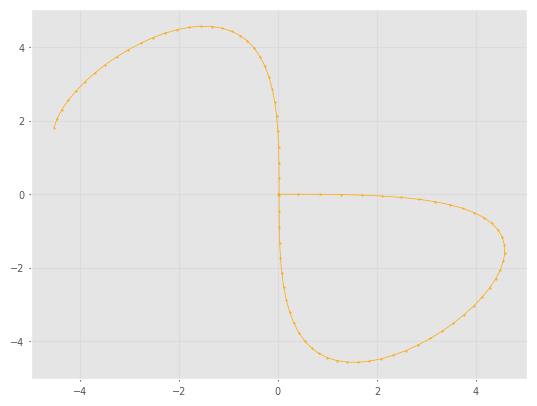

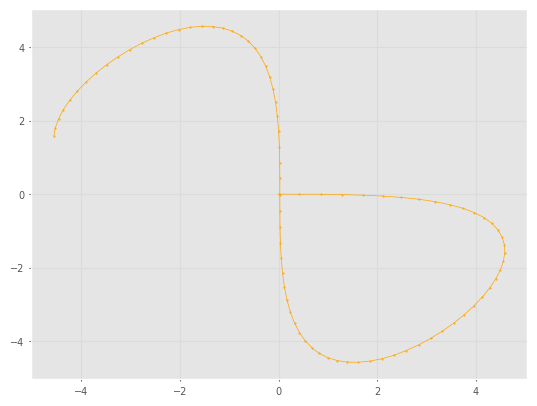

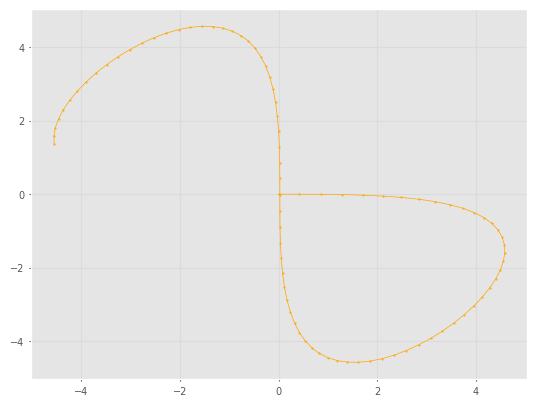

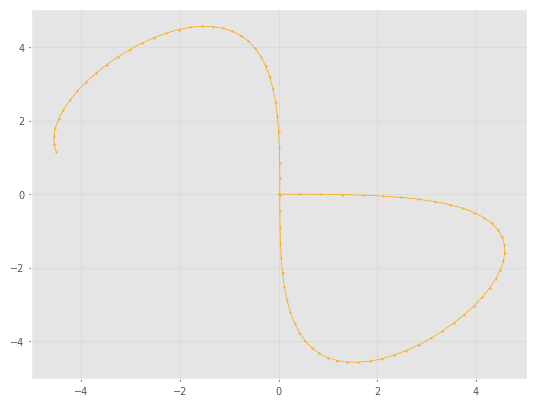

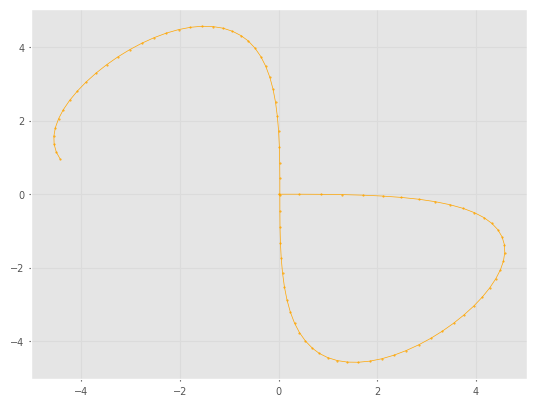

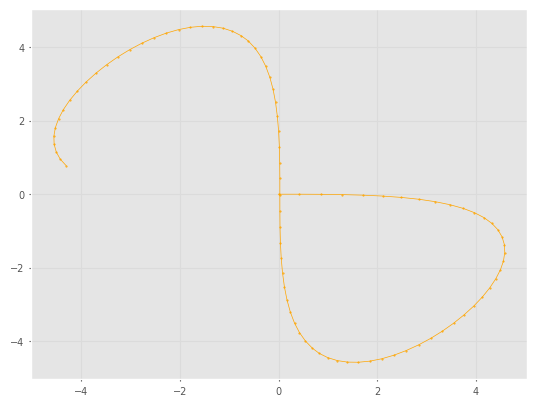

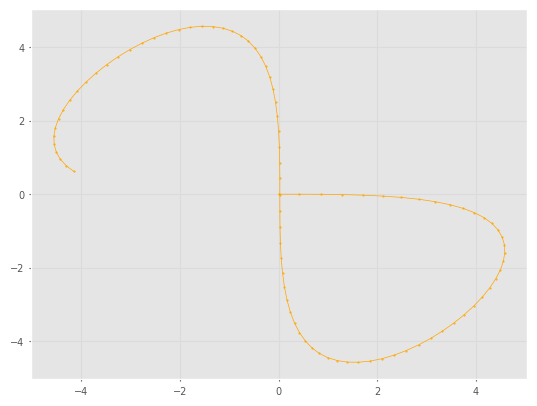

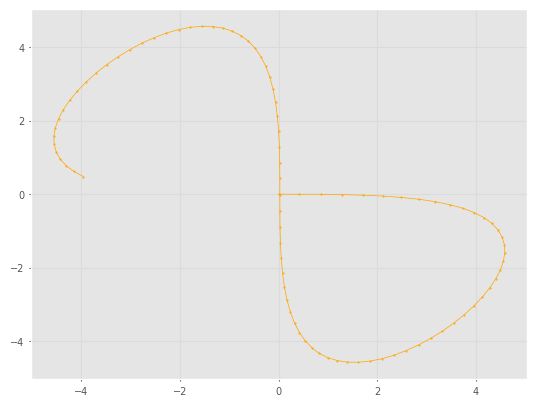

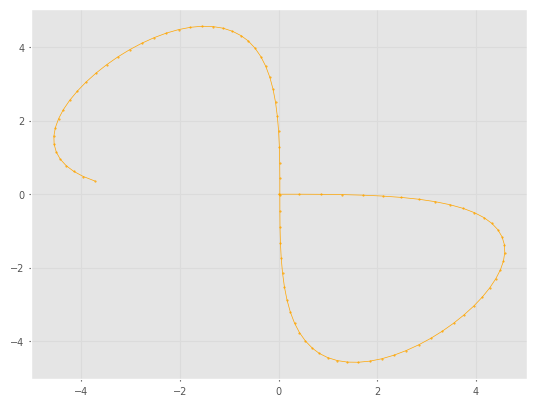

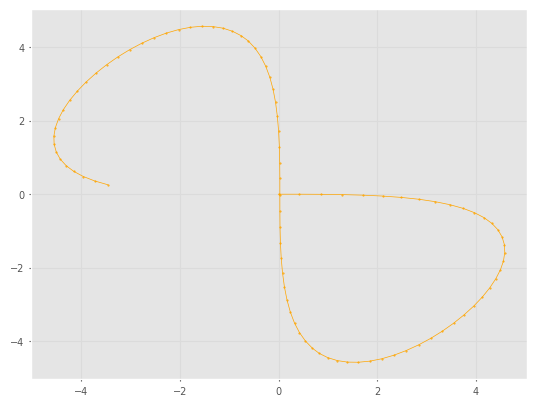

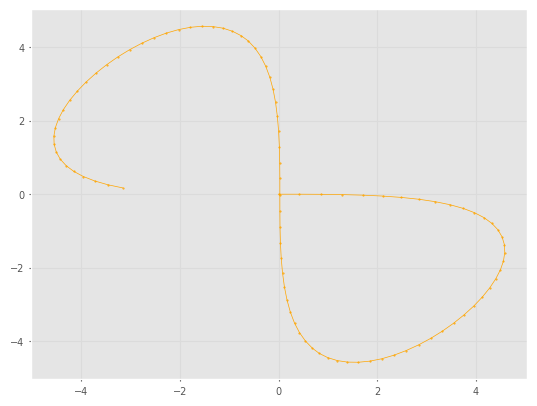

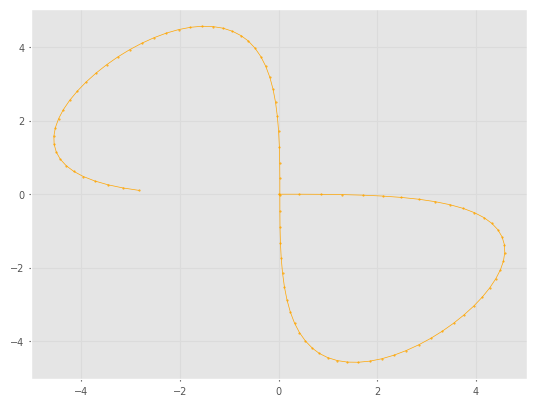

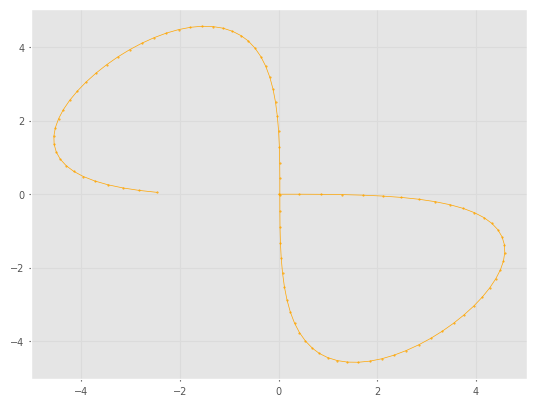

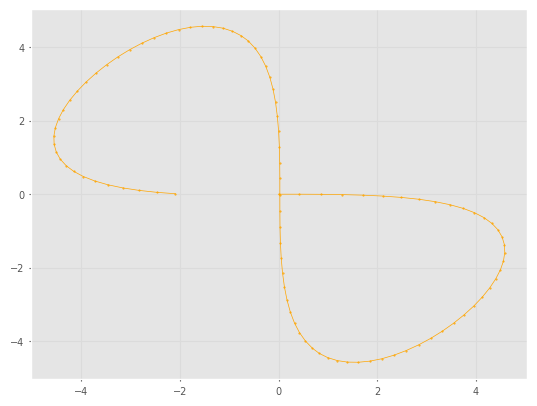

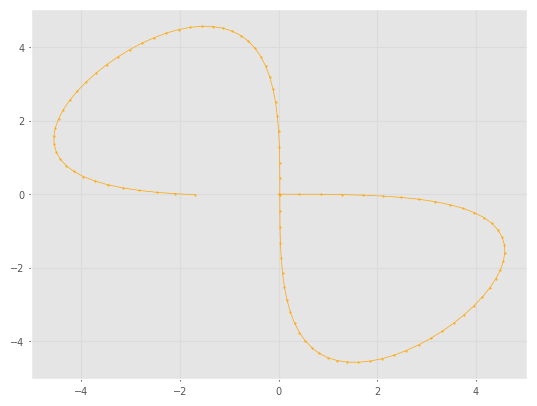

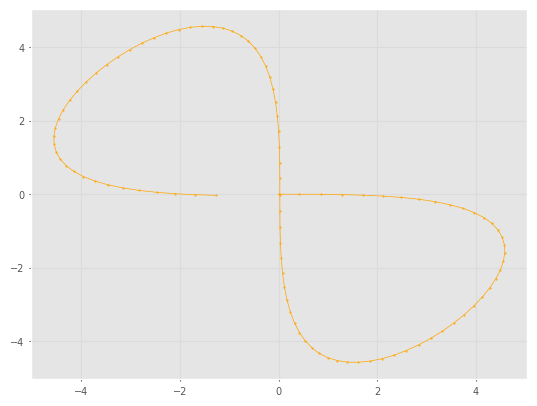

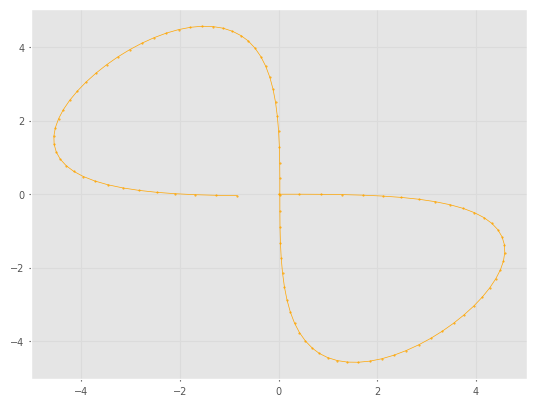

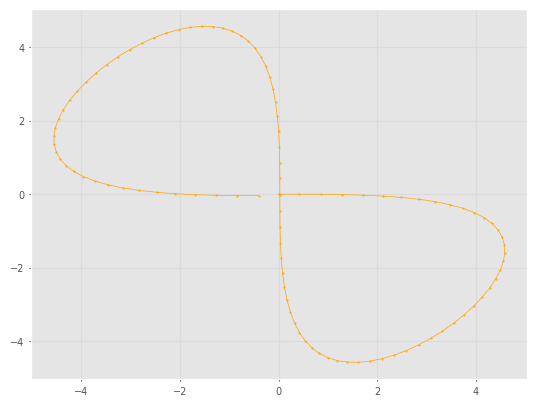

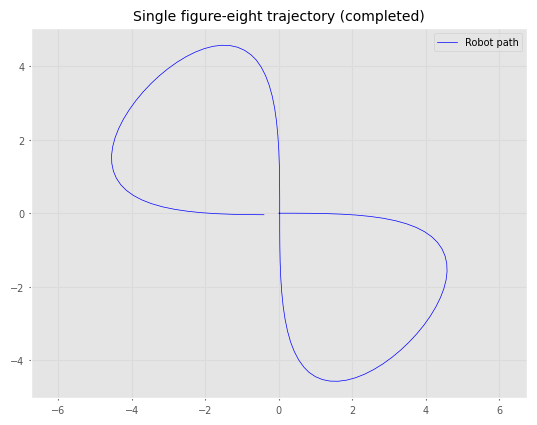

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from DifferentialDriveSimulatedRobot import DifferentialDriveSimulatedRobot

# Initial robot state (6x1)
xs0 = np.zeros((6, 1))
robot = DifferentialDriveSimulatedRobot(xs0)

# Simulation parameters
steps = 2000        # increase steps for higher resolution
A = 5.0             # amplitude of the figure-eight
dt = 0.05           # smaller dt for smoother path
robot.dt = dt

# Parametric single-8 trajectory
t = np.linspace(0, 2*np.pi, steps)
x_path = A * np.sin(t)
y_path = A * np.sin(t) * np.cos(t)

# Compute velocities
dx = np.gradient(x_path, dt)
dy = np.gradient(y_path, dt)
theta = np.arctan2(dy, dx)
dtheta = np.gradient(theta, dt)
u = np.sqrt(dx**2 + dy**2)       # linear velocity
r = dtheta                        # angular velocity

# Reset robot trajectory
xsk_1 = xs0.copy()
robot.xTraj, robot.yTraj = [], []

for k in range(steps):
    # For the last step, force the robot to exactly reach the last point
    if k == steps-1:
        final_dx = x_path[-1] - robot.xsk[0,0]
        final_dy = y_path[-1] - robot.xsk[1,0]
        final_theta = np.arctan2(final_dy, final_dx)
        final_u = np.sqrt(final_dx**2 + final_dy**2) / dt
        final_r = (final_theta - robot.xsk[2,0]) / dt
        usk = np.array([final_u, final_r])
    else:
        usk = np.array([u[k], r[k]])

    xsk = robot.fs(xsk_1, usk)
    xsk_1 = xsk

plt.figure()
plt.title("Single figure-eight trajectory (completed)")
plt.plot(robot.xTraj, robot.yTraj, 'blue', label='Robot path')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
